In [1]:
from functions.dataProcessing import *
from functions.kernels import *
from functions.models import *
from functions.acquisitionFunctions import *
from functions.arrayFit import *
import scipy.optimize as sco
from IPython.display import clear_output
import matplotlib.pyplot as plt
import pandas as pd
from timeit import default_timer as timer
from multiprocess import Pool
import numpy as np
import cupy as cp
import seaborn

from functions.modelFitting import *
from functions.plottingFunctions import *
from functions.simulation import *

df = readData()

In [24]:
import numpy as np

a = np.exp(np.array([1,1,4,2])/100000000)
a/np.sum(a)

array([0.25      , 0.25      , 0.25000001, 0.25      ])

In [15]:
a/np.sum(a)

array([0.21035395, 0.21035395, 0.34681503, 0.23247707])

In [6]:
df2 = readData2()
from functions.arrayModel import *

model([np.log(1),np.log(2)], df2.iloc[0], [0,1,2,3,4,5,6,7,8], "Spatial")

([4.887943243539922,
  3.7768700066356495,
  4.5630965855597205,
  3.102794761904651,
  4.384313945816701,
  2.8981162313959836,
  2.151481421494148,
  1.9868766057830622,
  2.9362362439308267,
  2.65268741738421,
  3.0213526685385177,
  5.706741069097853,
  5.6034280878074165,
  4.462540110682106,
  4.7602426358619505,
  4.469184219386219,
  3.8984458524814487,
  4.581339533414683,
  5.411142521799225,
  4.88246136655649,
  3.9708793301956717,
  4.46128889965342,
  4.497582709275277,
  4.217600727657147,
  4.005739997248349,
  4.066699253486234,
  4.190592329082281,
  4.2715142237253225,
  4.143699847866667,
  4.181672847888792,
  3.908737413152051,
  3.99424193137529,
  3.9786620849389154,
  3.9456779725875744,
  3.8672551259907997,
  4.016524988813678,
  3.926632517917927,
  3.8902160612261976,
  4.698013543245722,
  4.04323572206441,
  3.9807412183097437,
  3.9932189261142685,
  3.945964183123807,
  3.8836859202005396,
  3.9578475278129894,
  3.807294594677579,
  3.7765857555868902

In [7]:
df2.iloc[0]

id                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
age                   [42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42....
gender                [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
environment           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
contextOrder          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
context               [Spatial, Spatial, Spatial, Spatial, Spatial, ...
round                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
trial                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
x                     [6, 4, 0, 5, 7, 6, 6, 7, 7, 6, 5, 1, 0, 2, 0, ...
y                     [5, 2, 4, 5, 0, 1, 0, 1, 2, 2, 1, 4, 0, 0, 2, ...
chosen                [46, 20, 32, 45, 7, 14, 6, 15, 23, 22, 13, 33,...
initx                 [7, 2, 2, 5, 1, 5, 5, 1, 0, 7, 5, 0, 5, 7, 4, ...
inity                 [5, 2, 1, 5, 0, 0, 0, 0, 4, 2, 0, 2, 6, 3, 6, ...
trajectories          [[37], [39, 39], [38, 38, 38, 37, 37], [38

In [16]:
start_C = df[(df["trial"]==0) & (df["context"]=="Spatial") & ((df["chosen"]==0) | (df["chosen"]==7) | (df["chosen"]==56) | (df["chosen"]==63))][["id","round"]]

In [30]:
start_NC = df[(df["trial"]==0) & (df["context"]=="Spatial") & (df["chosen"]!=0) & (df["chosen"]!=7) & (df["chosen"]!=56) & (df["chosen"]!=63)][["id","round"]]

In [27]:
rc = [0]*20
for i in range(len(start_C)):
    c = list(start_C.iloc[i])
    l = list(df[(df["id"]==c[0]) & (df["round"]==c[1]) & (df["context"]=="Spatial")]["zscaled"])
    for ii in range(20):
        rc[ii] = rc[ii] + l[ii]
for ii in range(20):
    rc[ii] = rc[ii]/len(start_C)

In [31]:
nc = [0]*20
for i in range(len(start_NC)):
    c = list(start_NC.iloc[i])
    l = list(df[(df["id"]==c[0]) & (df["round"]==c[1]) & (df["context"]=="Spatial")]["zscaled"])
    for ii in range(20):
        nc[ii] = nc[ii] + l[ii]
for ii in range(20):
    nc[ii] = nc[ii]/len(start_NC)

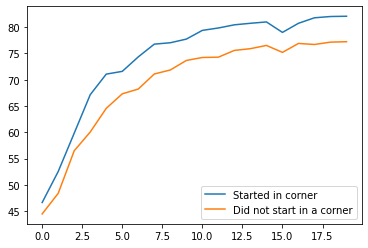

In [32]:
start_C = df[(df["trial"]==0) & (df["context"]=="Spatial") & ((df["chosen"]==0) | (df["chosen"]==7) | (df["chosen"]==56) | (df["chosen"]==63))][["id","round"]]
start_NC = df[(df["trial"]==0) & (df["context"]=="Spatial") & (df["chosen"]!=0) & (df["chosen"]!=7) & (df["chosen"]!=56) & (df["chosen"]!=63)][["id","round"]]

rc = [0]*20
for i in range(len(start_C)):
    c = list(start_C.iloc[i])
    l = list(df[(df["id"]==c[0]) & (df["round"]==c[1]) & (df["context"]=="Spatial")]["zscaled"])
    for ii in range(20):
        rc[ii] = rc[ii] + l[ii]
for ii in range(20):
    rc[ii] = rc[ii]/len(start_C)

nc = [0]*20
for i in range(len(start_NC)):
    c = list(start_NC.iloc[i])
    l = list(df[(df["id"]==c[0]) & (df["round"]==c[1]) & (df["context"]=="Spatial")]["zscaled"])
    for ii in range(20):
        nc[ii] = nc[ii] + l[ii]
for ii in range(20):
    nc[ii] = nc[ii]/len(start_NC)

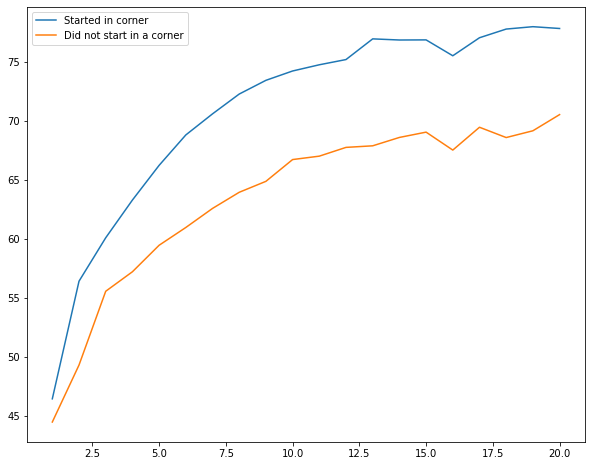

In [55]:
start_C = df[(df["trial"]==0) & (df["context"]=="Conceptual") & ((df["chosen"]==0) | (df["chosen"]==7) | (df["chosen"]==56) | (df["chosen"]==63))][["id","round"]]
start_NC = df[(df["trial"]==0) & (df["context"]=="Conceptual") & (df["chosen"]!=0) & (df["chosen"]!=7) & (df["chosen"]!=56) & (df["chosen"]!=63)][["id","round"]]

rc2 = [0]*20
for i in range(len(start_C)):
    c = list(start_C.iloc[i])
    l = list(df[(df["id"]==c[0]) & (df["round"]==c[1]) & (df["context"]=="Conceptual")]["zscaled"])
    for ii in range(20):
        rc2[ii] = rc2[ii] + l[ii]
for ii in range(20):
    rc2[ii] = rc2[ii]/len(start_C)

nc2 = [0]*20
for i in range(len(start_NC)):
    c = list(start_NC.iloc[i])
    l = list(df[(df["id"]==c[0]) & (df["round"]==c[1]) & (df["context"]=="Conceptual")]["zscaled"])
    for ii in range(20):
        nc2[ii] = nc2[ii] + l[ii]
for ii in range(20):
    nc2[ii] = nc2[ii]/len(start_NC)

In [56]:
start_C = df[(df["trial"]==0) & (df["round"]==0) & (df["context"]=="Conceptual") & ((df["chosen"]==0) | (df["chosen"]==7) | (df["chosen"]==56) | (df["chosen"]==63))]["id"]
start_NC = df[(df["trial"]==0) & (df["round"]==0) & (df["context"]=="Conceptual") & (df["chosen"]!=0) & (df["chosen"]!=7) & (df["chosen"]!=56) & (df["chosen"]!=63)]["id"]

rc20 = [0]*20
for i in range(len(start_C)):
    c = start_C.iloc[i]
    l = list(df[(df["id"]==c) & (df["context"]=="Conceptual")]["zscaled"])
    for ii in range(20):
        rc20[ii] = rc20[ii] + l[ii]
for ii in range(20):
    rc20[ii] = rc20[ii]/len(start_C)

nc20 = [0]*20
for i in range(len(start_NC)):
    c = start_NC.iloc[i]
    l = list(df[(df["id"]==c) & (df["context"]=="Conceptual")]["zscaled"])
    for ii in range(20):
        nc20[ii] = nc20[ii] + l[ii]
for ii in range(20):
    nc20[ii] = nc20[ii]/len(start_NC)

In [57]:
start_C = df[(df["trial"]==0) & (df["round"]==0) & (df["context"]=="Spatial") & ((df["chosen"]==0) | (df["chosen"]==7) | (df["chosen"]==56) | (df["chosen"]==63))]["id"]
start_NC = df[(df["trial"]==0) & (df["round"]==0) & (df["context"]=="Spatial") & (df["chosen"]!=0) & (df["chosen"]!=7) & (df["chosen"]!=56) & (df["chosen"]!=63)]["id"]

rc0 = [0]*20
for i in range(len(start_C)):
    c = start_C.iloc[i]
    l = list(df[(df["id"]==c) & (df["context"]=="Conceptual")]["zscaled"])
    for ii in range(20):
        rc0[ii] = rc0[ii] + l[ii]
for ii in range(20):
    rc0[ii] = rc0[ii]/len(start_C)

nc0 = [0]*20
for i in range(len(start_NC)):
    c = start_NC.iloc[i]
    l = list(df[(df["id"]==c) & (df["context"]=="Conceptual")]["zscaled"])
    for ii in range(20):
        nc0[ii] = nc0[ii] + l[ii]
for ii in range(20):
    nc0[ii] = nc0[ii]/len(start_NC)

In [15]:
start_C = df[(df["trial"]==0) & (df["environment"]==0) & ((df["chosen"]==0) | (df["chosen"]==7) | (df["chosen"]==56) | (df["chosen"]==63))][["id","round"]]
start_NC = df[(df["trial"]==0) & (df["environment"]==0) & (df["chosen"]!=0) & (df["chosen"]!=7) & (df["chosen"]!=56) & (df["chosen"]!=63)][["id","round"]]

rc = [0]*20
for i in range(len(start_C)):
    c = list(start_C.iloc[i])
    l = list(df[(df["id"]==c[0]) & (df["round"]==c[1]) & (df["environment"]==0)]["zscaled"])
    for ii in range(20):
        rc[ii] = rc[ii] + l[ii]
for ii in range(20):
    rc[ii] = rc[ii]/len(start_C)

nc = [0]*20
for i in range(len(start_NC)):
    c = list(start_NC.iloc[i])
    l = list(df[(df["id"]==c[0]) & (df["round"]==c[1]) & (df["environment"]==0)]["zscaled"])
    for ii in range(20):
        nc[ii] = nc[ii] + l[ii]
for ii in range(20):
    nc[ii] = nc[ii]/len(start_NC)
    

start_C = df[(df["trial"]==0) & (df["environment"]==1) & ((df["chosen"]==0) | (df["chosen"]==7) | (df["chosen"]==56) | (df["chosen"]==63))][["id","round"]]
start_NC = df[(df["trial"]==0) & (df["environment"]==1) & (df["chosen"]!=0) & (df["chosen"]!=7) & (df["chosen"]!=56) & (df["chosen"]!=63)][["id","round"]]

rc2 = [0]*20
for i in range(len(start_C)):
    c = list(start_C.iloc[i])
    l = list(df[(df["id"]==c[0]) & (df["round"]==c[1]) & (df["environment"]==1)]["zscaled"])
    for ii in range(20):
        rc2[ii] = rc2[ii] + l[ii]
for ii in range(20):
    rc2[ii] = rc2[ii]/len(start_C)

nc2 = [0]*20
for i in range(len(start_NC)):
    c = list(start_NC.iloc[i])
    l = list(df[(df["id"]==c[0]) & (df["round"]==c[1]) & (df["environment"]==1)]["zscaled"])
    for ii in range(20):
        nc2[ii] = nc2[ii] + l[ii]
for ii in range(20):
    nc2[ii] = nc2[ii]/len(start_NC)

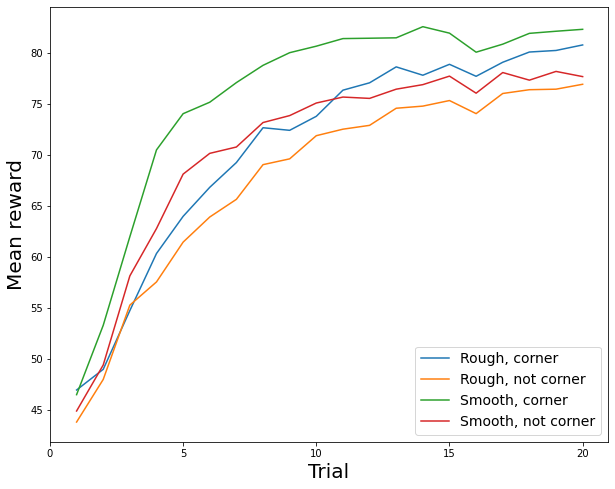

In [16]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.plot(range(1,21),rc)
plt.plot(range(1,21),nc)
plt.plot(range(1,21),rc2)
plt.plot(range(1,21),nc2)
plt.xticks([0,5,10,15,20])
plt.xlabel("Trial", fontsize=20)
plt.ylabel("Mean reward", fontsize=20)
plt.legend(["Rough, corner", "Rough, not corner","Smooth, corner","Smooth, not corner"], fontsize=14)

Text(22, 36, 'Trial')

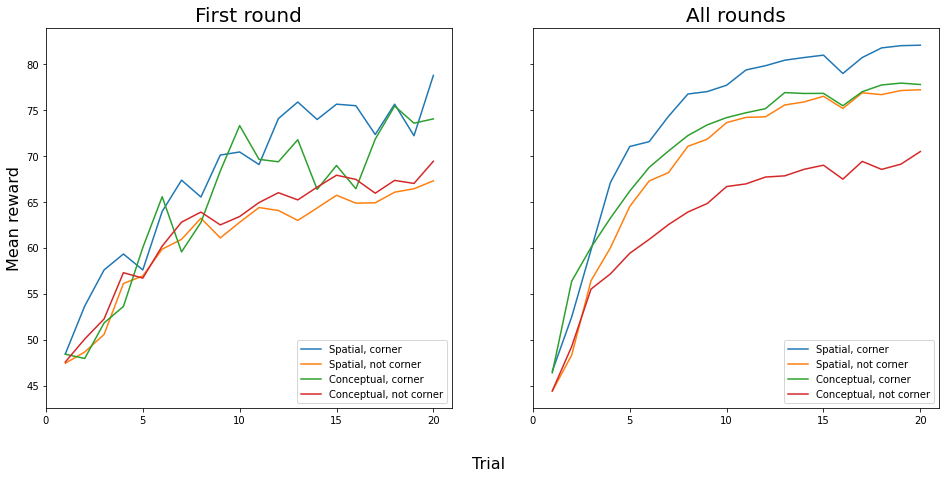

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

plt.rcParams['figure.figsize'] = [10, 8]

axes[0].plot(range(1,21),rc0)
axes[0].plot(range(1,21),nc0)
axes[0].plot(range(1,21),rc20)
axes[0].plot(range(1,21),nc20)
axes[0].set_ylabel("Mean reward", fontsize=16)
axes[0].set_xticks([0,5,10,15,20])
axes[0].set_title("First round", fontsize=20)
axes[0].legend(["Spatial, corner", "Spatial, not corner","Conceptual, corner","Conceptual, not corner"], loc="lower right", fontsize=10)

axes[1].plot(range(1,21),rc)
axes[1].plot(range(1,21),nc)
axes[1].plot(range(1,21),rc2)
axes[1].plot(range(1,21),nc2)
axes[1].set_xticks([0,5,10,15,20])
axes[1].set_title("All rounds", fontsize=20)
axes[1].legend(["Spatial, corner", "Spatial, not corner","Conceptual, corner","Conceptual, not corner"], loc="lower right", fontsize=10)

axes[0].text(22, 36, "Trial", fontsize=16) 

Text(0.5, 1.0, 'Conceptual')

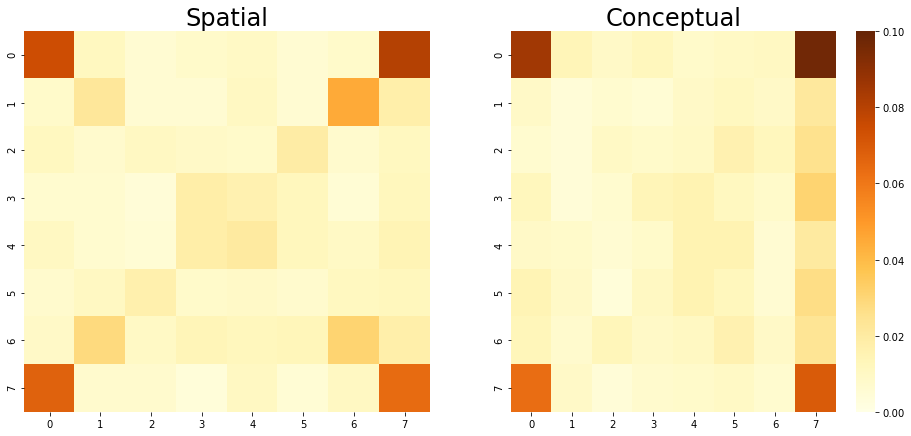

In [20]:
import matplotlib.pyplot as plt
import seaborn
plt.rcParams['figure.figsize'] = [10, 8]

fig, ax = plt.subplots(1, 2, figsize=(16, 7))

start = list(df[(df["trial"]==0) & (df["context"]=="Spatial")]["chosen"])
s = np.zeros(64)
for c in start:
    s[c] = s[c] + 1
s = s/np.sum(s)
g = seaborn.heatmap(createArrayGP(s), 0, 0.1, "YlOrBr", ax=ax[0], cbar=False)
g.set_title("Spatial", fontsize=24)

start = list(df[(df["trial"]==0) & (df["context"]=="Conceptual")]["chosen"])
s = np.zeros(64)
for c in start:
    s[c] = s[c] + 1
s = s/np.sum(s)
g = seaborn.heatmap(createArrayGP(s), 0, 0.1, "YlOrBr", ax=ax[1])
g.set_title("Conceptual", fontsize=24)

In [140]:
s[0]+s[7]+s[56]+s[63]

0.31550387596899226

In [141]:
4/64

0.0625

Text(0.5, 1.0, 'Conceptual')

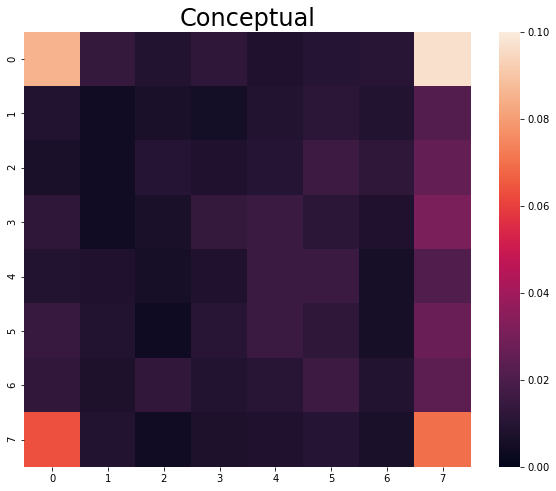

In [139]:
start = list(df[(df["trial"]==0) & (df["context"]=="Conceptual")]["chosen"])
s = np.zeros(64)
for c in start:
    s[c] = s[c] + 1
s = s/np.sum(s)
g = seaborn.heatmap(createArrayGP(s), 0, 0.1)
g.set_title("Conceptual", fontsize=24)

In [31]:
X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

In [110]:
X_train = np.array([[1],[4],[6],[9]])
y_train = np.array([1,2,1,2.5])
X_train, y_train

(array([[1],
        [4],
        [6],
        [9]]),
 array([1. , 2. , 1. , 2.5]))

In [113]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, DotProduct, Product, Sum

#kernel = Product(DotProduct(1.0, (1e-2, 1e2)), ExpSineSquared(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)))
kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, alpha=0.01, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

RBF(length_scale=1.74)

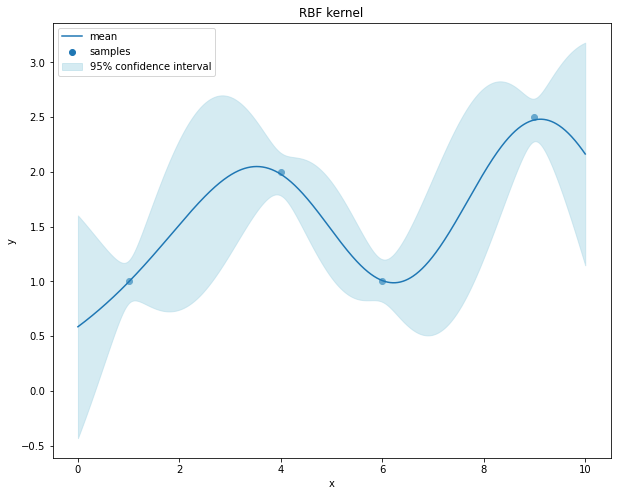

In [114]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.rcParams['figure.figsize'] = [10, 8]

plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    color="lightblue"
)
plt.title("RBF kernel")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["mean","samples","95% confidence interval"], loc="upper left")

In [8]:
from functions.dataProcessing import *
from functions.arrayModel import *
from functions.arrayFit import *

df = readData2()

#fitLeaveOneOut(df, 200, lambda subjD, rounds, context: modelFitCMA(subjD, rounds, context, {'tolx': 1e-2, 'maxfevals': 30}))
fit_fun = lambda participant, rnd, context: [0, 0, [0]*19, [0]*19]
fitOne2(df, 257, fit_fun)
#nll, lams = model([0.01,1.2], df.iloc[0], [x for x in range(10) if x!=0], "Spatial")

nll     context  environment  tau  beta  lambda   id  round  trial  \
0      0  Conceptual            0    0     0       0  128      0      0   
1      0  Conceptual            0    0     0       0  128      0      1   
2      0  Conceptual            0    0     0       0  128      0      2   
3      0  Conceptual            0    0     0       0  128      0      3   
4      0  Conceptual            0    0     0       0  128      0      4   
..   ...         ...          ...  ...   ...     ...  ...    ...    ...   
175    0  Conceptual            0    0     0       0  128      8     15   
176    0  Conceptual            0    0     0       0  128      8     16   
177    0  Conceptual            0    0     0       0  128      8     17   
178    0  Conceptual            0    0     0       0  128      8     18   
179    0  Conceptual            0    0     0       0  128      8     19   

     chosen  
0        39  
1        49  
2         9  
3        10  
4         9  
..      ...  
175       8  
176       8  
177       8  
178       8  
179       8  

[180 rows x 10 columns]

In [112]:
from functions.dataProcessing import *
path = 'C:/Users/Jaakko/Documents/GitHub/Masters-thesis/results/9/'
res2 = processAllResults(path, processResults3)

In [3]:
path = 'C:/Users/Jaakko/Documents/GitHub/Masters-thesis/results/8/'
res3 = processAllResults(path, processResults5)

In [11]:
sum(res3[(res3["context"]=="Spatial")]["looNLL"])/8

38794.14698849556

In [18]:
nLLrandom = np.log(1/64)*19*9*129*2
nLLmodel = -sum(res3["looNLL"])/8
R2 = 1 - (nLLmodel/nLLrandom)
R2

In [21]:
nLLrandom = np.log(1/64)*19*9*129
nLLmodel = -sum(res3[res3["context"]=="Spatial"]["looNLL"])/8
R2 = 1 - (nLLmodel/nLLrandom)
R2

0.5771331166733151

In [22]:
nLLrandom = np.log(1/64)*19*9*129
nLLmodel = -sum(res3[res3["context"]=="Conceptual"]["looNLL"])/8
R2 = 1 - (nLLmodel/nLLrandom)
R2

0.5056156030319121

In [200]:
def getId(data, ind):
    return data.iloc[ind*400 + 1]["id"]

def getEnvType(data, ind):
    return data[data["id"]==getId(data, ind)]["environment"].iloc[0]

def getOrd(data, ind):
    return data[data["id"]==getId(data, ind)]["contextOrder"].iloc[0]

In [201]:
ords = [0]*len(res2)
for i in range(len(res2)):
    ords[i] = getOrd(df, res2.iloc[i]["id"])
res2["taskOrder"] = ords

In [29]:
envs = [0]*len(res3)
for i in range(len(res3)):
    envs[i] = getEnvType(df, res3.iloc[i]["id"])
res3["environment"] = envs

In [30]:
nLLrandom = np.log(1/64)*19*9*2*len(set(df[df["environment"]==0]["id"]))
nLLmodel = -sum(res3[res3["environment"]==0]["looNLL"])/8
R2 = 1 - (nLLmodel/nLLrandom)
R2

0.5480944153777483

In [31]:
nLLrandom = np.log(1/64)*19*9*2*len(set(df[df["environment"]==1]["id"]))
nLLmodel = -sum(res3[res3["environment"]==1]["looNLL"])/8
R2 = 1 - (nLLmodel/nLLrandom)
R2

0.5357103130527445

In [5]:
data = pd.read_csv("paramEstimates_wu.csv", index_col=0)
rbfucb = data[(data["kernel"]=="RBF") & (data["acq"]=="UCB")]

In [6]:
nLLrandom = np.log(1/64)*19*9

In [26]:
nLLrandom

-711.1690072545039

In [30]:
1 - (-519.9652118193825 / (nLLrandom + np.log(1/64)))

0.27310927080755565

In [46]:
1 - ((-sum(res3[(res3["context"]=="Spatial") & (res3["id"]==0)]["looNLL"])/8) / nLLrandom)

0.27470640104619637

In [41]:
getId(df,0)

1

In [47]:
1 - ((-sum(rbfucb[(rbfucb["participant"]==1) & (rbfucb["context"]=="Spatial")]["roundnLL"])) / nLLrandom)

0.3168039520309742

In [7]:
inds = set(res3["id"])
nLLrandom = np.log(1/64)*19*9
R21 = [0]*len(inds)
R22 = [0]*len(inds)

for i in inds:
    id2 = getId(df,i)
    nll1 = -sum(res3[(res3["context"]=="Spatial") & (res3["id"]==i)]["looNLL"])/8
    nll2 = -sum(rbfucb[(rbfucb["participant"]==id2) & (rbfucb["context"]=="Spatial")]["roundnLL"])
    R21[i] = 1-nll1/nLLrandom
    R22[i] = 1-nll2/nLLrandom
    
R21_c = [0]*len(inds)
R22_c = [0]*len(inds)

for i in inds:
    id2 = getId(df,i)
    nll1 = -sum(res3[(res3["context"]=="Conceptual") & (res3["id"]==i)]["looNLL"])/8
    nll2 = -sum(rbfucb[(rbfucb["participant"]==id2) & (rbfucb["context"]=="Conceptual")]["roundnLL"])
    R21_c[i] = 1-nll1/nLLrandom
    R22_c[i] = 1-nll2/nLLrandom

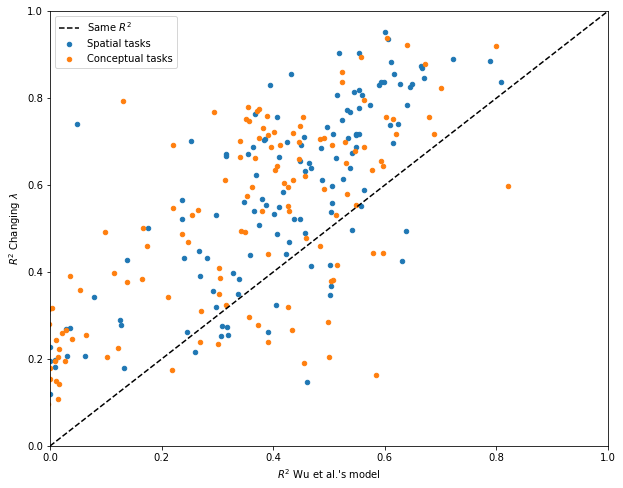

In [38]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.scatter(R22,R21, 20)
plt.scatter(R22_c,R21_c, 20)
plt.plot([0,1],[0,1], "--", c="black")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("$R^2$ Changing $\lambda$")
plt.xlabel("$R^2$ Wu et al.'s model")
plt.legend(["Same $R^2$", "Spatial tasks", "Conceptual tasks"])

In [9]:
g = 0
g2 = 0
for i in range(len(R21)):
    if R21[i] > R22[i]:
        g = g + 1
    if R21_c[i] > R22_c[i]:
        g2 = g2 + 1

In [42]:
g/len(R21)

0.875968992248062

In [44]:
g2/len(R21_c)

0.8449612403100775

In [15]:
np.mean(R21)

0.57713311667322

In [16]:
np.mean(R22)

0.4151033983254742

In [21]:
R21+R21_c

[0.27470640104619637,
 0.8294946331666944,
 0.8377744899729489,
 0.5224861194434867,
 0.5504768908301672,
 0.4882827166082725,
 0.7100023622489997,
 0.4333036582312072,
 0.2754202090488348,
 0.8452005404857164,
 0.7035202387971615,
 0.613806647775008,
 0.22788320558471042,
 0.20802726043669595,
 0.8067265395774504,
 0.8260923452089146,
 0.2703804053433012,
 0.3906421045460463,
 0.5579872575723759,
 0.4133624092160062,
 0.8129620214463117,
 0.855166822137449,
 0.32343250481229957,
 0.6114373707509383,
 0.7021895738230253,
 0.5015947019574512,
 0.5217559753375317,
 0.5540150635034482,
 0.9029107218893987,
 0.4892028763509325,
 0.7174432032179673,
 0.44080379068103803,
 0.670540663357427,
 0.8898036426172699,
 0.5654398680691253,
 0.5883387179149617,
 0.3468561690051587,
 0.8291626486778985,
 0.2701710350365323,
 0.6881443801898699,
 0.7575660046098671,
 0.9524876190796512,
 0.3038942807514361,
 0.355816062196759,
 0.9036581354403046,
 0.8728320873487623,
 0.7724606704428971,
 0.671164089

In [20]:
import scipy.stats as scs

scs.ttest_ind(R21,R22, equal_var=False, alternative="greater")

Ttest_indResult(statistic=6.506022797605455, pvalue=2.0916817932430503e-10)

In [23]:
scs.ttest_ind(R21+R21_c,R22+R22_c)

Ttest_indResult(statistic=8.67875064096618, pvalue=5.3031441752161983e-17)

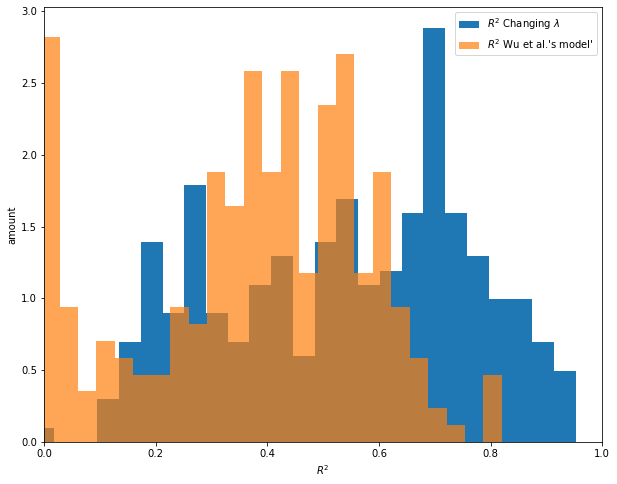

In [40]:
plt.hist(R21+R21_c, 25, density=True)
plt.hist(R22+R22_c, 25, density=True, alpha=0.7)
plt.xlim([0,1])
plt.xlabel("$R^2$")
plt.ylabel("amount")
plt.legend(["$R^2$ Changing $\lambda$","$R^2$ Wu et al.'s model'"])

([<matplotlib.axis.XTick at 0x3843fd90>,
 <a list of 5 Text major ticklabel objects>)

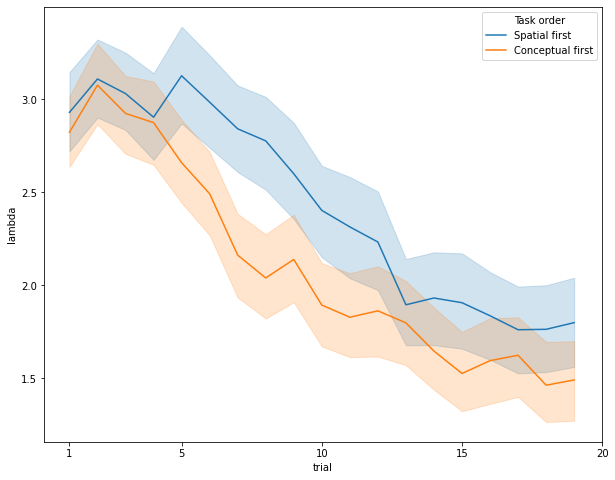

In [207]:
seaborn.lineplot(data=res2[(res2["trial"]!=0) & (res2["context"]=="Spatial")], x="trial", y="lambda", hue="taskOrder")
plt.legend(["Spatial first","Conceptual first"], title="Task order")
plt.xticks([1,5,10,15,20])

([<matplotlib.axis.XTick at 0x1f4b0e20>,
 <a list of 5 Text major ticklabel objects>)

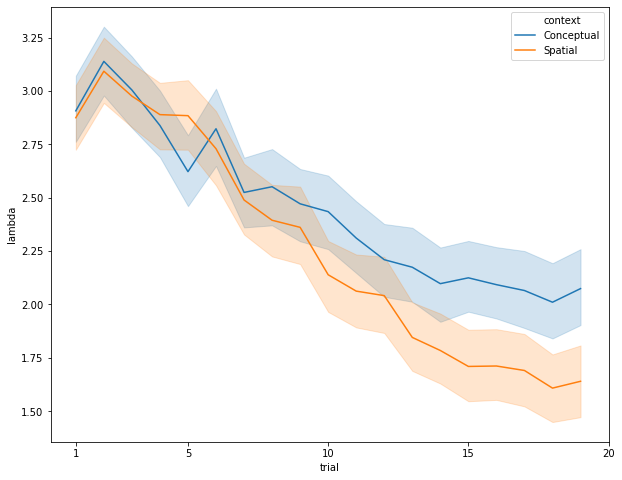

In [117]:
seaborn.lineplot(data=res2[res2["trial"]!=0], x="trial", y="lambda", hue="context")
plt.xticks([1,5,10,15,20])

([<matplotlib.axis.XTick at 0x25c8ef70>,
 <a list of 5 Text major ticklabel objects>)

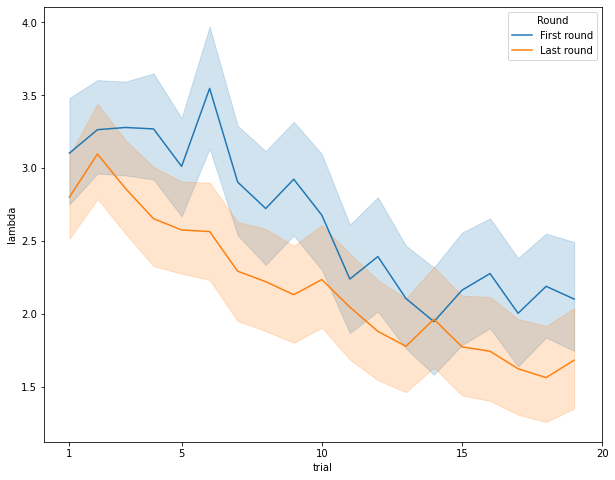

In [118]:
seaborn.lineplot(data=res2[(res2["trial"]!=0) & (res2["round"]==0)], x="trial", y="lambda")
seaborn.lineplot(data=res2[(res2["trial"]!=0) & (res2["round"]==8)], x="trial", y="lambda")
plt.legend(["First round","Last round"], title="Round")
plt.xticks([1,5,10,15,20])

In [197]:
res2

nll     context  environment       tau      beta    lambda   id  \
0    0.000000  Conceptual            0  0.061363  0.882278  0.000000  128   
1    3.495857  Conceptual            0  0.061363  0.882278  3.474576  128   
2    2.781770  Conceptual            0  0.061363  0.882278  3.050847  128   
3    2.918705  Conceptual            0  0.061363  0.882278  6.101695  128   
4    0.943996  Conceptual            0  0.061363  0.882278  2.084746  128   
..        ...         ...          ...       ...       ...       ...  ...   
175  0.000630     Spatial            0  0.006621  0.307345  0.169492  128   
176  0.000630     Spatial            0  0.006621  0.307345  0.169492  128   
177  0.000630     Spatial            0  0.006621  0.307345  0.169492  128   
178  0.000630     Spatial            0  0.006621  0.307345  0.169492  128   
179  0.000630     Spatial            0  0.006621  0.307345  0.169492  128   

     round  trial  chosen  
0        0      0      39  
1        0      1      49  
2        0      2       9  
3        0      3      10  
4        0      4       9  
..     ...    ...     ...  
175      8     15       8  
176      8     16       8  
177      8     17       8  
178      8     18       8  
179      8     19       8  

[46440 rows x 10 columns]

In [ ]:
seaborn.lineplot(data=res2[(res2["trial"]!=0) & (res2["round"]==0)], x="trial", y="lambda")
seaborn.lineplot(data=res2[(res2["trial"]!=0) & (res2["round"]==8)], x="trial", y="lambda")
plt.legend(["First round","Last round"], title="Round")
plt.xticks([1,5,10,15,20])

In [105]:
res2[(res2["id"]==0) & (res2["trial"]==2)]

nll     context  environment       tau      beta    lambda  id  \
2    3.179412     Spatial            0  0.036107  0.400747  2.711864   0   
22   3.179412     Spatial            0  0.036107  0.400747  2.711864   0   
42   3.179412     Spatial            0  0.036107  0.400747  2.711864   0   
62   3.179412     Spatial            0  0.036107  0.400747  2.711864   0   
82   3.179412     Spatial            0  0.036107  0.400747  2.711864   0   
102  3.179412     Spatial            0  0.036107  0.400747  2.711864   0   
122  3.179412     Spatial            0  0.036107  0.400747  2.711864   0   
142  3.179412     Spatial            0  0.036107  0.400747  2.711864   0   
162  3.179412     Spatial            0  0.036107  0.400747  2.711864   0   
2    2.809377  Conceptual            0  0.052489  0.278154  1.915254   0   
22   2.809377  Conceptual            0  0.052489  0.278154  1.915254   0   
42   2.809377  Conceptual            0  0.052489  0.278154  1.915254   0   
62   2.809377  Conceptual            0  0.052489  0.278154  1.915254   0   
82   2.809377  Conceptual            0  0.052489  0.278154  1.915254   0   
102  2.809377  Conceptual            0  0.052489  0.278154  1.915254   0   
122  2.809377  Conceptual            0  0.052489  0.278154  1.915254   0   
142  2.809377  Conceptual            0  0.052489  0.278154  1.915254   0   
162  2.809377  Conceptual            0  0.052489  0.278154  1.915254   0   

     round  trial  chosen  
2        0      2      32  
22       1      2      32  
42       2      2      32  
62       3      2      32  
82       4      2      32  
102      5      2      32  
122      6      2      32  
142      7      2      32  
162      8      2      32  
2        0      2      32  
22       1      2      32  
42       2      2      32  
62       3      2      32  
82       4      2      32  
102      5      2      32  
122      6      2      32  
142      7      2      32  
162      8      2      32

In [106]:
129*2-1

257

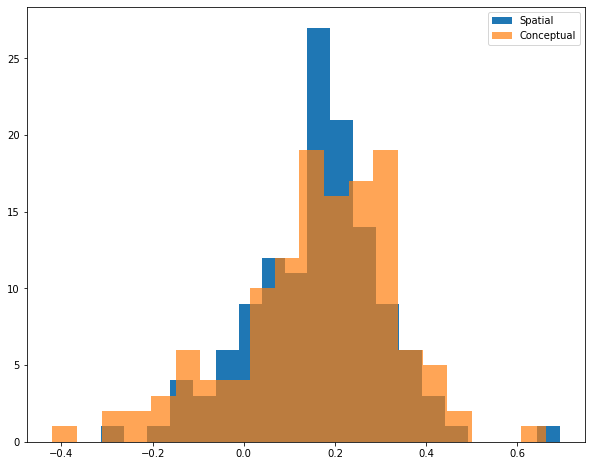

In [77]:
plt.hist([R21[x]-R22[x] for x in range(len(R21))], 20)
plt.hist([R21_c[x]-R22_c[x] for x in range(len(R21_c))], 20, alpha=0.7)
plt.legend(["Spatial","Conceptual"])

In [10]:

res3[(res3["id"]==0) & (res3["leaveOneOutIndex"]==0) & (res3["context"]=="Spatial") & (res3["trial"]==6)]

nll  context       tau      beta    lambda  id  leaveOneOutIndex  \
6    0.194453  Spatial  0.029566  0.228555  1.610169   0                 0   
26   0.194453  Spatial  0.029566  0.228555  1.610169   0                 0   
46   0.194453  Spatial  0.029566  0.228555  1.610169   0                 0   
66   0.194453  Spatial  0.029566  0.228555  1.610169   0                 0   
86   0.194453  Spatial  0.029566  0.228555  1.610169   0                 0   
106  0.194453  Spatial  0.029566  0.228555  1.610169   0                 0   
126  0.194453  Spatial  0.029566  0.228555  1.610169   0                 0   
146  0.194453  Spatial  0.029566  0.228555  1.610169   0                 0   

     round  trial    looNLL  
6        1      6  0.194453  
26       2      6  0.194453  
46       3      6  0.194453  
66       4      6  0.194453  
86       5      6  0.194453  
106      6      6  0.194453  
126      7      6  0.194453  
146      8      6  0.194453

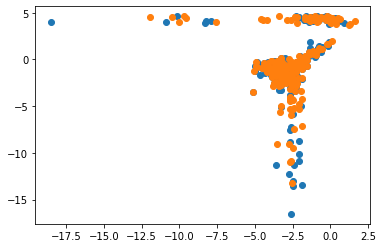

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(np.log(res2[(res2["round"]==0) & (res2["trial"]==0)]["tau"]), np.log(res2[(res2["round"]==0) & (res2["trial"]==0)]["beta"]))
plt.scatter(np.log(res3[(res3["round"]==0) & (res3["trial"]==0)]["tau"]), np.log(res3[(res3["round"]==0) & (res3["trial"]==0)]["beta"]))

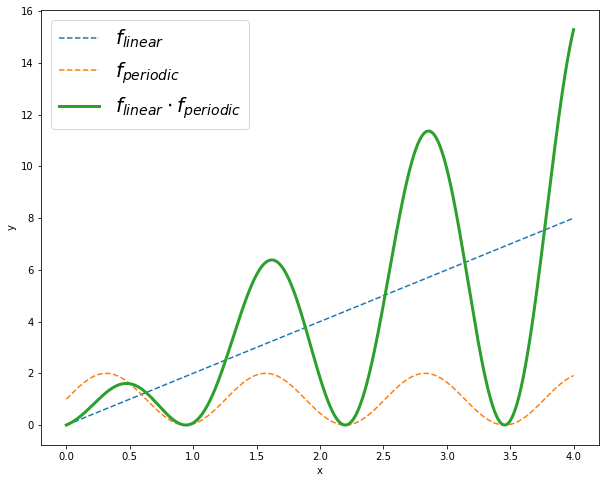

In [115]:
import matplotlib.pyplot as plt
import numpy as np

x = [(x)/1000 for x in range(4000)]
#y1 = [np.exp(-8*(a+0.5)**2) for a in x]
#y2 = [np.exp(-2*(a-0.4)**2) for a in x]
#y3 = [np.exp(-a**2) for a in x]
y1 = [2*a for a in x]
y2 = [1+np.sin(a*5) for a in x]
y4 = [y1[i]*y2[i] for i in range(len(x))]
plt.plot(x, y1, "--")
plt.plot(x, y2, "--")
#plt.plot(x, y3, "--")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y4, linewidth=3)
plt.legend(["$f_{linear}$","$f_{periodic}$","$f_{linear}\cdot f_{periodic}$"], prop={'size': 20})

In [ ]:
from functions.arrayModel import *
df2 = readData2()
model2([0.001, 0.5], df2.iloc[6], [x for x in range(9) if x != 2], "Spatial")

In [26]:
rawdata["gabor_processDescription"][10]

' I first observed what density got the highest points and then I observed amount of points that different tilts provided.'

In [41]:
f = open("experiment/roughEnvironment.json")
roughEnvironments = json.load(f)
f.close()
f = open("experiment/smoothEnvironment.json")
smoothEnvironments = json.load(f)
f.close()

In [12]:
def getId(data, ind):
    return data.iloc[ind*400 + 1]["id"]

def getEnvType(data, ind):
    return data[data["id"]==getId(data, ind)]["environment"].iloc[0]

path = 'C:/Users/Jaakko/Documents/GitHub/Masters-thesis/results/4/'
res = processAllResults(path, processResults4)
ids = res[(res["trial"]==0) & (res["leaveOneOutIndex"]==1) & (res["round"]==0) & (res["context"]=="Spatial")]["id"]
res["environment"] = [0]*len(res)

for i in ids:
    res.loc[res["id"]==i, "environment"] = getEnvType(df, i)

roughPars = res[res["environment"]==0][["tau","beta","context"]]
smoothPars = res[res["environment"]==1][["tau","beta","context"]]

In [3]:
from functions.dataProcessing import *
path = 'C:/Users/Jaakko/Documents/GitHub/Masters-thesis/results/5/'
res2 = processAllResults(path)

In [57]:
res2

nll     context       tau      beta     lambda   id  \
0     0.000000  Conceptual  1.292921  0.610979   0.000000  128   
1     4.282276  Conceptual  1.292921  0.610979  10.169492  128   
2     8.025274  Conceptual  1.292921  0.610979   5.135593  128   
3    12.327408  Conceptual  1.292921  0.610979   3.728814  128   
4    16.180011  Conceptual  1.292921  0.610979   3.372881  128   
..         ...         ...       ...       ...        ...  ...   
155  32.894985  Conceptual  1.077506  0.226116   1.000000  128   
156  32.855733  Conceptual  1.077506  0.226116   0.932203  128   
157  34.164696  Conceptual  1.077506  0.226116   0.932203  128   
158  35.272991  Conceptual  1.077506  0.226116   0.932203  128   
159  36.237735  Conceptual  1.077506  0.226116   0.898305  128   

     leaveOneOutIndex  round  trial     looNLL  
0                   8      0      0   0.000000  
1                   8      0      1   4.282276  
2                   8      0      2   8.025274  
3                   8      0      3  12.327408  
4                   8      0      4  16.180011  
..                ...    ...    ...        ...  
155                 7      8     15  32.894985  
156                 7      8     16  32.855733  
157                 7      8     17  34.164696  
158                 7      8     18  35.272991  
159                 7      8     19  36.237735  

[371520 rows x 10 columns]

In [8]:
inds = set(res2["id"])
minLooIndSpatial = [0]*len(inds)
minLooIndConceptual = [0]*len(inds)
for i in inds:
    looNLLs = res2[(res2["id"]==i) & (res2["trial"]==19)][["context","leaveOneOutIndex","looNLL"]]
    looSp = looNLLs[(looNLLs["context"]=="Spatial")][["leaveOneOutIndex","looNLL"]]
    minLooIndSpatial[i] = looSp[(looSp["looNLL"]==min(looSp["looNLL"]))]["leaveOneOutIndex"].iloc[0]
    looCo = looNLLs[(looNLLs["context"]=="Conceptual")][["leaveOneOutIndex","looNLL"]]
    minLooIndSpatial[i] = looCo[(looCo["looNLL"]==min(looCo["looNLL"]))]["leaveOneOutIndex"].iloc[0]

KeyError: "['looNLL', 'leaveOneOutIndex'] not in index"

In [ ]:
#pars_s = [list(res2[(res2["id"]==i) & (res2["context"]=="Spatial") & (res2["leaveOneOutIndex"]==minLooIndSpatial[i])][["tau","beta"]].iloc[0]) for i in inds]
#pars_c = [list(res2[(res2["id"]==i) & (res2["context"]=="Conceptual") & (res2["leaveOneOutIndex"]==minLooIndConceptual[i])][["tau","beta"]].iloc[0]) for i in inds]

In [119]:
inds = set(res2["id"])
pars_s = np.array(res2[(res2["context"]=="Spatial") & (res2["round"]==0) & (res2["trial"]==0)][["tau","beta"]])
pars_c = np.array(res2[(res2["context"]=="Conceptual") & (res2["round"]==0) & (res2["trial"]==0)][["tau","beta"]])

In [120]:
tau_s = [x[0] for x in pars_s]
beta_s = [x[1] for x in pars_s]
tau_c = [x[0] for x in pars_c]
beta_c = [x[1] for x in pars_c]

In [121]:
def getId(data, ind):
    return data.iloc[ind*400 + 1]["id"]

def getEnvType(data, ind):
    return data[data["id"]==getId(data, ind)]["environment"].iloc[0]

envs = [0]*129
for i in inds:
    envs[i] = getEnvType(df, i)

smoothPars_s = [pars_s[x] for x in range(len(pars_s)) if envs[x]==1]
smoothPars_c = [pars_c[x] for x in range(len(pars_c)) if envs[x]==1]
roughPars_s = [pars_s[x] for x in range(len(pars_s)) if envs[x]==0]
roughPars_c = [pars_c[x] for x in range(len(pars_c)) if envs[x]==0]

In [122]:
smoothPars = smoothPars_s + smoothPars_c
roughPars = roughPars_s + roughPars_c
smoothPars = pd.DataFrame({"tau": [x[0] for x in smoothPars], "beta": [x[1] for x in smoothPars], "context": ["Spatial"]*len(smoothPars_s) + ["Conceptual"]*len(smoothPars_c)})
roughPars = pd.DataFrame({"tau": [x[0] for x in roughPars], "beta": [x[1] for x in roughPars], "context": ["Spatial"]*len(roughPars_s) + ["Conceptual"]*len(roughPars_c)})

In [142]:
from functions.simulation import gprDF

gprdf, smoothTotal, roughTotal = gprDF(df, smoothPars, roughPars, 30, roughEnvironments, smoothEnvironments)

Spatial: 30/30


In [19]:
pd.read_csv("simulated_data.csv")["meanReward"][59]

82.81460115039509

In [18]:
gprdf["meanReward"][59]

78.37442151064518

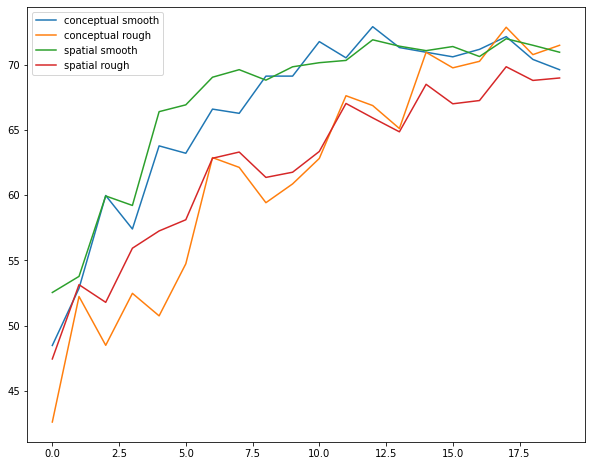

In [143]:
plt.plot(range(20),gprdf["meanReward"][0:20])
plt.plot(range(20),gprdf["meanReward"][20:40])
plt.plot(range(20),gprdf["meanReward"][40:60])
plt.plot(range(20),gprdf["meanReward"][60:80])
plt.legend(["conceptual smooth","conceptual rough","spatial smooth","spatial rough"])

0          1           2           3           4           5  \
0    68.037601  15.006649  100.000000  100.000000  100.000000  100.000000   
1    23.490628  76.041550   28.616428   94.376011   40.439566   91.485715   
2    49.886703  41.316551   14.430417   27.916893   74.792553   49.886703   
3    58.797127  98.366014   72.053660   83.243317   83.243317   83.243317   
4     7.782258  82.654339   97.918364   97.918364   97.918364   97.918364   
..         ...        ...         ...         ...         ...         ...   
595  53.605575  56.971122   26.305631   18.702736   21.237105   67.481889   
596  39.625565   0.190217   38.034150   19.065124   54.794799   87.596897   
597  36.479316  45.625685   62.470440   54.293915   62.470440   62.470440   
598   0.000000  43.764666   55.663960   49.583860    9.215197   43.582238   
599  98.458830  27.484103   19.388198   37.463649   83.096038   61.245360   

              6           7           8           9          10          11  \
0    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1     55.995769   85.268175   85.268175   85.268175   84.727204   91.485715   
2     68.393651   74.792553   74.792553   74.792553   74.792553   74.792553   
3     83.243317   83.243317   83.243317   83.243317   83.243317   83.243317   
4     97.918364   97.918364   97.918364   97.918364   97.918364   97.918364   
..          ...         ...         ...         ...         ...         ...   
595   89.925585   89.925585   89.925585   89.925585   89.925585   89.925585   
596  100.000000   96.050275   96.050275   96.050275   96.050275   96.050275   
597   62.470440   62.470440   62.470440   62.470440   62.470440   62.470440   
598   37.665295   50.400270  100.000000   39.334747   39.143499   43.582238   
599   36.802721   87.406527   46.874492   66.683688   89.763005   89.763005   

             12          13          14          15          16          17  \
0    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1     91.485715   91.485715   91.485715   91.485715   91.485715   91.485715   
2     74.792553   74.792553   74.792553   74.792553   74.792553   74.792553   
3     83.243317   83.243317   83.243317   83.243317   83.243317   83.243317   
4     97.918364   97.918364   97.918364   97.918364   97.918364   97.918364   
..          ...         ...         ...         ...         ...         ...   
595   89.925585   89.925585   89.925585   89.925585   89.925585   89.925585   
596   96.050275   96.050275   96.050275   96.050275   96.050275   96.050275   
597   62.470440   62.470440   62.470440   62.470440   62.470440   62.470440   
598   46.991895   44.191589   43.582238   50.400270   55.663960   43.582238   
599   89.763005   89.763005   89.763005   89.763005   89.763005   89.763005   

             18          19  
0    100.000000  100.000000  
1     91.485715   91.485715  
2     74.792553   74.792553  
3     83.243317   83.243317  
4     97.918364   97.918364  
..          ...         ...  
595   89.925585   89.925585  
596   96.050275   96.050275  
597   62.470440   62.470440  
598   49.583860   55.663960  
599   89.763005   89.763005  

[600 rows x 20 columns]

In [10]:
nLLrandom = np.log(1/64)*19*9*129

In [16]:
-nLLrandom*129

91740.801935831

In [17]:
1- (sum(res2["nll"])/(-nLLrandom*129))

0.08152934208390761

Text(0, 0.5, 'log beta')

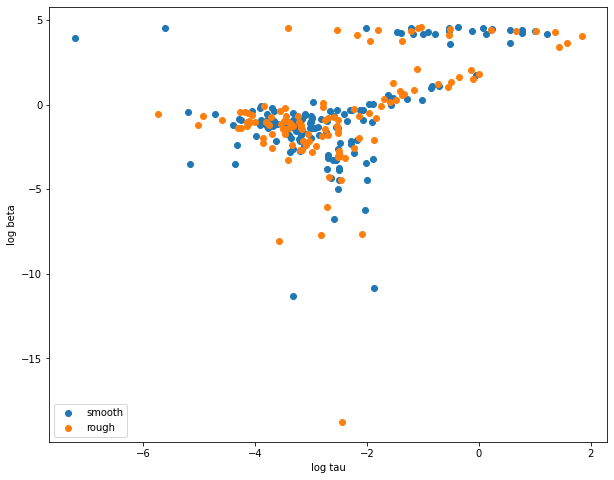

In [127]:
plt.scatter(np.log(smoothPars["tau"]),np.log(smoothPars["beta"]))
plt.scatter(np.log(roughPars["tau"]),np.log(roughPars["beta"]))
plt.legend(["smooth","rough"])
plt.xlabel("log tau")
plt.ylabel("log beta")

Text(0, 0.5, 'log beta')

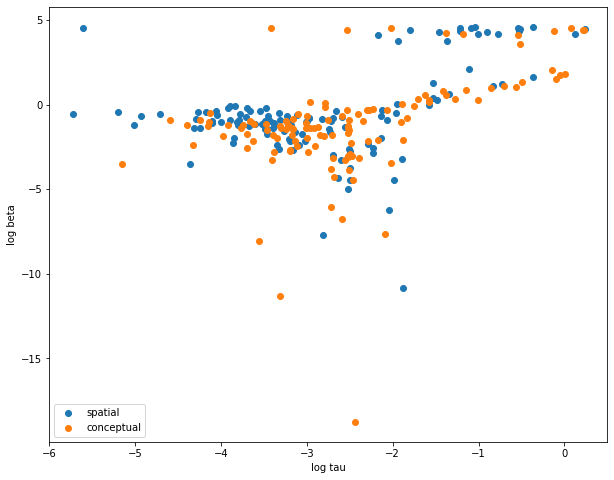

In [128]:
pars_s = smoothPars_s + roughPars_s
pars_c = smoothPars_c + roughPars_c
plt.scatter(np.log([x[0] for x in pars_s]),np.log([x[1] for x in pars_s]))
plt.scatter(np.log([x[0] for x in pars_c]),np.log([x[1] for x in pars_c]))
plt.legend(["spatial","conceptual"])
plt.xlim([-6,0.5])
plt.xlabel("log tau")
plt.ylabel("log beta")

Ttest_indResult(statistic=2.2387586044848127, pvalue=0.02603130510334849)


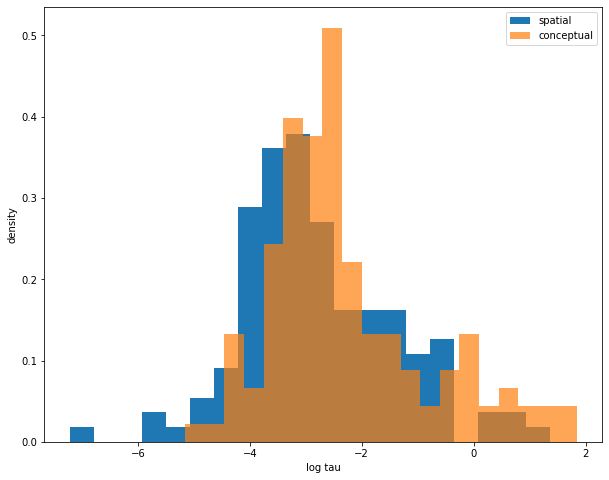

In [133]:
plt.hist(np.log([x[0] for x in pars_s]), 20, density=True)
plt.hist(np.log([x[0] for x in pars_c]), 20, density=True, alpha=0.7)
#plt.xlim([-12,1])
print(scs.ttest_ind([x[0] for x in pars_c],[x[0] for x in pars_s]))
plt.ylabel("density")
plt.xlabel("log tau")
plt.legend(["spatial","conceptual"])

Ttest_indResult(statistic=-0.8295820835314202, pvalue=0.4075479946473545)


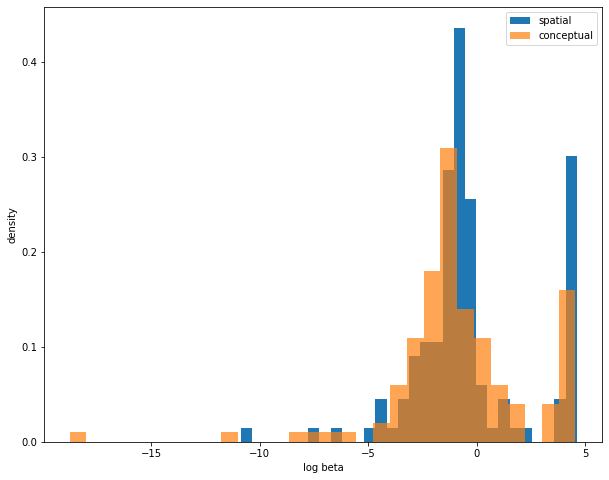

In [134]:
plt.hist(np.log([x[1] for x in pars_s]), 30, density=True)
plt.hist(np.log([x[1] for x in pars_c]), 30, density=True, alpha=0.7)
print(scs.ttest_ind([x[1] for x in pars_c],[x[1] for x in pars_s]))
plt.ylabel("density")
plt.xlabel("log beta")
plt.legend(["spatial","conceptual"])

Ttest_indResult(statistic=-1.0185435831518335, pvalue=0.3093813068808235)


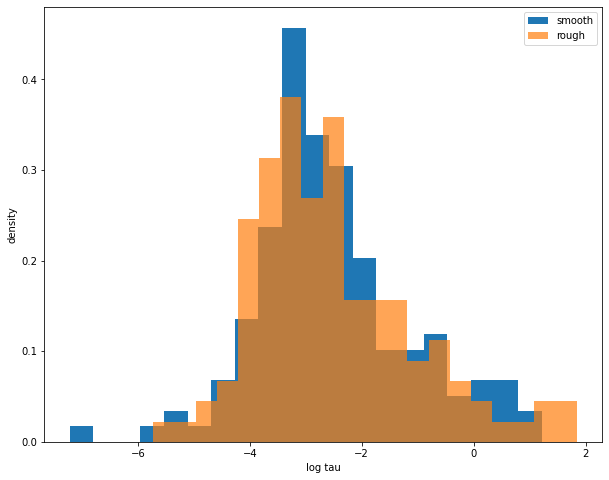

In [138]:
plt.hist(np.log(smoothPars["tau"]), 20, density=True)
plt.hist(np.log(roughPars["tau"]), 20, density=True, alpha=0.7)
print(scs.ttest_ind(smoothPars["tau"],roughPars["tau"]))
plt.ylabel("density")
plt.xlabel("log tau")
plt.legend(["smooth","rough"])

Ttest_indResult(statistic=0.6756140503991012, pvalue=0.4998955414331856)


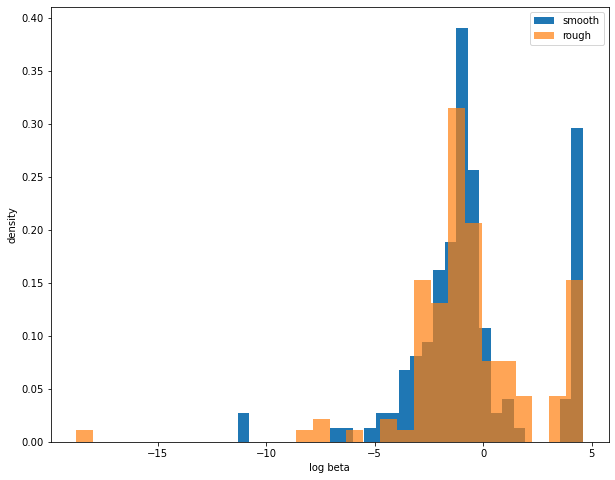

In [140]:
plt.hist(np.log(smoothPars["beta"]), 30, density=True)
plt.hist(np.log(roughPars["beta"]), 30, density=True, alpha=0.7)
print(scs.ttest_ind(smoothPars["beta"],roughPars["beta"]))
plt.ylabel("density")
plt.xlabel("log beta")
plt.legend(["smooth","rough"])

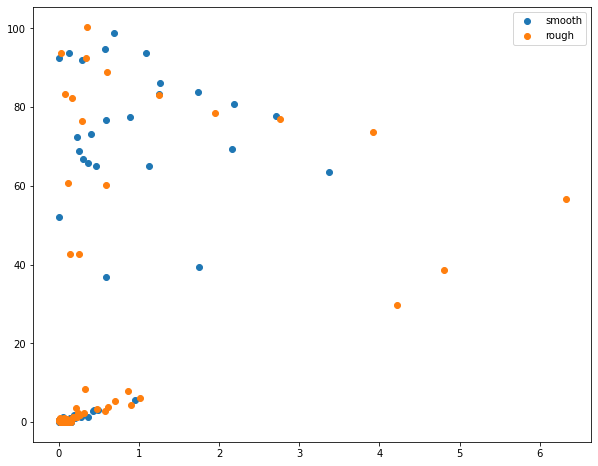

In [141]:
plt.scatter((smoothPars["tau"]),(smoothPars["beta"]))
plt.scatter((roughPars["tau"]),(roughPars["beta"]))
plt.legend(["smooth","rough"])

In [9]:
gpPars = pd.read_csv("rationalModels/parameters/gpucb.csv", sep=",")
smoothPars = gpPars.loc[(gpPars["environment"] == "Smooth")]
roughPars = gpPars.loc[(gpPars["environment"] == "Rough")]

In [109]:
res2

nll     context       tau      beta     lambda   id  \
0    0.000000  Conceptual  0.025891  0.134696   0.000000  128   
1    3.991339  Conceptual  0.025891  0.134696  10.169492  128   
2    5.846610  Conceptual  0.025891  0.134696   0.169492  128   
3    1.535675  Conceptual  0.025891  0.134696   1.677966  128   
4    0.425024  Conceptual  0.025891  0.134696   2.084746  128   
..        ...         ...       ...       ...        ...  ...   
155  0.000630  Conceptual  0.028393  0.199216   0.169492  128   
156  1.746522  Conceptual  0.028393  0.199216   7.677966  128   
157  1.617328  Conceptual  0.028393  0.199216   7.372881  128   
158  1.493395  Conceptual  0.028393  0.199216   7.118644  128   
159  3.029654  Conceptual  0.028393  0.199216  10.169492  128   

     leaveOneOutIndex  round  trial    looNLL  
0                   8      0      0  0.000000  
1                   8      0      1  3.991339  
2                   8      0      2  5.846610  
3                   8      0      3  1.535675  
4                   8      0      4  0.425024  
..                ...    ...    ...       ...  
155                 7      8     15  0.000630  
156                 7      8     16  1.746522  
157                 7      8     17  1.617328  
158                 7      8     18  1.493395  
159                 7      8     19  3.029654  

[371520 rows x 10 columns]

In [277]:
roughPars

tau      beta     context
0     1.617146  0.491319     Spatial
1     1.617146  0.491319     Spatial
2     1.617146  0.491319     Spatial
3     1.617146  0.491319     Spatial
4     1.617146  0.491319     Spatial
...        ...       ...         ...
8491  1.077506  0.226116  Conceptual
8492  1.077506  0.226116  Conceptual
8493  1.077506  0.226116  Conceptual
8494  1.077506  0.226116  Conceptual
8495  1.077506  0.226116  Conceptual

[8496 rows x 3 columns]

In [144]:
import seaborn 
from functions.plottingFunctions import *
from functions.kernels import *
from functions.models import *

participant = 1
rnd = 0
allChoices = df[(df["id"] == participant) & (df["round"] == rnd)]["chosen"]

def createChoiceArray(choices, y, size=8):
    opts = getAllOptions()
    array = np.zeros([size]*2)
    for i, choice in enumerate(choices):
        array[opts[choice]] = y[i]
    return array

def createGPArray(data, gridSize=8):
    array = np.zeros([gridSize,gridSize])
    opts = getAllOptions(gridSize)
    for i, v in enumerate(data):
        array[opts[i][0],opts[i][1]] = v
    return array

#seaborn.heatmap(createChoiceArray(allChoices))

def getPost(lam, X, Y):
    opts = [[x, y] for y in range(8) for x in range(8)]
    return gpr(opts, [lam, lam, 1.0, 0.0001], X, Y, rbf)

X = df[(df["id"] == participant) & (df["round"] == rnd)][["x","y"]]
Y = df[(df["id"] == participant) & (df["round"] == rnd)]["zscaled"]

post = getPost(1.75, np.matrix(X[0:3]).astype('float64'), np.matrix(Y[0:3]).astype('float64'))

def getId(data, ind):
    return data.iloc[ind*400 + 1]["id"]

def getEnvType(data, ind):
    return data[data["id"]==getId(data, ind)]["environment"].iloc[0]
getId(df, 3)

def getEnvironment(data, rough, smooth, Id, rnd):
    if data[(data["id"] == Id) & (data["round"]==rnd)]["environment"].iloc[0] == 0:
        return rough[str(data[(data["id"] == Id) & (data["round"]==rnd)]["envOrder"].iloc[0])]
    else:
        return smooth[str(data[(data["id"] == Id) & (data["round"]==rnd)]["envOrder"].iloc[0])]

def createEnvironmentArray(environment, gridSize=8):
    array = np.zeros([gridSize]*2)
    for i in range(gridSize**2):
        x = environment[str(i)]
        array[x["x2"], x["x1"]] = x["y"]
    return array

In [12]:
import scipy.stats as scs
n = 60
n2 = 6


choices = [[x1, x2] for x1 in range(8) for x2 in range(8)]
pars = smoothPars[smoothPars["context"]=="Conceptual"]
par = np.random.randint(0,len(pars))
tau_s = list(pars["tau"])[par]
beta_s = list(pars["beta"])[par]
#tau_s = 0.05
#beta_s = 0.17
print(f"{tau_s} -- {beta_s}")
envNum = np.random.randint(0,40)
location = np.random.randint(0,64)
Y = [smoothEnvironments[str(envNum)][str(location)]["y"]*100] 
y = [[1]]*20
x1 = [choices[location][0]]
x2 = [choices[location][1]]
y[0] = Y[0]
chosen = [x1[a]*8 + x2[a] for a in range(len(x1))]

for i in range(19):
    X1 = np.column_stack([x1,x2])
    y1 = (np.matrix(Y)-50)/100

    nLL_lambda = [0]*n
    vals = np.linspace(0,10,n)
    vals = vals + vals[1]
    for ind, val in enumerate(vals):
        parVec = [val, val, 1, 0.0001]
        out = gpr(choices, parVec, X1, y1, rbf)
        
        utilityVec = ucb(out, [beta_s])
        utilityVec = utilityVec - np.max(utilityVec)

        p = np.exp(utilityVec / tau_s).tolist()[0]
        p = p / np.sum(p)
        
        nLL_lambda[ind] = -np.log(p[chosen[-1]])
        #nLL_lambda[ind] = -scs.multivariate_normal.logpdf((Y[-1]-50)/100, out["mu"][chosen[-1]], out["sig"][chosen[-1]])
    min_ind = int([x for x in range(n) if nLL_lambda[x]==min(nLL_lambda)][-1])
    old_min = nLL_lambda[min_ind]
    new_min = vals[max(0,min_ind-1)] + (vals[min_ind] - vals[max(0,min_ind-1)])*0.1
    new_max = vals[min(n-1,min_ind+1)] - (vals[min_ind] - vals[min(n-1,min_ind+1)])*0.1
    vals2 = np.linspace(new_min, new_max, n2)
    nLL_lambda = [0]*n2
    for ind, val in enumerate(vals2):
        parVec = [val, val, 1, 0.0001]
        out = gpr(choices, parVec, X1, y1, rbf)

        #nLL_lambda[ind] = -scs.multivariate_normal.logpdf((Y[-1]-50)/100, out["mu"][chosen[-1]], out["sig"][chosen[-1]])
        
        utilityVec = ucb(out, [beta_s])
        utilityVec = utilityVec - np.max(utilityVec)

        p = np.exp(utilityVec / tau_s).tolist()[0]
        p = p / np.sum(p)
        
        nLL_lambda[ind] = -np.log(p[chosen[-1]])


    if min(nLL_lambda) < old_min:
        min_lambda = vals2[[x for x in range(n2) if nLL_lambda[x]==min(nLL_lambda)][-1]]
    else:
        min_lambda = vals[min_ind]

    X1 = np.column_stack([x1,x2])
    y1 = (np.matrix(Y)-50)/100


    parVec = [min_lambda, min_lambda, 1, 0.0001]
    out = gpr(choices, parVec, X1, y1, rbf)

    utilityVec = ucb(out, [beta_s])
    utilityVec = utilityVec - np.max(utilityVec)
    p = np.exp(utilityVec / tau_s).tolist()[0]
    p = p / np.sum(p)
    location = np.random.choice(range(64), 1, True, p)[0]
    y[i+1] = smoothEnvironments[str(envNum)][str(location)]["y"]*100

    x1 = x1 + [choices[location][0]]
    x2 = x2 + [choices[location][1]]
    Y = Y + [y[i+1]]
    chosen = [x1[a]*8 + x2[a] for a in range(len(x1))]
    print(f"{min_lambda} --  {y[i+1]}")

0.11618969268068657 -- 0.13241786545951037
10.169491525423728 --  96.07964288166919
0.1694915254237288 --  96.07964288166919
0.1694915254237288 --  96.07964288166919
0.1694915254237288 --  96.07964288166919
0.1694915254237288 --  96.07964288166919
0.1694915254237288 --  96.07964288166919
0.1694915254237288 --  96.07964288166919
0.1694915254237288 --  96.07964288166919
0.1694915254237288 --  96.07964288166919
0.3389830508474576 --  96.07964288166919
0.5084745762711864 --  96.07964288166919
0.5084745762711864 --  96.07964288166919
0.5084745762711864 --  96.07964288166919
0.6779661016949152 --  96.07964288166919
0.6779661016949152 --  96.07964288166919
0.6779661016949152 --  96.07964288166919
0.6779661016949152 --  96.07964288166919
0.847457627118644 --  96.07964288166919
0.847457627118644 --  96.07964288166919


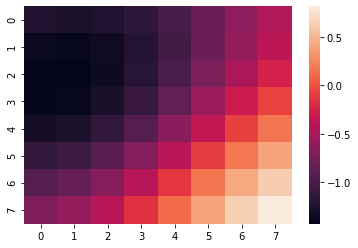

In [18]:
seaborn.heatmap(createChoiceArray([a*8 + b for a in range(8) for b in range(8)],out["mu"]))

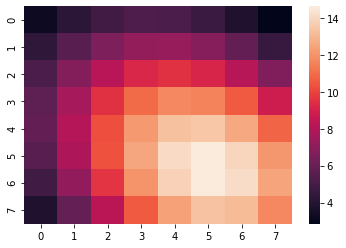

In [19]:
seaborn.heatmap(createChoiceArray([a*8 + b for a in range(8) for b in range(8)],out["sig"]))

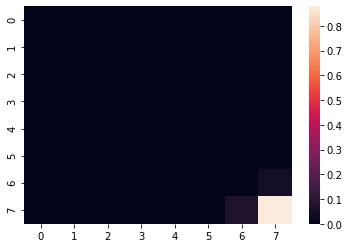

In [20]:
seaborn.heatmap(createChoiceArray([a*8 + b for a in range(8) for b in range(8)],p))

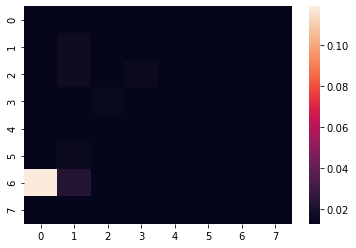

In [122]:
tau_s=1.5
beta_s=0.1

utilityVec = ucb(out, [beta_s])
utilityVec = utilityVec - np.max(utilityVec)
p = np.exp(utilityVec / tau_s).tolist()[0]
p = p / np.sum(p)

seaborn.heatmap(createChoiceArray([a*8 + b for a in range(8) for b in range(8)],p))

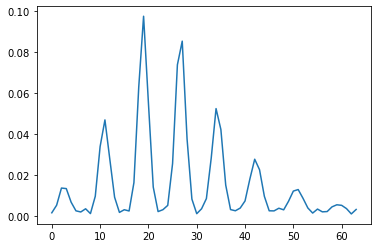

In [76]:
plt.plot(range(64), p)

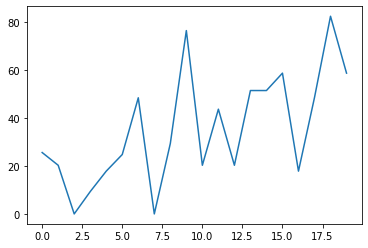

In [77]:
plt.plot(range(20),Y)

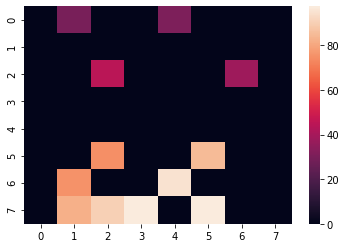

In [144]:
import seaborn 
seaborn.heatmap(createChoiceArray(chosen,Y))

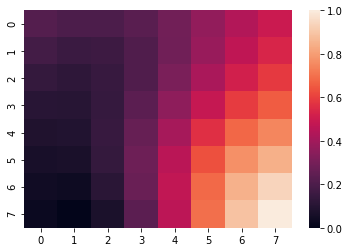

In [21]:
environmentArray = createEnvironmentArray(smoothEnvironments[str(envNum)])
seaborn.heatmap(environmentArray)

In [15]:
meanRewards = [0]*20
for i in range(20):
    meanRewards[i] = np.mean(df[df["trial"]==i]["zscaled"])

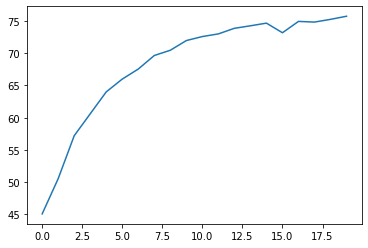

In [16]:
plt.plot(range(20),meanRewards)

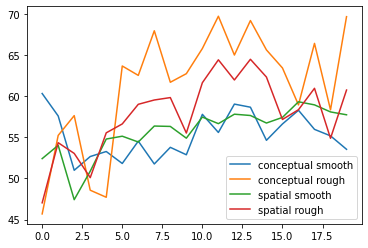

In [14]:
plt.plot(range(20),gprdf["meanReward"][0:20])
plt.plot(range(20),gprdf["meanReward"][20:40])
plt.plot(range(20),gprdf["meanReward"][40:60])
plt.plot(range(20),gprdf["meanReward"][60:80])
plt.legend(["conceptual smooth","conceptual rough","spatial smooth","spatial rough"])

In [11]:
gprdf

{'trial': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19],
 'environment': ['Smooth',
  'Smooth',
  'Smooth',
  'Smooth',
  'Smooth',
  'Smooth',
  'Smooth',
  'Smooth',
  'Smooth',
  'Smooth',
  'Smooth',
  'Smooth',
  'Smooth',
  'Smooth',
  'Smooth',
  'Smooth',
  'Smooth',
  'Smooth',
  'Smooth',
  'Smooth',
  'Rough',
  'Rough',
  'Rough',
  'Rough',
  'Rough',
  'Rough',
  'Rough',
  'Rough',
  'Rough',
  'Rough',
  'Rough',
  'Rough',
  'Rough',
  'Rough',
  'Rough',
  'Rough',
  'Rough',
  'Rough',
  'Rough',
  'Rough',
  'Smooth',
  'Smooth',
  'Smooth',
  'Smooth',
  'Smooth',
  'Smooth',
  '

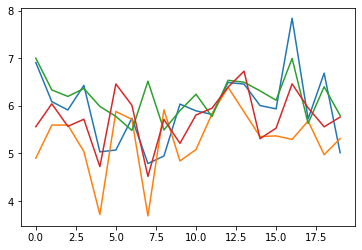

In [18]:
plt.plot(range(20),gprdf["meanSE"][0:20])
plt.plot(range(20),gprdf["meanSE"][20:40])
plt.plot(range(20),gprdf["meanSE"][40:60])
plt.plot(range(20),gprdf["meanSE"][60:80])

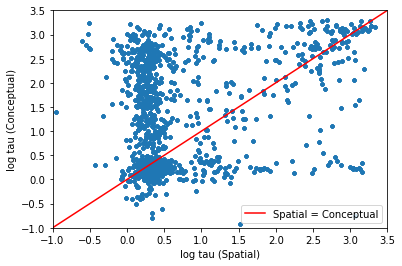

In [289]:
plt.scatter(np.log(tau_s),np.log(tau_c), 10, alpha=0.7)
plt.plot([-1,4],[-1,4], "red")
plt.xlim([-1,3.5])
plt.ylim([-1,3.5])
plt.xlabel("log tau (Spatial)")
plt.ylabel("log tau (Conceptual)")
plt.legend(["Spatial = Conceptual"], loc="lower right")

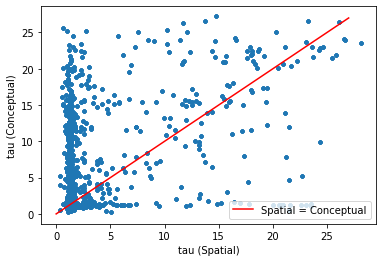

In [293]:
plt.scatter((tau_s),(tau_c), 10, alpha=0.7)
plt.plot([0,27],[0,27], "red")

plt.xlabel("tau (Spatial)")
plt.ylabel("tau (Conceptual)")
plt.legend(["Spatial = Conceptual"], loc="lower right")

In [52]:
import scipy.stats as scs
scs.f_oneway(tau_s,tau_c)

F_onewayResult(statistic=10.213376223316569, pvalue=0.0015692968799669652)

In [55]:
scs.f_oneway(beta_s,beta_c)

F_onewayResult(statistic=10.935773957689452, pvalue=0.0010784313389984328)

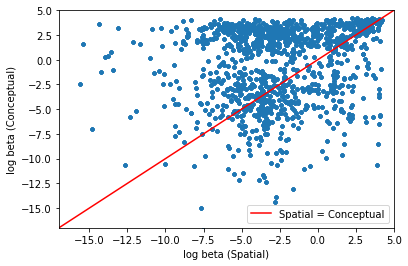

In [288]:
plt.scatter(np.log(beta_s),np.log(beta_c), 10, alpha=0.7)
plt.plot([-100,15],[-100,15], "red")
plt.xlim([-17,5])
plt.ylim([-17,5])
plt.xlabel("log beta (Spatial)")
plt.ylabel("log beta (Conceptual)")
plt.legend(["Spatial = Conceptual"], loc="lower right")

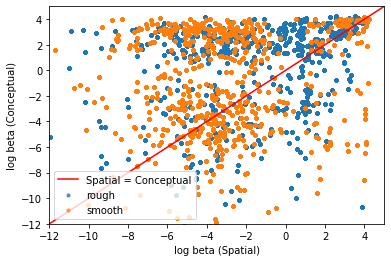

In [337]:
plt.scatter(np.log(res2[(res2["context"]=="Spatial") & (res2["environment"]==0)]["beta"]),np.log(res2[(res2["context"]=="Conceptual") & (res2["environment"]==0)]["beta"]), 10, alpha=0.7)
plt.scatter(np.log(res2[(res2["context"]=="Spatial") & (res2["environment"]==1)]["beta"]),np.log(res2[(res2["context"]=="Conceptual") & (res2["environment"]==1)]["beta"]), 10, alpha=0.7)
plt.plot([-100,15],[-100,15], "red")
plt.xlim([-12,5])
plt.ylim([-12,5])
plt.xlabel("log beta (Spatial)")
plt.ylabel("log beta (Conceptual)")
plt.legend(["Spatial = Conceptual","rough","smooth"], loc="lower left")

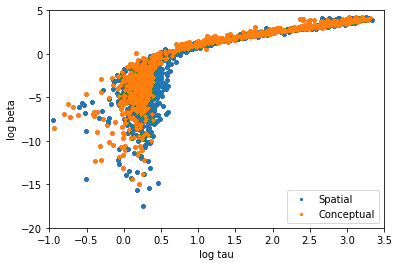

In [423]:
plt.scatter(np.log(res2[(res2["context"]=="Spatial")]["tau"]),np.log(res2[(res2["context"]=="Spatial")]["beta"]), 5, alpha=1)
plt.scatter(np.log(res2[(res2["context"]=="Conceptual")]["tau"]),np.log(res2[(res2["context"]=="Conceptual")]["beta"]), 5, alpha=1)
plt.xlabel("log tau")
plt.ylabel("log beta")
plt.xlim([-1,3.5])
plt.ylim([-20,5])
plt.legend(["Spatial","Conceptual"], loc="lower right")

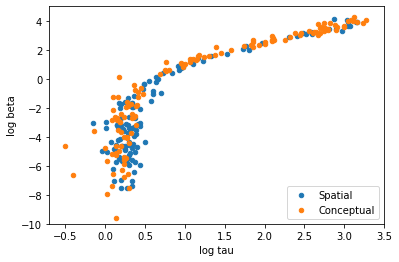

In [525]:
plt.scatter(np.log([x[0] for x in pars_s]),np.log([x[1] for x in pars_s]), 20, alpha=1)
plt.scatter(np.log([x[0] for x in pars_c]),np.log([x[1] for x in pars_c]), 20, alpha=1)
plt.xlabel("log tau")
plt.ylabel("log beta")
plt.xlim([-0.7,3.5])
plt.ylim([-10,5])
plt.legend(["Spatial", "Conceptual"], loc="lower right")

In [ ]:
plt.scatter(np.log(smoothPars["tau"]),np.log(smoothPars["beta"]), 20, alpha=1)
plt.scatter(np.log(roughPars["tau"]),np.log(roughPars["beta"]), 20, alpha=1)
plt.xlabel("log tau")
plt.ylabel("log beta")
plt.xlim([-0.7,3.5])
plt.ylim([-10,5])
plt.legend(["Smooth","Rough"], loc="lower right")

In [437]:
scs.ttest_ind((smoothPars["tau"]),(roughPars["tau"]))

Ttest_indResult(statistic=1.0812204327285289, pvalue=0.2806165464338043)

In [521]:
len(pars_s)

129

In [507]:
scs.ttest_ind((smoothPars["beta"]),(roughPars["beta"]))

Ttest_indResult(statistic=1.2517964224828353, pvalue=0.21178660606880187)

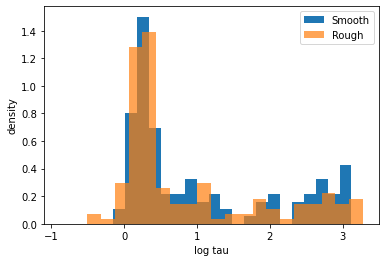

In [510]:
plt.hist(np.log(smoothPars["tau"]), 20, density=True)
plt.hist(np.log(roughPars["tau"]), 20, alpha=0.7, density=True)
plt.xlim([-1.1,3.5])
plt.xlabel("log tau")
plt.ylabel("density")
plt.legend(["Smooth","Rough"])

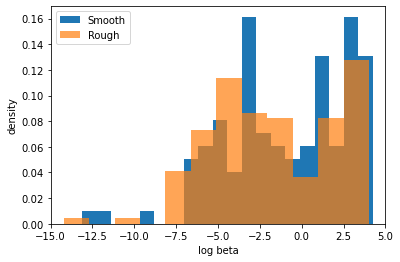

In [517]:
plt.hist(np.log(smoothPars["beta"]), 20, density=True)
plt.hist(np.log(roughPars["beta"]), 20, alpha=0.7, density=True)
plt.xlim([-15,5])
plt.xlabel("log beta")
plt.ylabel("density")
plt.legend(["Smooth","Rough"])

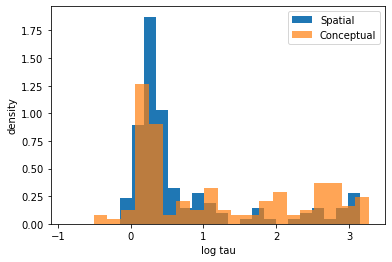

In [511]:
plt.hist(np.log([x[0] for x in pars_s]), 20, density=True)
plt.hist(np.log([x[0] for x in pars_c]), 20, alpha=0.7, density=True)
plt.xlim([-1.1,3.5])
plt.xlabel("log tau")
plt.ylabel("density")
plt.legend(["Spatial","Conceptual"])

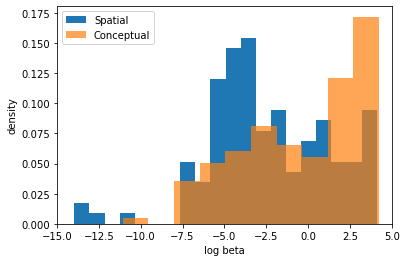

In [518]:
plt.hist(np.log([x[1] for x in pars_s]), 20, density=True)
plt.hist(np.log([x[1] for x in pars_c]), 20, alpha=0.7, density=True)
plt.xlim([-15,5])
plt.xlabel("log beta")
plt.ylabel("density")
plt.legend(["Spatial","Conceptual"])

In [505]:
scs.ttest_ind([x[0] for x in pars_c],[x[0] for x in pars_s])

Ttest_indResult(statistic=3.1958373274177414, pvalue=0.0015692968799669675)

In [506]:
scs.ttest_ind([x[1] for x in pars_c],[x[1] for x in pars_s])

Ttest_indResult(statistic=3.3069281754657824, pvalue=0.0010784313389984185)

In [356]:
scs.ttest_ind(res2[(res2["context"]=="Spatial") & (res2["environment"]==0)]["beta"], res2[(res2["context"]=="Spatial") & (res2["environment"]==1)]["beta"])

Ttest_indResult(statistic=7.961288293171106, pvalue=1.7120897075811381e-15)

In [357]:
scs.ttest_ind(res2[(res2["context"]=="Spatial")]["tau"], res2[(res2["context"]=="Conceptual")]["tau"])

Ttest_indResult(statistic=-149.10141627117676, pvalue=0.0)

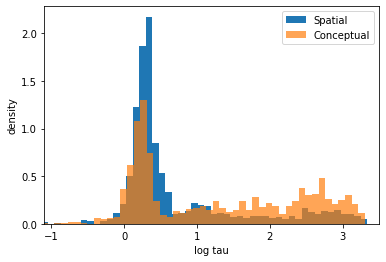

In [400]:
plt.hist(np.log(res2[(res2["context"]=="Spatial")]["tau"]), 50, density=True)
plt.hist(np.log(res2[(res2["context"]=="Conceptual")]["tau"]), 50, alpha=0.7, density=True)
plt.xlim([-1.1,3.5])
plt.xlabel("log tau")
plt.ylabel("density")
plt.legend(["Spatial","Conceptual"])

In [401]:
s1 = list(set(res2[(res2["environment"]==0)]["tau"]))
s2 = list(set(res2[(res2["environment"]==1)]["tau"]))
scs.ttest_ind(s1, s2)

Ttest_indResult(statistic=2.503498331522083, pvalue=0.012365430601706197)

In [406]:
len(s2)+len(s1)

2322

In [405]:
s1 = list(set(res2[(res2["context"]=="Conceptual")]["tau"]))
s2 = list(set(res2[(res2["context"]=="Spatial")]["tau"]))
scs.ttest_ind(s1, s2)

Ttest_indResult(statistic=11.782456121429641, pvalue=3.647274504446838e-31)

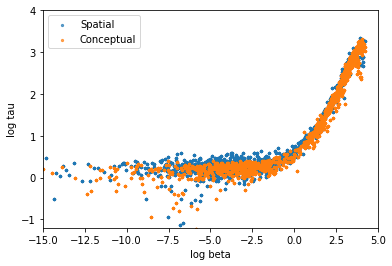

In [327]:
plt.scatter(np.log(beta_s),np.log(tau_s), 5, alpha=0.7)
plt.scatter(np.log(beta_c),np.log(tau_c), 5, alpha=0.7)
plt.xlim([-15,5])
plt.ylim([-1.2,4])
plt.xlabel("log beta")
plt.ylabel("log tau")
plt.legend(["Spatial","Conceptual"])

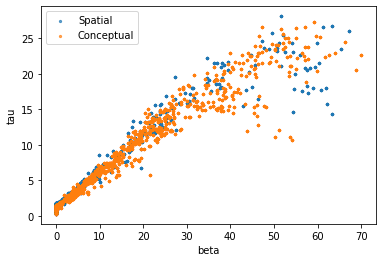

In [332]:
plt.scatter((beta_s),(tau_s), 5, alpha=0.7)
plt.scatter((beta_c),(tau_c), 5, alpha=0.7)
plt.xlabel("beta")
plt.ylabel("tau")
plt.legend(["Spatial","Conceptual"])

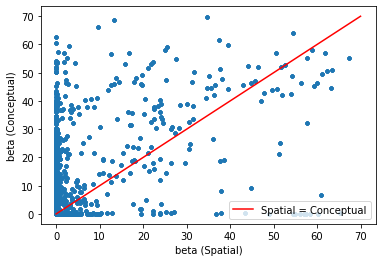

In [297]:
plt.scatter((beta_s),(beta_c), 10, alpha=0.7)
plt.plot([0,70],[0,70], "red")
plt.xlabel("beta (Spatial)")
plt.ylabel("beta (Conceptual)")
plt.legend(["Spatial = Conceptual"], loc="lower right")

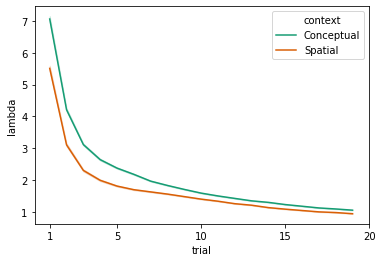

In [424]:
seaborn.lineplot(data=res2[res2["trial"]!=0], x="trial", y="lambda", hue="context", palette=['#159c73','#d95f05']).set_xticks([1, 5,10,15,20])

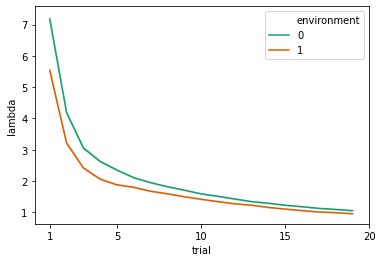

In [315]:
seaborn.lineplot(data=res2[res2["trial"]!=0], x="trial", y="lambda", hue="environment", palette=['#159c73','#d95f05']).set_xticks([1, 5,10,15,20])

In [314]:
def getId(data, ind):
    return data.iloc[ind*400 + 1]["id"]

def getEnvType(data, ind):
    return data[data["id"]==getId(data, ind)]["environment"].iloc[0]

envs = []
for i in inds:
    envs = envs + [getEnvType(df, i)]*9*8*2*20

res2["environment"] = envs

(array([  16.,   24.,  144.,  344.,  456.,  544.,  760.,  872., 1008.,
        1384., 1624., 1632., 1664., 1224., 1016., 1392., 1032., 2160.,
         936.,  344.]),
 array([ 0.40404597,  4.32410244,  8.24415891, 12.16421539, 16.08427186,
        20.00432833, 23.9243848 , 27.84444128, 31.76449775, 35.68455422,
        39.6046107 , 43.52466717, 47.44472364, 51.36478011, 55.28483659,
        59.20489306, 63.12494953, 67.04500601, 70.96506248, 74.88511895,
        78.80517542]),
 <a list of 20 Patch objects>)

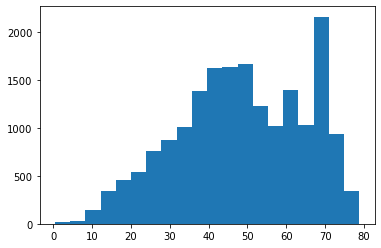

In [6]:
import matplotlib.pyplot as plt

plt.hist(res2[res2["trial"]==19]["looNLL"], 20)

In [2]:
res2

nll     context       tau      beta     lambda   id  \
0     0.000000  Conceptual  1.292921  0.610979   0.000000  128   
1     4.282276  Conceptual  1.292921  0.610979  10.169492  128   
2     8.025274  Conceptual  1.292921  0.610979   5.135593  128   
3    12.327408  Conceptual  1.292921  0.610979   3.728814  128   
4    16.180011  Conceptual  1.292921  0.610979   3.372881  128   
..         ...         ...       ...       ...        ...  ...   
155  32.894985  Conceptual  1.077506  0.226116   1.000000  128   
156  32.855733  Conceptual  1.077506  0.226116   0.932203  128   
157  34.164696  Conceptual  1.077506  0.226116   0.932203  128   
158  35.272991  Conceptual  1.077506  0.226116   0.932203  128   
159  36.237735  Conceptual  1.077506  0.226116   0.898305  128   

     leaveOneOutIndex  round  trial     looNLL  
0                   8      0      0   0.000000  
1                   8      0      1   4.282276  
2                   8      0      2   8.025274  
3                   8      0      3  12.327408  
4                   8      0      4  16.180011  
..                ...    ...    ...        ...  
155                 7      8     15  32.894985  
156                 7      8     16  32.855733  
157                 7      8     17  34.164696  
158                 7      8     18  35.272991  
159                 7      8     19  36.237735  

[371520 rows x 10 columns]

In [174]:
import seaborn 
from functions.plottingFunctions import *
from functions.kernels import *
from functions.models import *

participant = 1
rnd = 0
allChoices = df[(df["id"] == participant) & (df["round"] == rnd)]["chosen"]

def createChoiceArray(choices, y, size=8):
    opts = getAllOptions()
    array = np.zeros([size]*2)
    for i, choice in enumerate(choices):
        array[opts[choice]] = y[i]
    return array

def createGPArray(data, gridSize=8):
    array = np.zeros([gridSize,gridSize])
    opts = getAllOptions(gridSize)
    for i, v in enumerate(data):
        array[opts[i][0],opts[i][1]] = v
    return array

#seaborn.heatmap(createChoiceArray(allChoices))

def getPost(lam, X, Y):
    opts = [[x, y] for y in range(8) for x in range(8)]
    return gpr(opts, [lam, lam, 1.0, 0.0001], X, Y, rbf)

X = df[(df["id"] == participant) & (df["round"] == rnd)][["x","y"]]
Y = df[(df["id"] == participant) & (df["round"] == rnd)]["zscaled"]

post = getPost(1.75, np.matrix(X[0:3]).astype('float64'), np.matrix(Y[0:3]).astype('float64'))

def getId(data, ind):
    return data.iloc[ind*400 + 1]["id"]

def getEnvType(data, ind):
    return data[data["id"]==getId(data, ind)]["environment"].iloc[0]
getId(df, 3)

def getEnvironment(data, rough, smooth, Id, rnd):
    if data[(data["id"] == Id) & (data["round"]==rnd)]["environment"].iloc[0] == 0:
        return rough[str(data[(data["id"] == Id) & (data["round"]==rnd)]["envOrder"].iloc[0])]
    else:
        return smooth[str(data[(data["id"] == Id) & (data["round"]==rnd)]["envOrder"].iloc[0])]

def createEnvironmentArray(environment, gridSize=8):
    array = np.zeros([gridSize]*2)
    for i in range(gridSize**2):
        x = environment[str(i)]
        array[x["x1"], x["x2"]] = x["y"]
    return array

env = getEnvironment(df, roughEnvironments, smoothEnvironments, 1, 0)
createEnvironmentArray(env)

array([[0.85557797, 0.76129294, 0.54482119, 0.23278834, 0.0170461 ,
        0.        , 0.17687826, 0.49391691],
       [0.62117349, 0.57158027, 0.40304633, 0.14882127, 0.00385926,
        0.06720722, 0.26983348, 0.51687441],
       [0.36049267, 0.36212945, 0.25885708, 0.09550523, 0.06041343,
        0.22398252, 0.45968914, 0.63887137],
       [0.23052218, 0.26653704, 0.24069427, 0.16482173, 0.19374747,
        0.39706146, 0.6515149 , 0.80621957],
       [0.29244229, 0.34487739, 0.38783994, 0.35587126, 0.34045433,
        0.44877155, 0.64362849, 0.80669902],
       [0.50690359, 0.56407986, 0.65328496, 0.64776985, 0.55488753,
        0.4939186 , 0.53146713, 0.63715166],
       [0.74266694, 0.78547916, 0.88763833, 0.91036435, 0.79609575,
        0.62002793, 0.48117048, 0.42830317],
       [0.94541399, 0.95157444, 1.        , 0.98637171, 0.86456213,
        0.66337138, 0.4375307 , 0.25503384]])

In [13]:
res2

nll     context       tau      beta     lambda   id  \
0    0.000000  Conceptual  0.085483  0.065040   0.000000    9   
1    4.055296  Conceptual  0.085483  0.065040   2.864407    9   
2    3.804807  Conceptual  0.085483  0.065040   2.016949    9   
3    2.733297  Conceptual  0.085483  0.065040   1.338983    9   
4    3.139823  Conceptual  0.085483  0.065040   2.796610    9   
..        ...         ...       ...       ...        ...  ...   
155  0.000630  Conceptual  0.028221  0.227069   0.169492  128   
156  1.749106  Conceptual  0.028221  0.227069   7.779661  128   
157  1.620189  Conceptual  0.028221  0.227069   7.508475  128   
158  1.496358  Conceptual  0.028221  0.227069   7.203390  128   
159  3.059334  Conceptual  0.028221  0.227069  10.169492  128   

     leaveOneOutIndex  round  trial  
0                   8      0      0  
1                   8      0      1  
2                   8      0      2  
3                   8      0      3  
4                   8      0      4  
..                ...    ...    ...  
155                 7      8     15  
156                 7      8     16  
157                 7      8     17  
158                 7      8     18  
159                 7      8     19  

[371520 rows x 9 columns]

In [10]:
from functions.simulation import gprDF

gpr_df, smoothTotal, roughTotal = gprDF(smoothPars, roughPars, 5, roughEnvironments, smoothEnvironments)

Spatial: 5/5


In [17]:
smoothTotal

array([[ 37.66529521,  99.48811694,  10.71772391,  66.68368824,
         44.09176468,   4.59532434,  97.42448725,   4.79775929,
         52.49979839,  47.28028484],
       [ 43.58223765,  56.91253282,  85.40900502,  36.80272096,
         53.98025553,  22.42123104,  97.42448725,  90.48537731,
         22.29467972,   0.71519746],
       [ 91.01240996,  98.61747079,  57.80195543,  92.53361611,
         46.67041787,  34.95381791,  97.42448725,  59.29427864,
         14.85040328,  81.00868918],
       [ 28.44739274,  97.79088903,  12.72206683,  92.53361611,
         76.46672614,   5.817399  ,  97.42448725,  52.71296614,
         25.1571807 ,  47.28028484],
       [ 23.4678141 ,  97.79088903,  27.98309818,  86.52451912,
         87.37839141,  21.74277892,  97.42448725,  20.25879996,
          6.80402861,  34.77287034],
       [ 61.62400459,  99.48811694,  16.08086092,  67.7416329 ,
         46.67041787,  49.10412924,  97.42448725,  55.97518835,
         52.49979839,  64.96561316],
       [  

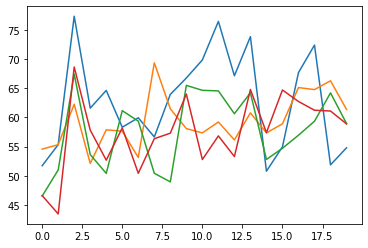

In [16]:
plt.plot(gpr_df["trial"][0:20], gpr_df["meanReward"][0:20])
plt.plot(gpr_df["trial"][20:40], gpr_df["meanReward"][20:40])
plt.plot(gpr_df["trial"][40:60], gpr_df["meanReward"][40:60])
plt.plot(gpr_df["trial"][60:80], gpr_df["meanReward"][60:80])

In [11]:
a = [1,3,5,7,1]
[x for x in range(len(a)) if a[x] == min(a)][0]

0

(array([12352.,  1280.,  1008.,   448.,   360.,   432.,   400.,   328.,
          320.,  1648.]),
 array([ 0.16949153,  1.16949153,  2.16949153,  3.16949153,  4.16949153,
         5.16949153,  6.16949153,  7.16949153,  8.16949153,  9.16949153,
        10.16949153]),
 <a list of 10 Patch objects>)

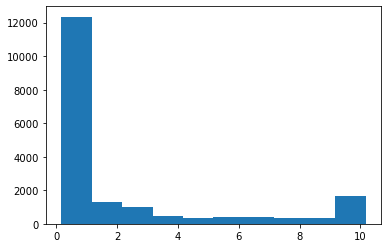

In [15]:
plt.hist(res2[res2["trial"]==19]["lambda"])

In [27]:
from functions.arrayModel import *
from multiprocess import pool
import time

ids = [x for x in set(res2["id"])][20:25]
df2 = readData2()
ind = 0

start = time.time()
results = [0]*len(ids)
with Pool(6) as pool:
    for i in ids:
        print(str(i)+"/"+str(ids[-1]))
        res[i] = cv(df2, res2, i, pool)

print(time.time() - start)

20/24


ValueError: Length of values does not match length of index

In [109]:
res[0][0]

20

In [26]:
def cv(df2, res2, i, pool):
    from functions.arrayModel import model
    import numpy as np
    import pandas as pd
    def fun(res2, df2, i, loo):
        lams = [0]*2
        nlls = [0]*2
        ind = 0
        for task in ["Spatial", "Conceptual"]:
                beta, tau = res2[(res2["id"]==i) & (res2["leaveOneOutIndex"]==loo) & (res2["context"]==task)][["beta","tau"]].iloc[0]
                nll, lam = model(np.log([tau, beta]), df2.iloc[i], [x for x in range(9) if x != loo], task, 40, 4)
                nlls[ind] = nll
                lams[ind*180:(ind+1)*180] = lam
                ind = ind +1
        return (i, loo, lams, nlls)
    results = pool.map(lambda x: fun(res2, df2, i, x), range(9))
    return results

In [53]:
[np.sum(x) for x in nlls]

[305.370944529214,
 194.0000096313919,
 302.4670050528206,
 253.63813717821046,
 304.7016584893021,
 259.4319244269418,
 336.64976585081763,
 201.84498294530016,
 335.6591013458947,
 251.57895688075035,
 279.51802428391176,
 272.6520999543266,
 326.53435884347425,
 244.61760800604728,
 341.62938434309046,
 229.4201456177508,
 347.99013332365166,
 258.1624511465256,
 177.47505244565156,
 207.9501819724606,
 184.16570814717906,
 211.62260356336876,
 153.95404067125568,
 211.76837380374292,
 161.66877208258086,
 172.66923806699052,
 149.97392264221094,
 187.02419161735384,
 155.64623947252684,
 189.38300208543106,
 180.29223155923438,
 208.24327716357857,
 176.7044090172646,
 173.66968984023015,
 186.7623304373172,
 167.89043479139485,
 144.7669733562248,
 193.4968848015953,
 112.8898834327581,
 216.1606032733707,
 156.53101757398724,
 226.17308384127438,
 145.37325576225754,
 252.36535918672928,
 133.68387661529837,
 208.41571015845958,
 157.5554633864857,
 234.0198549171506,
 124.264414

In [77]:
bestLoos = [0]*len([np.sum(x) for x in nlls])
sumNLLs = [np.sum(x) for x in nlls]
sumNLLs = [sumNLLs[x*9:(x+1)*9] for x in range(40)]
pars_spatial = [0]*20
pars_conceptual = [0]*20
for i in range(20):
    loo = [x for x in range(9) if min(sumNLLs[i*2])==sumNLLs[i*2][x]][0]
    pars_spatial[i] = list(res2[(res2["id"]==i) & (res2["leaveOneOutIndex"]==loo) & (res2["context"]=="Spatial")][["tau","beta"]].iloc[0])
    loo = [x for x in range(9) if min(sumNLLs[i*2+1])==sumNLLs[i*2+1][x]][0]
    pars_conceptual[i] = list(res2[(res2["id"]==i) & (res2["leaveOneOutIndex"]==loo) & (res2["context"]=="Conceptual")][["tau","beta"]].iloc[0])

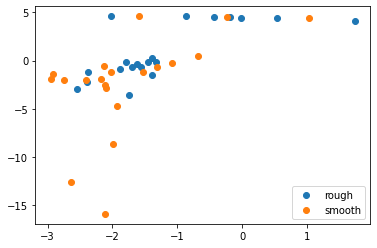

In [89]:
envs = [res2[res2["id"]==x]["environment"].iloc[0] for x in range(20)]
pars_rough = [pars_spatial[x] for x in range(len(envs)) if envs[x] == 0] + [pars_conceptual[x] for x in range(len(envs)) if envs[x] == 0]
pars_smooth = [pars_spatial[x] for x in range(len(envs)) if envs[x] == 1] + [pars_conceptual[x] for x in range(len(envs)) if envs[x] == 1]
plt.scatter(np.log([pars_rough[x][0] for x in range(20)]), np.log([pars_rough[x][1] for x in range(20)]))
plt.scatter(np.log([pars_smooth[x][0] for x in range(20)]), np.log([pars_smooth[x][1] for x in range(20)]))
plt.legend(["rough","smooth"])

In [88]:
envs = [res2[res2["id"]==x]["environment"].iloc[0] for x in range(20)]
pars_rough = pars_spatial[envs == 0] + pars_conceptual[envs == 0]
pars_smooth = pars_spatial[envs == 1] + pars_conceptual[envs == 1]

[pars_spatial[x] for x in range(len(envs)) if envs[x] == 0]

[[0.1518445973529976, 0.4158146068086431],
 [0.9791405864745528, 80.0763531939334],
 [0.21137383294432846, 0.5059276384399438],
 [0.2495425870710724, 1.3273718928038276],
 [0.19708596945899776, 0.6986629323412119],
 [1.7159010609394783, 87.66653353960803],
 [0.0921548649222519, 0.3159200913203989],
 [0.2662586238354059, 0.8839772526185531],
 [0.646270336010784, 94.13854118185333],
 [0.07855856523264126, 0.0506312322565313]]

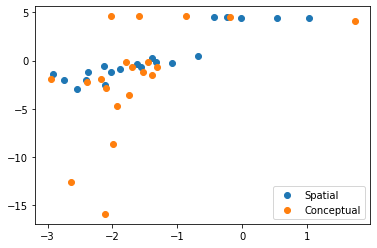

In [79]:
plt.scatter(np.log([pars_spatial[x][0] for x in range(20)]), np.log([pars_spatial[x][1] for x in range(20)]))
plt.scatter(np.log([pars_conceptual[x][0] for x in range(20)]), np.log([pars_conceptual[x][1] for x in range(20)]))
plt.legend(["Spatial","Conceptual"])

(0.0, 3.0)

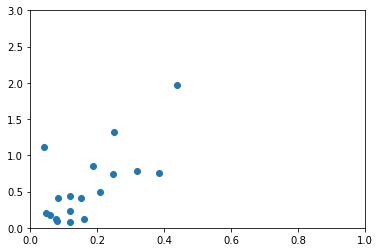

In [69]:
plt.scatter([x[0] for x in pars], [x[1] for x in pars])
plt.xlim([0,1])
plt.ylim([0,3])

In [56]:
with open("lambdas.txt", "w") as outfile:
    outfile.write("\n".join([str(x) for x in lams]))

1.4406779661016949


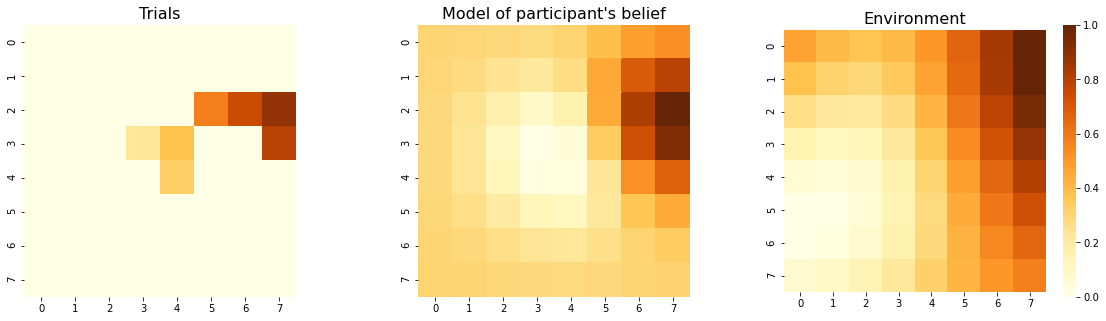

In [175]:
participant = 17
rnd = 0
context = "Spatial"

roundData = res2[(res2["context"]==context) & (res2["round"]==rnd) & (res2["id"]==participant)]
participantId = getId(df, roundData.iloc[0]["id"])

trial = 8
lam = roundData[roundData["trial"]==trial]["lambda"].iloc[0]
X = df[(df["context"]==context) & (df["id"] == participantId) & (df["round"] == rnd)][["x","y"]][0:trial].astype('float64')
Y = df[(df["context"]==context) & (df["id"] == participantId) & (df["round"] == rnd)]["z"][0:trial].astype('float64')
post = getPost(lam, np.matrix(X), np.matrix(Y))
gpArray = createGPArray(post["mu"])

choices = df[(df["context"]==context) & (df["id"] == participantId) & (df["round"] == rnd) & (df["trial"] < trial)]["chosen"]
y = df[(df["context"]==context) & (df["id"] == participantId) & (df["round"] == rnd) & (df["trial"] < trial)]["zscaled"]
choiceArray = createChoiceArray(np.array(choices), np.array(y))

env = getEnvironment(df, roughEnvironments, smoothEnvironments, participantId, rnd)
environmentArray = createEnvironmentArray(env)

cmap = "YlOrBr"
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
seaborn.heatmap(choiceArray, vmin=0, vmax=100, cbar=False, ax=axes[0], cmap=cmap, square=True)
seaborn.heatmap(gpArray, cbar=False, ax=axes[1], cmap=cmap, square=True)
seaborn.heatmap(environmentArray, vmin=0, vmax=1, cbar=True, ax=axes[2], cmap=cmap, square=True)

axes[0].set_title("Trials", fontsize=16)
axes[1].set_title("Model of participant's belief", fontsize=16)
axes[2].set_title("Environment", fontsize=16)

print(lam)

In [189]:
def plotTrials(participant, rnd, context, trials):
    roundData = res2[(res2["context"]==context) & (res2["round"]==rnd) & (res2["id"]==participant)]
    participantId = getId(df, roundData.iloc[0]["id"])
    
    fig, axes = plt.subplots(len(trials), 3, figsize=(15, len(trials)*5))
    cmap = "YlOrBr"
    for i, trial in enumerate(trials):
        lam = roundData[roundData["trial"]==trial]["lambda"].iloc[0]
        X = df[(df["context"]==context) & (df["id"] == participantId) & (df["round"] == rnd)][["x","y"]][0:trial].astype('float64')
        Y = df[(df["context"]==context) & (df["id"] == participantId) & (df["round"] == rnd)]["z"][0:trial].astype('float64')
        post = getPost(lam, np.matrix(X), np.matrix(Y))
        gpArray = createGPArray(post["mu"])

        choices = df[(df["context"]==context) & (df["id"] == participantId) & (df["round"] == rnd) & (df["trial"] < trial)]["chosen"]
        y = df[(df["context"]==context) & (df["id"] == participantId) & (df["round"] == rnd) & (df["trial"] < trial)]["zscaled"]
        choiceArray = createChoiceArray(np.array(choices), np.array(y))

        env = getEnvironment(df, roughEnvironments, smoothEnvironments, participantId, rnd)
        environmentArray = createEnvironmentArray(env)

        axes[0,0].set_title("Trials", fontsize=16)
        axes[0,1].set_title("Model of participant's belief", fontsize=16)
        axes[0,2].set_title("Environment", fontsize=16)
        seaborn.heatmap(choiceArray, vmin=0, vmax=100, cbar=False, ax=axes[i, 0], cmap=cmap)
        seaborn.heatmap(gpArray, cbar=False, ax=axes[i, 1], cmap=cmap)
        seaborn.heatmap(environmentArray, vmin=0, vmax=1, cbar=False, ax=axes[i, 2], cmap=cmap)

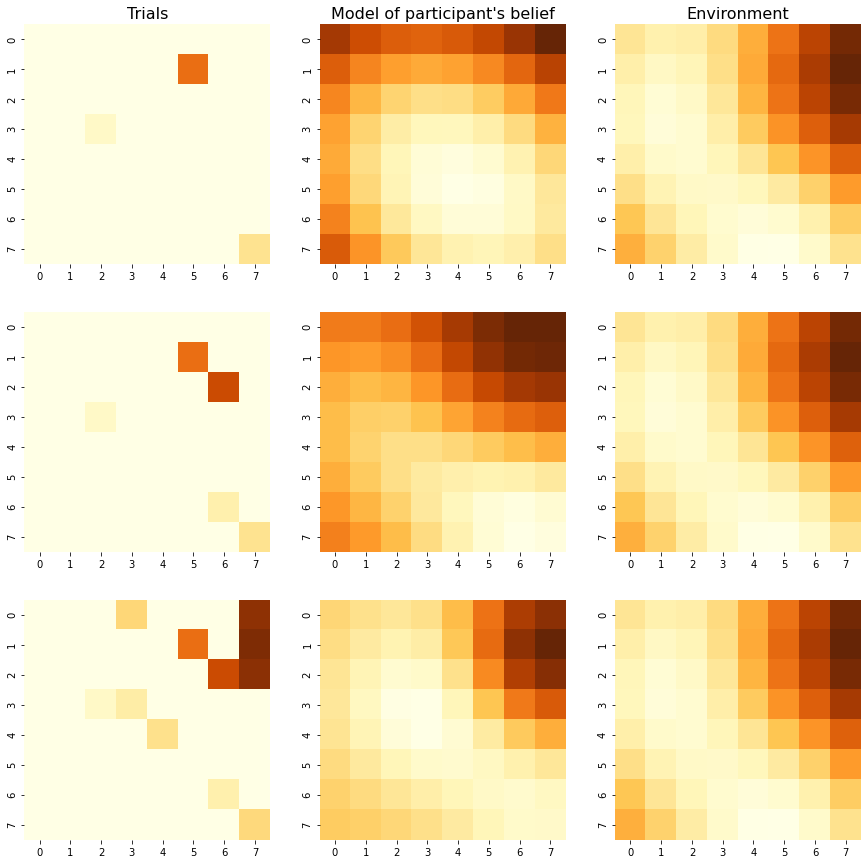

In [196]:
participant = 17
rnd = 5
context = "Spatial"
trials = [3, 5, 12]

plotTrials(participant, rnd, context, trials)

In [4]:
from functions.plottingFunctions import *

participant = 5
rnd = 1
choices = res2[(res2["context"]=="Conceptual") & (res2["leaveOneOutIndex"]==0) & (res2["round"]==rnd) & (res2["id"]==participant)]["chosen"]
environment = getEnvironment(df, roughEnvironments, smoothEnvironments, participant, rnd)

#plotTrial(1, choices, environment, out, parameters, p, ["beta", "lambda"])
plotChoices(choices)


IndexError: index out of bounds

In [7]:
import scipy.stats as scs

beta_c = res2[(res2["context"]=="Conceptual") & (res2["trial"]==0) & (res2["round"]==0)]["beta"]
beta_s = res2[(res2["context"]=="Spatial") & (res2["trial"]==0) & (res2["round"]==0)]["beta"]
scs.ttest_ind(beta_c, beta_s)

Ttest_indResult(statistic=1.1595943923595546, pvalue=0.24665963907172772)

In [13]:
pars_c = res2[(res2["context"]=="Conceptual") & (res2["trial"]==0) & (res2["round"]==0)][["beta","tau"]]
pars_s = res2[(res2["context"]=="Spatial") & (res2["trial"]==0) & (res2["round"]==0)][["beta","tau"]]
scs.f_oneway(pars_s, pars_c)

F_onewayResult(statistic=array([1.34465915, 6.16748494]), pvalue=array([0.24665964, 0.01327472]))

In [14]:
pars_r = res2[(res2["environment"]==0) & (res2["trial"]==0) & (res2["round"]==0)][["beta","tau"]]
pars_s = res2[(res2["environment"]==1) & (res2["trial"]==0) & (res2["round"]==0)][["beta","tau"]]
scs.f_oneway(pars_s, pars_r)

F_onewayResult(statistic=array([0.87484421, 0.16172812]), pvalue=array([0.34998127, 0.68770881]))

In [11]:
res2[(res2["context"]=="Spatial") & (res2["trial"]==0) & (res2["round"]==0)][["beta","tau"]]

beta        tau
0    0.415815   0.151845
0    0.402564   0.128294
0    0.500113   0.143400
0    0.503387   0.133772
0   97.143813   0.011524
..        ...        ...
0    2.556959   0.833794
0    2.559262   0.772817
0   93.113898   0.976921
0   58.372316  11.035301
0   94.407883   0.767222

[312 rows x 2 columns]

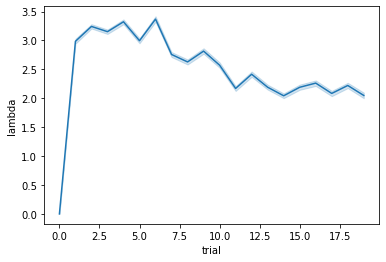

In [5]:
import matplotlib.pyplot as plt
import seaborn

seaborn.lineplot(data=res2, x="trial", y="lambda")

In [20]:
ind = np.linspace(0,len(res2),1 + int(len(res2)/180))[:-1]
tau = list(res2["tau"].iloc[ind])
beta = list(res2["beta"].iloc[ind])
loo = list(res2["leaveOneOutIndex"].iloc[ind])

In [24]:
from functions.arrayModel import *
i = 0
nll, lams = model([tau[i], beta[i]], df.iloc[res2["id"].iloc[0]], [x for x in range(10) if x != loo[i]], res2["context"].iloc[0], 40, 4)

In [26]:
nlls = [0]*10
lams = [0]*10
for i in range(10):
    nlls[i], lams[i] = model([tau[i], beta[i]], df.iloc[res2["id"].iloc[0]], [x for x in range(10) if x != loo[i]], res2["context"].iloc[0], 40, 4)

In [28]:
np.mean([sum(x) for x in nlls])

403.9532563587027

In [29]:
[sum(x) for x in nlls]

[291.31030045643087,
 711.1690072545053,
 287.25017629152336,
 259.5417738858579,
 711.1690072545053,
 248.33583455579037,
 261.3128644625127,
 711.1690072545053,
 274.0467196162945,
 284.2278725551011]

In [ ]:
[(tau[x], beta[x]) for x in range(len(tau))]

[]

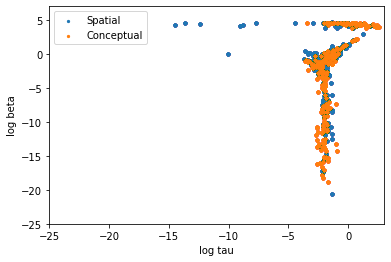

In [5]:
plt.scatter(np.log(res2[res2["context"]=="Spatial"]["tau"]), np.log(res2[res2["context"]=="Spatial"]["beta"]), s=5)
plt.scatter(np.log(res2[res2["context"]=="Conceptual"]["tau"]), np.log(res2[res2["context"]=="Conceptual"]["beta"]), s=5)
plt.legend(["Spatial","Conceptual"])
plt.xlabel("log tau")
plt.ylabel("log beta")
plt.xlim((-25,3))
plt.ylim((-25,7))
plt.plot()

In [7]:
with Pool(4) as pool:
    simDF2 = gprDF(smoothPars, roughPars, pool, 40, 200, roughEnvironments, smoothEnvironments)

Spatial: 200/200


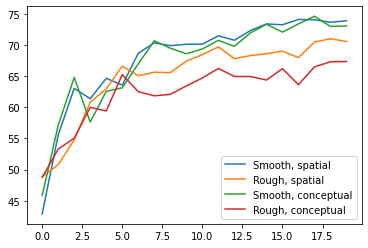

In [4]:
sDF = pd.DataFrame(simDF)
env = "Smooth"
con = "Spatial"
plt.plot(sDF[(sDF["context"]==con) & (sDF["environment"]==env)]["trial"], sDF[(sDF["context"]==con) & (sDF["environment"]==env)]["meanReward"])
env = "Rough"
con = "Spatial"
plt.plot(sDF[(sDF["context"]==con) & (sDF["environment"]==env)]["trial"], sDF[(sDF["context"]==con) & (sDF["environment"]==env)]["meanReward"])
env = "Smooth"
con = "Conceptual"
plt.plot(sDF[(sDF["context"]==con) & (sDF["environment"]==env)]["trial"], sDF[(sDF["context"]==con) & (sDF["environment"]==env)]["meanReward"])
env = "Rough"
con = "Conceptual"
plt.plot(sDF[(sDF["context"]==con) & (sDF["environment"]==env)]["trial"], sDF[(sDF["context"]==con) & (sDF["environment"]==env)]["meanReward"])
plt.legend(["Smooth, spatial", "Rough, spatial", "Smooth, conceptual", "Rough, conceptual"])

[]

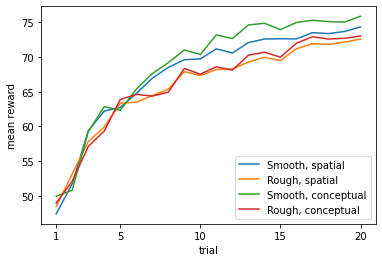

In [15]:
sDF2 = pd.DataFrame(simDF2)
env = "Smooth"
con = "Spatial"
plt.plot(sDF2[(sDF2["context"]==con) & (sDF2["environment"]==env)]["trial"]+1, sDF2[(sDF2["context"]==con) & (sDF2["environment"]==env)]["meanReward"])
env = "Rough"
con = "Spatial"
plt.plot(sDF2[(sDF2["context"]==con) & (sDF2["environment"]==env)]["trial"]+1, sDF2[(sDF2["context"]==con) & (sDF2["environment"]==env)]["meanReward"])
env = "Smooth"
con = "Conceptual"
plt.plot(sDF2[(sDF2["context"]==con) & (sDF2["environment"]==env)]["trial"]+1, sDF2[(sDF2["context"]==con) & (sDF2["environment"]==env)]["meanReward"])
env = "Rough"
con = "Conceptual"
plt.plot(sDF2[(sDF2["context"]==con) & (sDF2["environment"]==env)]["trial"]+1, sDF2[(sDF2["context"]==con) & (sDF2["environment"]==env)]["meanReward"])
plt.xlabel("trial")
plt.ylabel("mean reward")
plt.legend(["Smooth, spatial", "Rough, spatial", "Smooth, conceptual", "Rough, conceptual"])
plt.xticks([1, 5,10,15,20])
plt.plot()

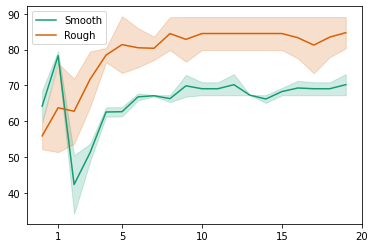

In [7]:
seaborn.lineplot(data=simDF, x="trial", y="meanReward", hue="environment", palette=['#159c73','#d95f05']).set_xticks([1, 5,10,15,20])

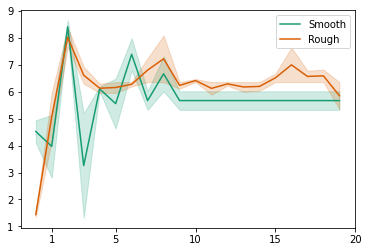

In [5]:
seaborn.lineplot(data=simDF, x="trial", y="meanSE", hue="environment", palette=['#159c73','#d95f05']).set_xticks([1, 5,10,15,20])

In [1]:
from functions.dataProcessing import *
from functions.arrayModel import *
from functions.arrayFit import *

df = readData2()

#fitLeaveOneOut(df, 200, lambda subjD, rounds, context: modelFitCMA(subjD, rounds, context, {'tolx': 1e-2, 'maxfevals': 30}))
fit_fun = lambda participant, rnd, context: [0, 0, [0]*19, [0]*19]
fitLeaveOneOut(df, 2321, fit_fun)
#nll, lams = model([0.01,1.2], df.iloc[0], [x for x in range(10) if x!=0], "Spatial")

nll     context  environment  tau  beta  lambda   id  leaveOneOutIndex  \
0      0  Conceptual            0    0     0       0  128                 8   
1      0  Conceptual            0    0     0       0  128                 8   
2      0  Conceptual            0    0     0       0  128                 8   
3      0  Conceptual            0    0     0       0  128                 8   
4      0  Conceptual            0    0     0       0  128                 8   
..   ...         ...          ...  ...   ...     ...  ...               ...   
139    0  Conceptual            0    0     0       0  128                 8   
140    0  Conceptual            0    0     0       0  128                 8   
141    0  Conceptual            0    0     0       0  128                 8   
142    0  Conceptual            0    0     0       0  128                 8   
143    0  Conceptual            0    0     0       0  128                 8   

     round  trial  chosen  contextOrder  
0        0      0      39             1  
1        0      1      49             1  
2        0      2       9             1  
3        0      3      10             1  
4        0      4       9             1  
..     ...    ...     ...           ...  
139      7     13       5             1  
140      7     14       1             1  
141      7     15      60             1  
142      7     16       4             1  
143      7     17      15             1  

[144 rows x 12 columns]

In [10]:
tau, beta, lam, nll = modelFitCMA(df.iloc[0], [x for x in range(10) if x!=0], "Spatial")

In [11]:
tau

0.14987684763844217

In [12]:
beta

0.44498349947167076

In [13]:
lam

[2.335042735042735,
 4.102564102564102,
 3.8974358974358974,
 3.052991452991453,
 1.641025641025641,
 2.1538461538461537,
 2.916239316239316,
 0.10256410256410256,
 0.10256410256410256,
 0.10256410256410256,
 0.5914529914529914,
 0.10256410256410256,
 2.12991452991453,
 0.3521367521367521,
 0.5914529914529914,
 3.1555555555555554,
 0.5914529914529914,
 0.4888888888888889,
 0.41025641025641024,
 2.0273504273504273,
 1.1282051282051282,
 2.847863247863248,
 2.9504273504273506,
 4.102564102564102,
 0.45470085470085464,
 4.102564102564102,
 4.102564102564102,
 4.102564102564102,
 0.41025641025641024,
 0.3076923076923077,
 4.102564102564102,
 0.41025641025641024,
 0.28376068376068375,
 0.10256410256410256,
 0.10256410256410256,
 0.10256410256410256,
 4.102564102564102,
 3.3606837606837607,
 3.258119658119658,
 1.3333333333333335,
 1.3094017094017094,
 1.435897435897436,
 1.7880341880341881,
 3.1555555555555554,
 3.4871794871794872,
 3.282051282051282,
 0.5572649572649572,
 0.557264957264957

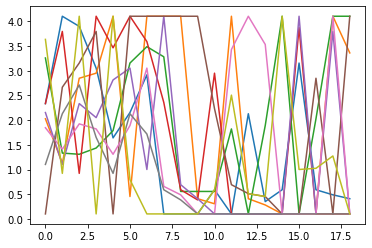

In [14]:
import matplotlib.pyplot as plt

for i in range(9):
    plt.plot(ind, lam[(i*19):((i+1)*19)])

In [3]:
path = 'C:/Users/Jaakko/Documents/GitHub/Masters-thesis/results/'
res = processAllResults(path)
res

nll     context  environment           tau       beta    lambda  id  \
0    0.000000     Spatial            0  1.133797e-01   1.136834  0.000000  20   
1    3.794546     Spatial            0  1.133797e-01   1.136834  2.198291  20   
2    3.045455     Spatial            0  1.133797e-01   1.136834  3.052991  20   
3    3.364263     Spatial            0  1.133797e-01   1.136834  1.025641  20   
4    0.952729     Spatial            0  1.133797e-01   1.136834  1.514530  20   
..        ...         ...          ...           ...        ...       ...  ..   
395  2.302639  Conceptual            1  3.418744e-08  37.628246  2.950427  39   
396  0.693457  Conceptual            1  3.418744e-08  37.628246  0.923077  39   
397  0.000630  Conceptual            1  3.418744e-08  37.628246  0.102564  39   
398  0.000630  Conceptual            1  3.418744e-08  37.628246  0.102564  39   
399  0.000630  Conceptual            1  3.418744e-08  37.628246  0.102564  39   

     round  trial  chosen  contextOrder  
0        0      0      54             1  
1        0      1      14             1  
2        0      2       9             1  
3        0      3       0             1  
4        0      4       9             1  
..     ...    ...     ...           ...  
395      9     15      45             1  
396      9     16      62             1  
397      9     17      63             1  
398      9     18      63             1  
399      9     19      63             1  

[13200 rows x 11 columns]

[]

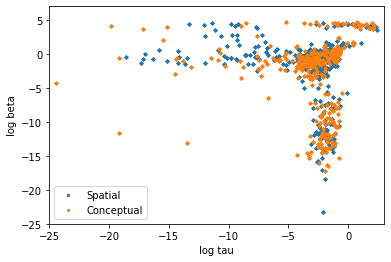

In [51]:
plt.scatter(np.log(res[res["context"]=="Spatial"]["tau"]), np.log(res[res["context"]=="Spatial"]["beta"]), s=5)
plt.scatter(np.log(res[res["context"]=="Conceptual"]["tau"]), np.log(res[res["context"]=="Conceptual"]["beta"]), s=5)
plt.legend(["Spatial","Conceptual"])
plt.xlabel("log tau")
plt.ylabel("log beta")
plt.xlim((-25,3))
plt.ylim((-25,7))
plt.plot()

[]

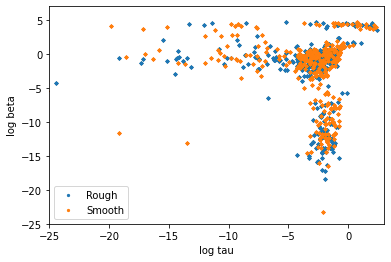

In [52]:
plt.scatter(np.log(res[res["environment"]==0]["tau"]), np.log(res[res["environment"]==0]["beta"]), s=5)
plt.scatter(np.log(res[res["environment"]==1]["tau"]), np.log(res[res["environment"]==1]["beta"]), s=5)
plt.legend(["Rough","Smooth"])
plt.xlabel("log tau")
plt.ylabel("log beta")
plt.xlim((-25,3))
plt.ylim((-25,7))
plt.plot()

[]

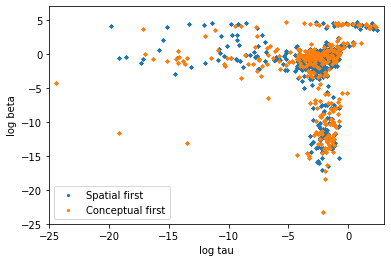

In [53]:
plt.scatter(np.log(res[res["contextOrder"]==0]["tau"]), np.log(res[res["contextOrder"]==0]["beta"]), s=5)
plt.scatter(np.log(res[res["contextOrder"]==1]["tau"]), np.log(res[res["contextOrder"]==1]["beta"]), s=5)
plt.legend(["Spatial first","Conceptual first"])
plt.xlabel("log tau")
plt.ylabel("log beta")
plt.xlim((-25,3))
plt.ylim((-25,7))
plt.plot()

In [9]:
data = res[res["trial"]!=0].copy()
data["trial"] = data["trial"]+1
data["tau"] = np.log(data["tau"])
data["beta"] = np.log(data["beta"])

[]

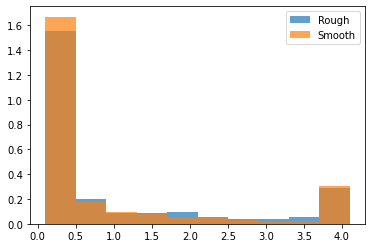

In [26]:
plt.hist(res[(res["trial"]==19) & (res["environment"]==0)]["lambda"], density=True, alpha=0.7)
plt.hist(res[(res["trial"]==19) & (res["environment"]==1)]["lambda"], density=True, alpha=0.7)
plt.legend(["Rough", "Smooth"])
plt.plot()

[]

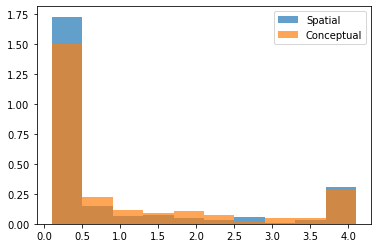

In [25]:
plt.hist(res[(res["trial"]==19) & (res["context"]=="Spatial")]["lambda"], density=True, alpha=0.7)
plt.hist(res[(res["trial"]==19) & (res["context"]=="Conceptual")]["lambda"], density=True, alpha=0.7)
plt.legend(["Spatial", "Conceptual"])
plt.plot()

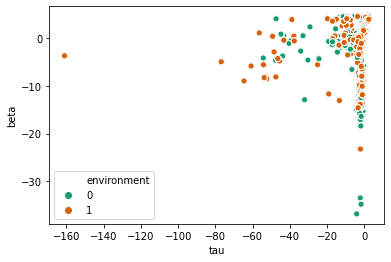

In [18]:
seaborn.scatterplot(data=data, x="tau", y="beta", hue="environment", palette=['#159c73','#d95f05'])

Mean
-2.356295226142047
-3.1825618646291987
---
Median
-0.6099309515322624
-1.251059489428243


[]

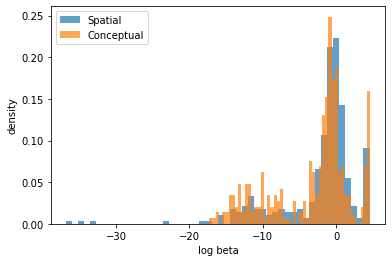

In [17]:
print("Mean")
print(np.mean(data[data["context"]=="Spatial"]["beta"]))
print(np.mean(data[data["context"]=="Conceptual"]["beta"]))
print("---")
print("Median")
print(np.median(data[data["context"]=="Spatial"]["beta"]))
print(np.median(data[data["context"]=="Conceptual"]["beta"]))
plt.hist(data[data["context"]=="Spatial"]["beta"],50, density=True, alpha=0.7)
plt.hist(data[data["context"]=="Conceptual"]["beta"],50, density=True, alpha=0.7)
plt.legend(["Spatial","Conceptual"])
plt.ylabel("density")
plt.xlabel("log beta")
plt.plot()

Mean
-3.0711783983929073
-2.4854286837317057
---
Median
-0.8926386735462364
-0.8664783719439457


[]

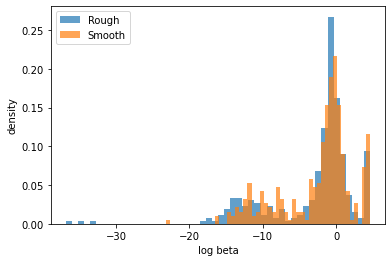

In [16]:
print("Mean")
print(np.mean(data[data["environment"]==0]["beta"]))
print(np.mean(data[data["environment"]==1]["beta"]))
print("---")
print("Median")
print(np.median(data[data["environment"]==0]["beta"]))
print(np.median(data[data["environment"]==1]["beta"]))
plt.hist(data[data["environment"]==0]["beta"],50, density=True, alpha=0.7)
plt.hist(data[data["environment"]==1]["beta"],50, density=True, alpha=0.7)
plt.legend(["Rough","Smooth"])
plt.ylabel("density")
plt.xlabel("log beta")
plt.plot()

Mean
-2.5175781194995306
-3.006464240337149
---
Median
-0.9782032178535041
-0.7576018462290954


[]

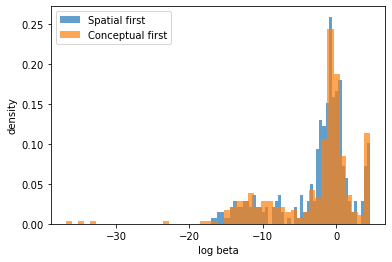

In [15]:
print("Mean")
print(np.mean(data[data["contextOrder"]==0]["beta"]))
print(np.mean(data[data["contextOrder"]==1]["beta"]))
print("---")
print("Median")
print(np.median(data[data["contextOrder"]==0]["beta"]))
print(np.median(data[data["contextOrder"]==1]["beta"]))
plt.hist(data[data["contextOrder"]==0]["beta"],50, density=True, alpha=0.7)
plt.hist(data[data["contextOrder"]==1]["beta"],50, density=True, alpha=0.7)
plt.legend(["Spatial first", "Conceptual first"])
plt.ylabel("density")
plt.xlabel("log beta")
plt.plot()

Mean
-5.109051337548562
-6.450501936120617
---
Median
-2.616087734546449
-2.5057377121235764


[]

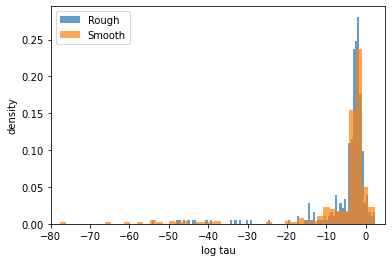

In [20]:
print("Mean")
print(np.mean(data[data["environment"]==0]["tau"]))
print(np.mean(data[data["environment"]==1]["tau"]))
print("---")
print("Median")
print(np.median(data[data["environment"]==0]["tau"]))
print(np.median(data[data["environment"]==1]["tau"]))
plt.hist(data[data["environment"]==0]["tau"],100, density=True, alpha=0.7)
plt.hist(data[data["environment"]==1]["tau"],100, density=True, alpha=0.7)
plt.legend(["Rough","Smooth"])
plt.xlim((-80,5))
plt.ylabel("density")
plt.xlabel("log tau")
plt.plot()

Mean
-6.298399407079476
-5.331115517738546
---
Median
-2.6841255229367516
-2.5018373898876014


[]

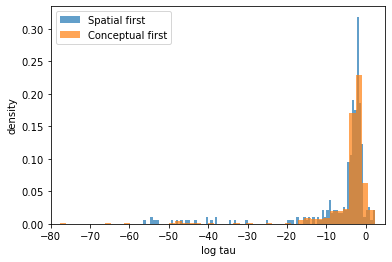

In [19]:
print("Mean")
print(np.mean(data[data["contextOrder"]==0]["tau"]))
print(np.mean(data[data["contextOrder"]==1]["tau"]))
print("---")
print("Median")
print(np.median(data[data["contextOrder"]==0]["tau"]))
print(np.median(data[data["contextOrder"]==1]["tau"]))
plt.hist(data[data["contextOrder"]==0]["tau"],100, density=True, alpha=0.7)
plt.hist(data[data["contextOrder"]==1]["tau"],100, density=True, alpha=0.7)
plt.legend(["Spatial first","Conceptual first"])
plt.xlim((-80,5))
plt.ylabel("density")
plt.xlabel("log tau")
plt.plot()

Mean
-5.8703860772188845
-5.729817214588722
---
Median
-2.7092670209932863
-2.458010276332468


[]

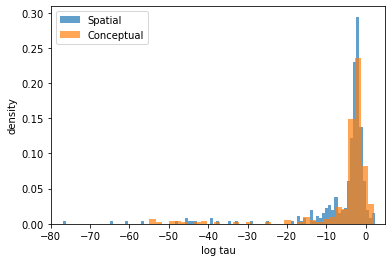

In [18]:
print("Mean")
print(np.mean(data[data["context"]=="Spatial"]["tau"]))
print(np.mean(data[data["context"]=="Conceptual"]["tau"]))
print("---")
print("Median")
print(np.median(data[data["context"]=="Spatial"]["tau"]))
print(np.median(data[data["context"]=="Conceptual"]["tau"]))
plt.hist(data[data["context"]=="Spatial"]["tau"],100, density=True, alpha=0.7)
plt.hist(data[data["context"]=="Conceptual"]["tau"],100, density=True, alpha=0.7)
plt.xlim((-80,5))
plt.legend(["Spatial","Conceptual"])
plt.ylabel("density")
plt.xlabel("log tau")
plt.plot()

[]

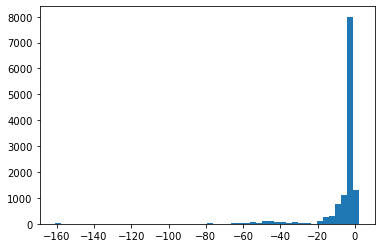

In [15]:
plt.hist(data["tau"], 50)
plt.plot()

[]

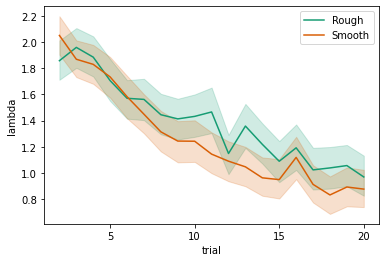

In [19]:
seaborn.lineplot(data=data, x="trial", y="lambda", hue="environment", palette=['#159c73','#d95f05']).set_xticks([1, 5,10,15,20])
plt.legend(labels=["Rough", "Smooth"])
plt.plot()

[]

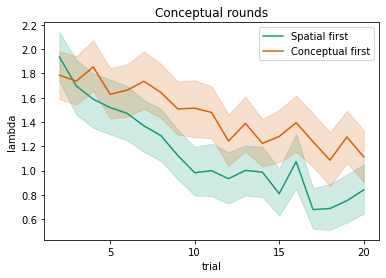

In [8]:
seaborn.lineplot(data=data[data["context"]=="Conceptual"], x="trial", y="lambda", hue="contextOrder", palette=['#159c73','#d95f05']).set_xticks([1, 5,10,15,20])
plt.title("Conceptual rounds")
plt.legend(labels=["Spatial first", "Conceptual first"])
plt.plot()

[]

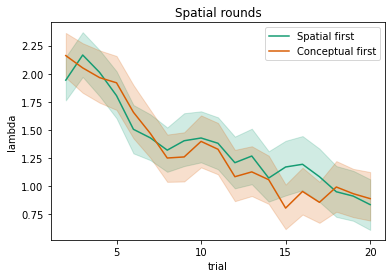

In [9]:
seaborn.lineplot(data=data[data["context"]=="Spatial"], x="trial", y="lambda", hue="contextOrder", palette=['#159c73','#d95f05']).set_xticks([1, 5,10,15,20])
plt.title("Spatial rounds")
plt.legend(labels=["Spatial first", "Conceptual first"])
plt.plot()

[]

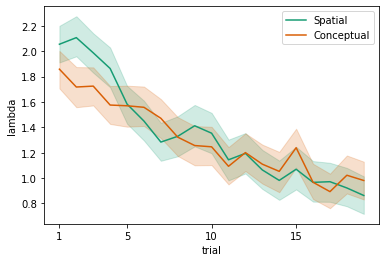

In [21]:
seaborn.lineplot(data=res[res["trial"]!=0], x="trial", y="lambda", hue="context", palette=['#159c73','#d95f05']).set_xticks([1, 5,10,15,20])
plt.legend(labels=["Spatial", "Conceptual"])
plt.plot()

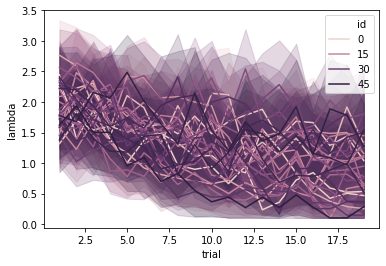

In [22]:
seaborn.lineplot(data=res[res["trial"]!=0], x="trial", y="lambda", hue="id")

In [3]:
from functions.arrayFit import *
from functions.arrayModel import *
from functions.dataProcessing import *
df = readData()

fit_fun = lambda participant, rnd, context: [0, 0, [0]*19, [0]*19]
fitOnePart(df, 0, fit_fun)

nll     context  environment  tau  beta  lambda  id  round  trial  \
0      0     Spatial            0    0     0       0   0      0      0   
1      0     Spatial            0    0     0       0   0      0      1   
2      0     Spatial            0    0     0       0   0      0      2   
3      0     Spatial            0    0     0       0   0      0      3   
4      0     Spatial            0    0     0       0   0      0      4   
..   ...         ...          ...  ...   ...     ...  ..    ...    ...   
395    0  Conceptual            0    0     0       0   0      9     15   
396    0  Conceptual            0    0     0       0   0      9     16   
397    0  Conceptual            0    0     0       0   0      9     17   
398    0  Conceptual            0    0     0       0   0      9     18   
399    0  Conceptual            0    0     0       0   0      9     19   

     chosen  contextOrder  
0        46             0  
1        20             0  
2        32             0  
3        45             0  
4         7             0  
..      ...           ...  
395      49             0  
396      57             0  
397      57             0  
398      57             0  
399      57             0  

[400 rows x 11 columns]

In [7]:
for v in fitOnePart(df, 0, fit_fun).values:
    print(v)

[0 'Spatial' 0 0 0 0 0 0 0 46 0]
[0 'Spatial' 0 0 0 0 0 0 1 20 0]
[0 'Spatial' 0 0 0 0 0 0 2 32 0]
[0 'Spatial' 0 0 0 0 0 0 3 45 0]
[0 'Spatial' 0 0 0 0 0 0 4 7 0]
[0 'Spatial' 0 0 0 0 0 0 5 14 0]
[0 'Spatial' 0 0 0 0 0 0 6 6 0]
[0 'Spatial' 0 0 0 0 0 0 7 15 0]
[0 'Spatial' 0 0 0 0 0 0 8 23 0]
[0 'Spatial' 0 0 0 0 0 0 9 22 0]
[0 'Spatial' 0 0 0 0 0 0 10 13 0]
[0 'Spatial' 0 0 0 0 0 0 11 33 0]
[0 'Spatial' 0 0 0 0 0 0 12 0 0]
[0 'Spatial' 0 0 0 0 0 0 13 2 0]
[0 'Spatial' 0 0 0 0 0 0 14 16 0]
[0 'Spatial' 0 0 0 0 0 0 15 9 0]
[0 'Spatial' 0 0 0 0 0 0 16 35 0]
[0 'Spatial' 0 0 0 0 0 0 17 63 0]
[0 'Spatial' 0 0 0 0 0 0 18 56 0]
[0 'Spatial' 0 0 0 0 0 0 19 7 0]
[0 'Spatial' 0 0 0 0 0 1 0 16 0]
[0 'Spatial' 0 0 0 0 0 1 1 56 0]
[0 'Spatial' 0 0 0 0 0 1 2 7 0]
[0 'Spatial' 0 0 0 0 0 1 3 63 0]
[0 'Spatial' 0 0 0 0 0 1 4 31 0]
[0 'Spatial' 0 0 0 0 0 1 5 29 0]
[0 'Spatial' 0 0 0 0 0 1 6 30 0]
[0 'Spatial' 0 0 0 0 0 1 7 39 0]
[0 'Spatial' 0 0 0 0 0 1 8 60 0]
[0 'Spatial' 0 0 0 0 0 1 9 4 0]
[0 'Spat

In [5]:
modelFitCMA(df.iloc[0], [0], "Spatial")

(0.023152442841805735,
 0.7640895056380093,
 [1.9247863247863248,
  2.3008547008547007,
  4.102564102564102,
  1.0017094017094017,
  1.1042735042735041,
  0.717948717948718,
  0.5572649572649572,
  0.4888888888888889,
  4.102564102564102,
  0.45470085470085464,
  0.10256410256410256,
  0.3521367521367521,
  0.24957264957264963,
  0.3076923076923077,
  0.3076923076923077,
  0.24957264957264963,
  0.3521367521367521,
  0.3521367521367521,
  0.4888888888888889],
 [3.6097902427683852,
  3.0094890345979746,
  3.0316454068038627,
  3.401628890476787,
  1.4481687132697523,
  0.7149659682998671,
  0.22816534459379043,
  1.6633345995235986,
  0.8590733468360535,
  2.9079991675063095,
  3.9702940652070247,
  3.9458946876442322,
  3.9317874658770062,
  3.910271674899695,
  3.890348153546532,
  3.8711755126794296,
  3.8435946053113543,
  3.8137313584904624,
  7.682872630532193])

In [3]:
fit_fun = lambda participant, rnd, context: [0, 0, [0]*19, [0]*19]

res = fitMultiple(df, [0,1,2], fit_fun)
res

1.7%
3.3%
5.0%
6.7%
8.3%
10.0%
11.7%
13.3%
15.0%
16.7%
18.3%
20.0%
21.7%
23.3%
25.0%
26.7%
28.3%
30.0%
31.7%
33.3%
35.0%
36.7%
38.3%
40.0%
41.7%
43.3%
45.0%
46.7%
48.3%
50.0%
51.7%
53.3%
55.0%
56.7%
58.3%
60.0%
61.7%
63.3%
65.0%
66.7%
68.3%
70.0%
71.7%
73.3%
75.0%
76.7%
78.3%
80.0%
81.7%
83.3%
85.0%
86.7%
88.3%
90.0%
91.7%
93.3%
95.0%
96.7%
98.3%
100.0%


nll     context  environment  tau  beta  lambda  id  round  trial  \
0       0     Spatial            0    0     0       0   0      0      0   
1       0     Spatial            0    0     0       0   0      0      1   
2       0     Spatial            0    0     0       0   0      0      2   
3       0     Spatial            0    0     0       0   0      0      3   
4       0     Spatial            0    0     0       0   0      0      4   
...   ...         ...          ...  ...   ...     ...  ..    ...    ...   
1195    0  Conceptual            0    0     0       0   2      9     15   
1196    0  Conceptual            0    0     0       0   2      9     16   
1197    0  Conceptual            0    0     0       0   2      9     17   
1198    0  Conceptual            0    0     0       0   2      9     18   
1199    0  Conceptual            0    0     0       0   2      9     19   

      chosen  contextOrder  
0         46             0  
1         20             0  
2         32             0  
3         45             0  
4          7             0  
...      ...           ...  
1195      49             1  
1196      58             1  
1197      33             1  
1198      57             1  
1199      57             1  

[1200 rows x 11 columns]

In [ ]:
opts = {'CMA_cmean': 2, 'tolx': 2.5e-1, 'maxfevals': 200,  'tolstagnation': 3}
fit_fun = lambda participant, rnd, context: modelFit(participant, rnd, context, False, opts)

res = fitMultiple(df, [0], fit_fun)

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=370972, Tue Mar 15 10:50:03 2022)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 6.116860594084010e+01 1.0e+00 4.70e-01  4e-01  5e-01 1:29.7
    2     12 6.152972559465124e+01 1.2e+00 4.86e-01  4e-01  5e-01 3:01.2
    3     18 5.837688655423640e+01 1.2e+00 6.54e-01  5e-01  8e-01 4:42.6
    4     24 5.652498440049328e+01 1.8e+00 7.14e-01  4e-01  1e+00 6:23.9
    5     30 5.612650225356746e+01 2.5e+00 6.54e-01  4e-01  8e-01 8:04.0
    6     36 5.633442884668575e+01 2.3e+00 4.95e-01  2e-01  5e-01 9:41.6
    7     42 5.574368181673537e+01 2.4e+00 6.79e-01  4e-01  9e-01 11:11.3
    8     48 5.290852911566579e+01 2.7e+00 1.11e+00  7e-01  1e+00 12:42.7
    9     54 4.643692138848225e+01 3.1e+00 1.36e+00  8e-01  2e+00 14:19.3
   10     60 3.518864726016577e+01 2.8e+00 2.44e+00  2e+00  4e+00 15:50.6
   11     66 3.169007009723601e+01 3.4e+00 3.26e+00  2e+00  4e+00 17:26.7
   12     72 3.414251951304018

   10     60 1.937838956378823e+01 2.1e+00 1.49e+00  1e+00  1e+00 13:41.6
   11     66 1.929243422195005e+01 1.8e+00 2.35e+00  2e+00  2e+00 15:03.4
   12     72 1.924186731825333e+01 1.7e+00 2.52e+00  2e+00  2e+00 16:25.3
   13     78 1.924220509939658e+01 2.2e+00 2.41e+00  2e+00  2e+00 17:47.3
   14     84 1.924234785428864e+01 1.8e+00 1.89e+00  1e+00  1e+00 19:08.7
   15     90 1.923258301976744e+01 1.8e+00 1.72e+00  8e-01  1e+00 20:30.5
   16     96 1.923506783514071e+01 1.6e+00 1.46e+00  6e-01  8e-01 21:52.4
   17    102 1.920340148358424e+01 1.4e+00 1.82e+00  7e-01  1e+00 23:14.3
   18    108 1.912449692384648e+01 1.8e+00 2.17e+00  9e-01  1e+00 24:36.2
   19    114 1.914188212285725e+01 1.9e+00 1.90e+00  7e-01  1e+00 25:57.9
   20    120 1.913337621442090e+01 1.8e+00 1.86e+00  7e-01  1e+00 27:19.7
   21    126 1.912456178128494e+01 1.7e+00 1.72e+00  6e-01  1e+00 28:41.6
   22    132 1.912650174410869e+01 1.7e+00 2.25e+00  1e+00  1e+00 30:03.2
   23    138 1.913955035397604e+01 1.5

    4     24 3.640981390879246e+01 1.3e+00 7.02e-01  6e-01  6e-01 5:28.5
    5     30 3.365147424350844e+01 1.1e+00 6.05e-01  5e-01  5e-01 6:50.6
    6     36 3.121672337332040e+01 1.2e+00 6.17e-01  5e-01  5e-01 8:12.7
    7     42 3.297600126643964e+01 1.3e+00 6.77e-01  5e-01  5e-01 9:35.1
    8     48 3.145042167919622e+01 1.3e+00 6.79e-01  5e-01  6e-01 10:56.9
    9     54 3.164108247275079e+01 1.6e+00 5.09e-01  3e-01  4e-01 12:19.2
   10     60 3.164182920215497e+01 1.5e+00 4.14e-01  2e-01  3e-01 13:41.7
   11     66 3.157342702262592e+01 1.5e+00 3.18e-01  2e-01  2e-01 15:03.6
termination on tolx=0.25 (Tue Mar 15 15:29:10 2022)
final/bestever f-value = 3.165374e+01 3.121672e+01
incumbent solution: [-1.4229502171054529, -0.5922362425241319]
std deviation: [0.15554342900822982, 0.19608749641031667]
40.0%
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=402075, Tue Mar 15 15:29:24 2022)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 4.34779

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=379659, Mon Mar 14 22:18:00 2022)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 1.082624845388783e+02 1.0e+00 4.05e-01  3e-01  4e-01 2:33.3
    2     12 9.181713508245159e+01 1.2e+00 4.94e-01  5e-01  5e-01 5:00.0
    3     18 7.193786771438234e+01 1.2e+00 6.22e-01  6e-01  7e-01 7:13.7
    4     24 7.132297435167752e+01 1.7e+00 5.71e-01  5e-01  6e-01 8:60.0
    5     30 7.107854238034581e+01 1.4e+00 5.21e-01  4e-01  4e-01 10:32.6
    6     36 7.081508706489470e+01 1.3e+00 4.75e-01  3e-01  4e-01 12:05.1
    7     42 7.082121349619722e+01 1.4e+00 4.67e-01  3e-01  4e-01 13:37.9
    8     48 7.057018288389237e+01 1.5e+00 5.44e-01  3e-01  5e-01 15:11.2
    9     54 7.066913983298298e+01 1.8e+00 4.68e-01  3e-01  4e-01 16:44.0
   10     60 7.080756215561604e+01 2.4e+00 3.68e-01  2e-01  3e-01 18:16.4
   11     66 7.082755679428408e+01 2.4e+00 3.04e-01  1e-01  2e-01 19:49.0
termination on tolx=0.25 (Mo

[]

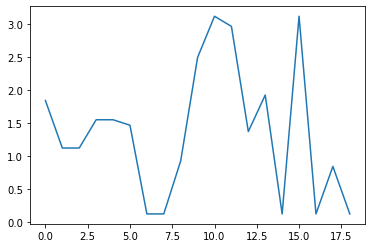

In [8]:
participant = 0
rnd = 0
context = "Conceptual"
n_grid = 60
n_pool = 4
opts = {'CMA_cmean': 2, 'tolx': 2.5e-1, 'maxfevals': 200,  'tolstagnation': 3}

tau, beta, lam, nll = modelFit(df.iloc[participant], [rnd], context, False, opts)

print("Log tau: "+str(np.log(tau))+", log beta: "+str(np.log(beta)))
print("Tau: "+str(tau)+", beta: "+str(beta))
plt.plot(lam)
plt.plot()

In [ ]:
Tau: 0.008514920454611495, beta: 2.34899626169273

In [4]:
cma.CMAOptions()

{'AdaptSigma': 'True  # or False or any CMAAdaptSigmaBase class e.g. CMAAdaptSigmaTPA, CMAAdaptSigmaCSA',
 'CMA_active': 'True  # negative update, conducted after the original update',
 'CMA_cmean': '1  # learning rate for the mean value',
 'CMA_const_trace': 'False  # normalize trace, 1, True, "arithm", "geom", "aeig", "geig" are valid',
 'CMA_diagonal': '0*100*N/popsize**0.5  # nb of iterations with diagonal covariance matrix, True for always',
 'CMA_eigenmethod': 'np.linalg.eigh  # or cma.utilities.math.eig or pygsl.eigen.eigenvectors',
 'CMA_elitist': 'False  #v or "initial" or True, elitism likely impairs global search performance',
 'CMA_injections_threshold_keep_len': '1  #v keep length if Mahalanobis length is below the given relative threshold',
 'CMA_mirrors': 'popsize < 6  # values <0.5 are interpreted as fraction, values >1 as numbers (rounded), otherwise about 0.16 is used',
 'CMA_mirrormethod': '2  # 0=unconditional, 1=selective, 2=selective with delay',
 'CMA_mu': 'None 

In [3]:
participant = 3
rnd = 3
context = "Spatial"
n_grid = 60
n_pool = 4

tau, beta, lam = modelFit(df.iloc[participant], [rnd], context, False)

print("Tau: "+str(tau)+", beta: "+str(beta))
plt.plot(lam)
plt.plot()

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=650709, Sun Mar  6 07:17:01 2022)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 2.175515834209466e+01 1.0e+00 4.44e-01  4e-01  4e-01 1:39.8
    2     12 1.988727795732083e+01 1.1e+00 4.77e-01  4e-01  5e-01 3:20.7
    3     18 1.989316028322490e+01 1.1e+00 5.13e-01  4e-01  5e-01 4:59.6
    4     24 1.868609623474600e+01 1.3e+00 6.70e-01  5e-01  8e-01 6:39.4
    5     30 1.749105673215461e+01 1.6e+00 8.50e-01  7e-01  1e+00 8:17.5
    6     36 1.407025311443715e+01 2.0e+00 8.47e-01  6e-01  1e+00 9:56.5
    7     42 1.457757301731061e+01 1.9e+00 1.01e+00  8e-01  1e+00 11:34.8
    8     48 8.801138088030191e+00 1.4e+00 1.23e+00  9e-01  2e+00 13:12.1
    9     54 7.668509934975860e+00 1.7e+00 1.34e+00  9e-01  2e+00 14:49.6
   10     60 7.737290585416576e+00 1.8e+00 1.25e+00  7e-01  2e+00 16:27.4
   11     66 7.031863195161725e+00 2.2e+00 1.09e+00  6e-01  1e+00 18:02.0
   12     72 5.660789458124615

IndexError: index 1 is out of bounds for axis 0 with size 0

In [3]:
simulations = gprDF(0.0067, 2.053, 0.0067, 2.053, Pool(4), 60, 5, roughEnvironments, smoothEnvironments)

Spatial: 5/5


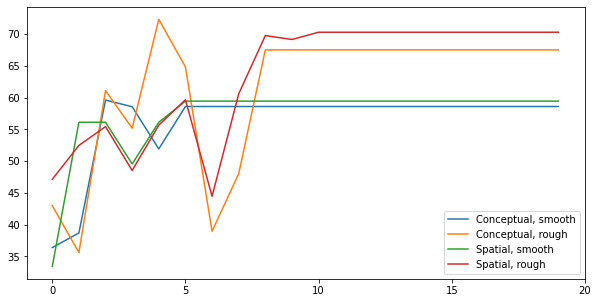

In [4]:
plt.rcParams['figure.figsize'] = [10, 5]
fig, ax = plt.subplots()
plt.plot(range(20), simulations["meanReward"][0:20])
plt.plot(range(20), simulations["meanReward"][20:40])
plt.plot(range(20), simulations["meanReward"][40:60])
plt.plot(range(20), simulations["meanReward"][60:80])
ax.set_xticks([0, 5, 10, 15, 20])
plt.legend(["Conceptual, smooth", "Conceptual, rough","Spatial, smooth", "Spatial, rough"])
plt.show()

Choice: 98, 11: 0.012659969468989167
40/40
Fit finished in 577.06s


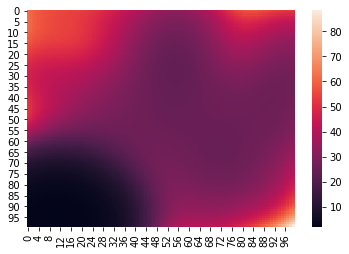

In [42]:
participant = 0
rnd = 1
context = "Spatial"
n_grid = 60
n_pool = 4
n = 20
n2 = 100

with Pool(n_pool) as pool:
    out = modelFitGP(df.iloc[participant], rnd, context, pool, n_grid, [2, 15], n, n2)
seaborn.heatmap(1/createArrayGP(out[n-1]["mu"], n2))

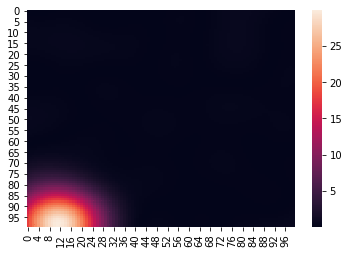

In [43]:
seaborn.heatmap(createArrayGP(out[n-1]["sig"], n2))

In [37]:
# Tau, beta
ind = [(x, y) for y in range(n2) for x in range(n2)][[x for x in range(len(out[n-1]["mu"])) if out[n-1]["mu"][x] == max(out[n-1]["mu"])][0]]
tau = np.exp(np.linspace(-5,5,n2)[ind[0]])
beta = np.exp(np.linspace(-5,5,n2)[ind[1]])
print(1/max(out[n-1]["mu"]))
print(tau)
print(beta)

20.731932088821402
0.07609615235623413
39.91965011971619


Fit finished in 11.96s
99


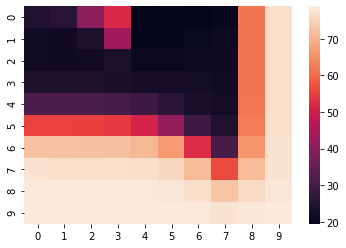

In [45]:
participant = 0
rnd = 1
context = "Conceptual"
n_grid = 60
n_pool = 3
n = 50
n2 = 100
g = 10
err = np.zeros([g,g])
vals = np.linspace(-6,6,g)
for i in range(g):
    for ii in range(g):
        with Pool(n_pool) as pool:
            nll, lams = model_fast([vals[i],vals[ii]], df.iloc[participant], rnd, context, pool, n_grid)
            err[i,ii] = sum(nll)
            print(i*g+ii)
seaborn.heatmap(err)

In [28]:
vals[5]

2.1428571428571432

Fit finished in 20.21s
78.9752291275674


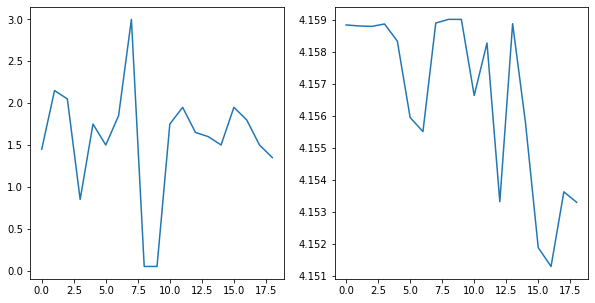

In [21]:
with Pool(n_pool) as pool:
    nll, lams = model_fast([np.log(tau), np.log(beta)], df.iloc[participant], rnd, context, pool, n_grid)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(lams)
axes[1].plot(nll)
plt.plot()
print(sum(nll))

Fit finished in 10696.33s
Tau: 0.006737946999085467, beta: 2.0536911157399422


[]

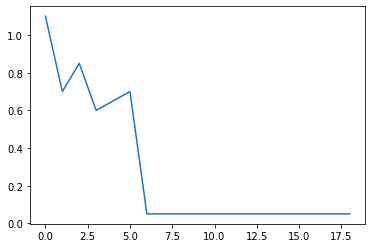

In [7]:
participant = 3
rnd = 3
context = "Spatial"
n_grid = 60
n_pool = 4

with Pool(n_pool) as pool:
    tau, beta, lam = modelFit_fast(df.iloc[participant], rnd, context, pool, n_grid)

print("Tau: "+str(tau)+", beta: "+str(beta))
plt.plot(lam)
plt.plot()

In [21]:
participant = 3
rnd = 3
context = "Spatial"
n_grid = 60
n_pool = 4

tau, beta, lam = modelFit(df.iloc[participant], [rnd], context)

print("Tau: "+str(tau)+", beta: "+str(beta))
plt.plot(lam)
plt.plot()

differential_evolution step 1: f(x)= 8.85728
differential_evolution step 2: f(x)= 8.01416
differential_evolution step 3: f(x)= 8.01416
differential_evolution step 4: f(x)= 8.01416
differential_evolution step 5: f(x)= 8.01416
differential_evolution step 6: f(x)= 8.01416
differential_evolution step 7: f(x)= 8.01416
differential_evolution step 8: f(x)= 8.01416
differential_evolution step 9: f(x)= 7.93636
differential_evolution step 10: f(x)= 7.85086
differential_evolution step 11: f(x)= 7.81945
differential_evolution step 12: f(x)= 7.81945
differential_evolution step 13: f(x)= 7.81945
differential_evolution step 14: f(x)= 7.79519
differential_evolution step 15: f(x)= 7.79519
differential_evolution step 16: f(x)= 7.78788


KeyboardInterrupt: 

In [120]:
participant = 3
rnd = 3
context = "Spatial"
n_grid = 60
n_pool = 4
tau = 0.006737946999085467
beta = 2.0536911157399422

Fit finished in 7.68s
74.70042454525912


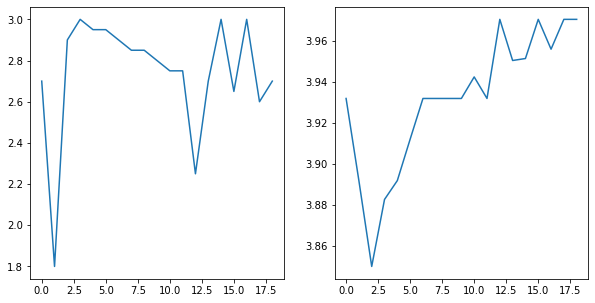

In [121]:
with Pool(n_pool) as pool:
    nll, lams = model_fast([np.log(tau), np.log(beta)], df.iloc[participant], rnd, context, pool, n_grid)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(lams)
axes[1].plot(nll)
plt.plot()
print(sum(nll))

Fit finished in 24.81s
6.454184799726631


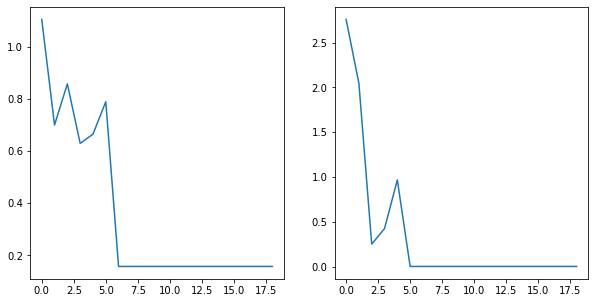

In [23]:
nll, lams = model([np.log(tau), np.log(beta)], df.iloc[participant], [rnd], context, 20, 10)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(lams)
axes[1].plot(nll)
plt.plot()
print(sum(nll))

In [59]:
lams

[1.5,
 1.6,
 0.4,
 1.2000000000000002,
 0.75,
 0.55,
 0.5,
 0.65,
 0.55,
 0.4,
 0.05,
 0.30000000000000004,
 0.25,
 0.30000000000000004,
 0.30000000000000004,
 0.25,
 0.30000000000000004,
 0.30000000000000004,
 0.05]

Fit finished in 3979.13s
Tau: 0.18854488336439224, beta: 0.01831563888873418


[]

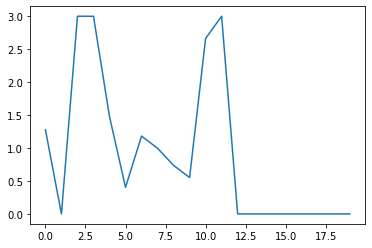

In [16]:
participant = 0
rnd = 0

tau, beta, lam = modelFit(df.iloc[participant], [rnd])
print("Tau: "+str(tau)+", beta: "+str(beta))
plt.plot(lam)
plt.plot()

In [ ]:
Fit finished in 3176.27s
Tau: 0.1885449068763618, beta: 0.01831563888873418

Fit finished in 10.62s
64.0279532335131


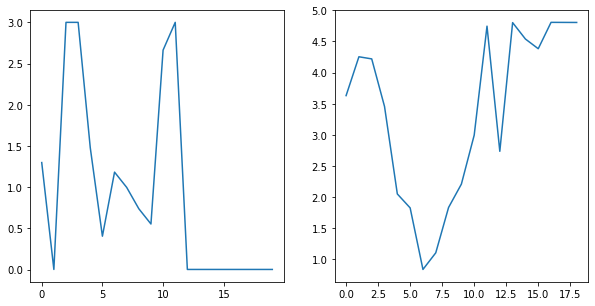

In [7]:
nll, lams = model([np.log(tau), np.log(beta)], df.iloc[participant], [rnd])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(lams)
axes[1].plot(nll)
plt.plot()
print(sum(nll))

In [8]:
lams

array([1.29837218e+00, 1.00000000e-03, 3.00000000e+00, 3.00000000e+00,
       1.47828519e+00, 4.04569136e-01, 1.18208765e+00, 9.96964198e-01,
       7.37791358e-01, 5.52667901e-01, 2.66307531e+00, 3.00000000e+00,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03])

In [ ]:
#Fit finished in 11031.57s
#(0.2902022274870262, 0.006737946999085467, 2.0617594323046635)

In [86]:
# WITH softmax temperature

Xnew = [[x, y] for y in range(8) for x in range(8)]

# params = [tau, beta]
# returns negative log likelihood, acquisition function output
# and resulting probabilities after applying sofmax choice rule
def nLLTauBeta2(params, X, y, chosen, i, kernel):
    # Parameters
    tau, beta, lam = np.exp(params)
    
    parVec = [lam, lam, 1, 0.0001]
    
    X1 = np.matrix(X[0:i+1,:])
    y1 = np.matrix(y[0:i+1])
    out = gpr(Xnew, parVec, X1, y1, kernel)
    
    utilityVec = ucb(out, [beta])
    utilityVec = utilityVec - np.max(utilityVec)
    
    p = np.exp(utilityVec / tau).tolist()[0]
    p = [max(0.00001,x) for x in p]
    p = p / np.sum(p)
    a = [[x, chosen[x]] for x in range(i+1) if x!=0]
    e1 = -np.sum(np.log(p[chosen[i]]))
    e2 = -np.mean([-np.log(out["sig"][x[0]]*np.sqrt(2*np.pi)) - 0.5*((x[1] - out["mu"][x[0]])/out["sig"][x[0]])**2 for x in a])

    return e1+e2, utilityVec, p, out

    #return -np.sum(np.log([p[x]*(kernel[chosen[i],x]/np.sum(kernel[chosen[i],:])) for x in range(64)])), utilityVec, p

# only  returns negative log likelihood, used for optimisation
def nLLTauBeta(params, X, y, chosen, i, kernel):
    return nLLTauBeta2(params, X, y, chosen, i, kernel)[0]
for x in a])

# Find parameters (lambda, tau, beta) for a participant (subjD)
# for certain rounds (rounds) 
def modelFit(subjD, rounds, track=True):
    start = timer()
    # sample starting values from normal distribution
    tau = np.exp(np.random.normal())
    beta = np.exp(np.random.normal())
    lam = np.exp(np.random.normal())
    parVec = [lam, lam, 1, 0.0001]
    
    # Initialise lists for parameters and other data
    n_rounds = len(rounds)
    n_trials = n_rounds * 20 
    nll = [0]*n_rounds
    parameters = np.zeros([3,n_trials])
    parameters[:,0] = [tau, beta, lam]
    out = [0]*n_trials
    p = [0]*n_trials
    
    for r in rounds:
        # Get data for round r
        roundD = np.array(subjD["round"]) == r
        chosen = np.array(subjD["chosen"])[roundD]
        chosen = chosen[0:20]
        y = np.array(subjD["z"])[roundD]
        y = y[0:20]
        x1 = np.array(subjD["x"])[roundD]
        x1 = x1[0:20]
        x2 = np.array(subjD["y"])[roundD]
        x2 = x2[0:20]
        X = np.column_stack((x1,x2))
        
        utilities = None
        res, utilities, p[0], out[0] = nLLTauBeta2([tau, beta, lam], X, y, chosen, 0, rbf)
        
        # loop through trials 2-20 
        # (1 is considered to be a random choice since there is no information revealed yet)
        for i in range(19):
            # index for the round, needed if, for example, we want to look at rounds 2, 5, 9
            round_index = [x for x in range(len(rounds)) if rounds[x]==r][0]
            
            # Get values for beta and tau using lambda 
            bounds = [(-3,3), (-3,3), (-3,3)]
            fit = sco.differential_evolution(nLLTauBeta, bounds, (X, y, chosen, i+1, rbf), disp=track, maxiter=200)
            tau, beta, lam = np.exp(fit.x)
            res, utilities, p[round_index*20 + i + 1], out[round_index*20 + i+1] = nLLTauBeta2([tau, beta, lam], X, y, chosen, i+1, rbf)
            
            if track:
                clear_output(wait=True)
                print("Round "+str(round_index+1)+" -- trial "+str(i+1)+"/19 -- fitting lambda")
       
            nll[round_index] = nll[round_index] + res
            parameters[:,round_index*20 + i + 1] = tau, beta, lam
            
    if track:
        end = timer()
        clear_output(wait=True)
        print("Fit finished in "+str(round(end - start,2))+"s")
    return nll, parameters, out, p

Fit finished in 115.93s
0


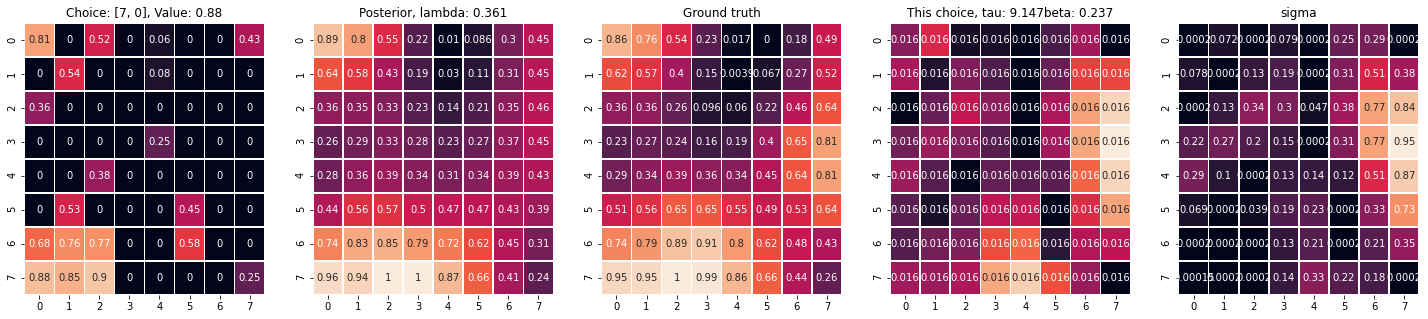

In [143]:
# Test
participant = 0
rnd = 0

nll, parameters, out, p = modelFit(df.iloc[participant], [rnd])
choices = getChoices(df, participant, rnd)
environment = getEnvironment(df, roughEnvironments, smoothEnvironments, participant, rnd)
print(df.iloc[participant]["environment"][rnd*20])
plotTrial(19, choices, environment, out, parameters, p)

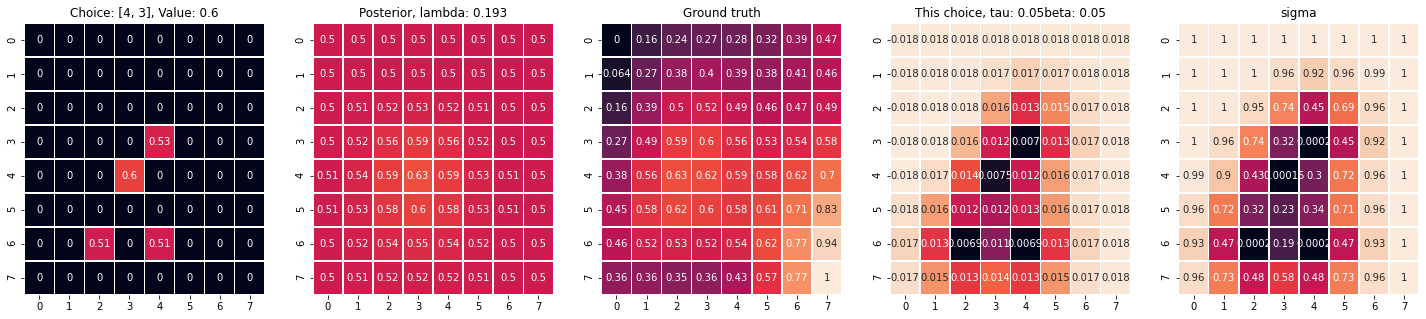

In [93]:
plotTrial(4, choices, environment, out, parameters, p)

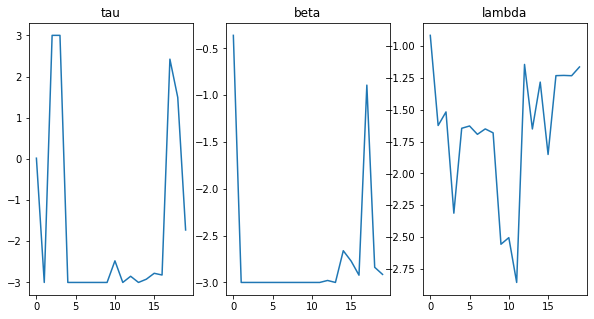

In [92]:
plotLearningCurves(np.log(parameters))

In [29]:
# WITHOUT softmax temperature

Xnew = [[x, y] for y in range(8) for x in range(8)]

# params = [tau, beta]
# returns negative log likelihood, acquisition function output
# and resulting probabilities after applying sofmax choice rule
def nLLTauBeta2(params, X, y, chosen, i, out, kernel):
    # Parameters
    beta = np.exp(params)
    #tau, beta = np.exp(params)
    
    utilityVec = ucb(out, [beta])
    #utilityVec = utilityVec - np.max(utilityVec)
    #p = np.exp(utilityVec / tau).tolist()[0]
    p = np.exp(utilityVec.tolist()[0])
    #p = utilityVec.tolist()[0]
    p = [max(0.00001,x) for x in p]
    p = p / np.sum(p)
    return -np.sum(np.log([p[x]*(kernel[chosen[i],x]/np.sum(kernel[chosen[i],:])) for x in range(64)])), utilityVec, p
    #return -np.sum(np.log(p[chosen[i]])), utilityVec, p

# only  returns negative log likelihood, used for optimisation
def nLLTauBeta(params, X, y, chosen, i, out, kernel):
    return nLLTauBeta2(params, X, y, chosen, i, out, kernel)[0]

# returns output of Gaussian process with kernel
def GPOutput(lam, X, y, chosen, i, k):
    lam = np.exp(lam)
    parVec = [lam, lam, 1, 0.0001]
    
    X1 = np.matrix(X[0:i+1,:])
    y1 = np.matrix(y[0:i+1])
    out = gpr(Xnew, parVec, X1, y1, k)
    return out, k(np.matrix(Xnew), np.matrix(Xnew), parVec)

# negative log likelihood for lamda 
def nLLLambda(lam, X, y, chosen, i, k):
    lam = np.exp(lam)
    parVec = [lam, lam, 1, 0.0001]
    
    X1 = np.matrix(X[0:i+1,:])
    y1 = np.matrix(y[0:i+1])
    out = gpr(Xnew, parVec, X1, y1, k)
    a = [[x, chosen[x]] for x in range(i) if x!=0]
    return -np.sum([np.log(1/(out["sig"][x[0]]*np.sqrt(2*np.pi))) - 0.5*((x[1] - out["mu"][x[0]])/out["sig"][x[0]])**2 for x in a])

# Find parameters (lambda, tau, beta) for a participant (subjD)
# for certain rounds (rounds) 
def modelFit(subjD, rounds, track=True):
    if track:
        start = timer()
    # sample starting values from normal distribution
    beta = np.exp(np.random.normal())
    lam = np.exp(np.random.normal())
    parVec = [lam, lam, 1, 0.0001]
    
    # Initialise lists for parameters and other data
    n_rounds = len(rounds)
    n_trials = n_rounds * 20 
    nll = [0]*n_rounds
    parameters = np.zeros([2,n_trials])
    parameters[:,0] = [beta, lam]
    out = [0]*n_trials
    p = [0]*n_trials
    
    for r in rounds:
        # Get data for round r
        roundD = np.array(subjD["round"]) == r
        chosen = np.array(subjD["chosen"])[roundD]
        chosen = chosen[0:20]
        y = np.array(subjD["z"])[roundD]
        y = y[0:20]
        x1 = np.array(subjD["x"])[roundD]
        x1 = x1[0:20]
        x2 = np.array(subjD["y"])[roundD]
        x2 = x2[0:20]
        X = np.column_stack((x1,x2))
        
        utilities = None
        out[0], kernel = GPOutput(lam, X, y, chosen, 0, rbf)
        res, utilities, p[0] = nLLTauBeta2(beta, X, y, chosen, 0, out[0], kernel)
        
        # loop through trials 2-20 
        # (1 is considered to be a random choice since there is no information revealed yet)
        for i in range(19):
            # index for the round, needed if, for example, we want to look at rounds 2, 5, 9
            round_index = [x for x in range(len(rounds)) if rounds[x]==r][0]
            
            # Get values for beta and tau using lambda 
            bounds = [(-5,5)]
            fit = sco.differential_evolution(nLLTauBeta, bounds, (X, y, chosen, i, out[round_index*20 + i], kernel), disp=track, maxiter=200)
            beta = np.exp(fit.x)
            res, utilities, p[round_index*20 + i + 1] = nLLTauBeta2(beta, X, y, chosen, i, out[round_index*20 + i], kernel)
            
            
            
            if track:
                clear_output(wait=True)
                print("Round "+str(round_index+1)+" -- trial "+str(i+1)+"/19 -- fitting lambda")
            
            # Get value for lambda
            bounds = [(-5,5)]
            fit = sco.differential_evolution(nLLLambda, bounds, (X, y, chosen, i, rbf), disp=track, maxiter=200)
            lam = np.exp(fit.x)
            
            # GP posterior 
            out[round_index*20 + i+1], kernel = GPOutput(lam, X, y, chosen, i, rbf)
            
            if track:
                clear_output(wait=True)
                print("Round "+str(round_index+1)+" -- trial "+str(i+1)+"/19 -- fitting tau and beta")
       
            nll[round_index] = nll[round_index] + res
            parameters[:,round_index*20 + i + 1] = beta, lam
            
            
    if track:
        end = timer()
        clear_output(wait=True)
        print("Fit finished in "+str(round(end - start,2))+"s")
    return nll, parameters, out, p

Fit finished in 57.22s
1


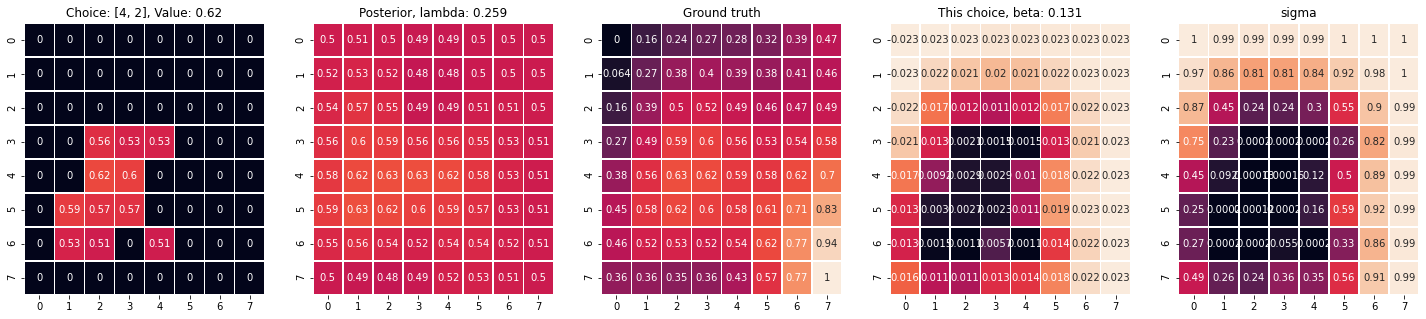

In [21]:
# Test
participant = 3
rnd = 0

nll, parameters, out, p = modelFit(df.iloc[participant], [rnd])
choices = getChoices(df, participant, rnd)
environment = getEnvironment(df, roughEnvironments, smoothEnvironments, participant, rnd)
print(df.iloc[participant]["environment"][rnd*20])
plotTrial(19, choices, environment, out, parameters, p, ["beta", "lambda"])
#plotTrial(19, choices, environment, out, parameters, p)

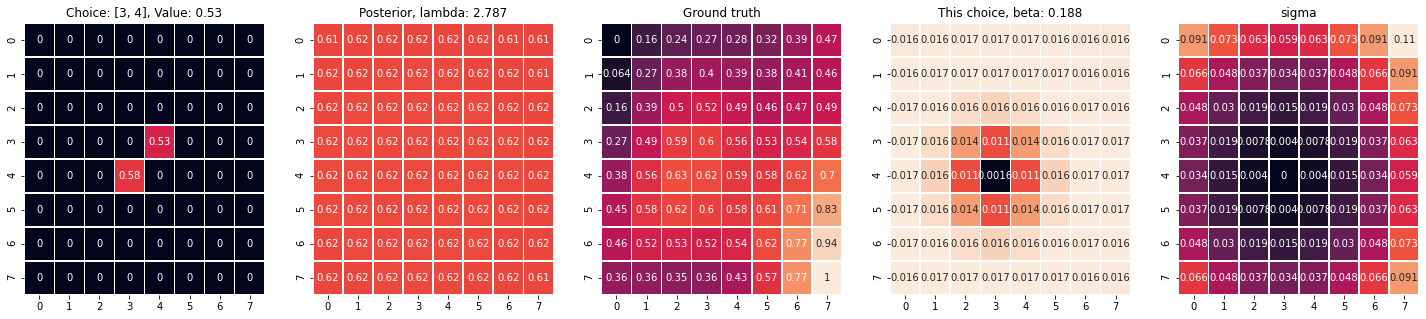

In [22]:
plotTrial(1, choices, environment, out, parameters, p, ["beta", "lambda"])

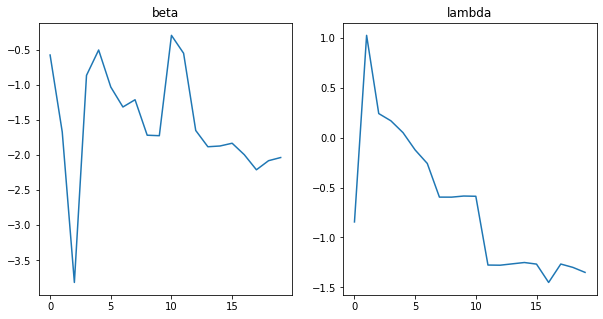

In [23]:
#plotLearningCurves(np.log(parameters))
plotLearningCurves(np.log(parameters), ["beta", "lambda"])

In [8]:
def fitMultiple(ids):   
    res_len = len(ids)*400
    
    nlls = [0]*res_len
    contexts = [0]*res_len
    environments = [0]*res_len
    betas = [0]*res_len
    lambdas = [0]*res_len
    IDs = [0]*res_len
    rnds = [0]*res_len
    trials = [0]*res_len
    chosens = [0]*res_len
    contextOrders = [0]*res_len
    
    cur = 0
    
    for i in ids:
        participant = df.iloc[i]
        rounds = int(len(participant["round"])/20)
        rounds = [participant["round"][x*20] for x in range(rounds)]
        for ind, r in enumerate(rounds):
            nll, parameter, out, p = modelFit(participant, [r], False)
            
            for ii in range(20):
                nlls[cur] = nll[0]
                contexts[cur] = participant["context"][ind*20]
                environments[cur] = participant["environment"][ind*20]
                betas[cur] = parameter[0,ii]
                lambdas[cur] = parameter[1,ii]
                IDs[cur] = i
                rnds[cur] = r
                trials[cur] = ii
                chosens[cur] = participant["chosen"][ind*20+ii]
                contextOrders[cur] = participant["contextOrder"][ind*20]
                cur = cur + 1
                clear_output(wait=True)
                print(str(round(100*cur/res_len, 1)) + "%")
            
    res = pd.DataFrame({"nll": nlls, 
                        "context": contexts,
                        "environment": environments,
                        "beta": betas,
                        "lambda": lambdas,
                        "id": IDs, 
                        "round": rnds,
                        "trial": trials,
                        "chosen": chosens, 
                        "contextOrder": contextOrders})
    return res

In [94]:
def fitMultiple2(ids):   
    res_len = len(ids)*400
    
    nlls = [0]*res_len
    contexts = [0]*res_len
    environments = [0]*res_len
    betas = [0]*res_len
    lambdas = [0]*res_len
    taus = [0]*res_len
    IDs = [0]*res_len
    rnds = [0]*res_len
    trials = [0]*res_len
    chosens = [0]*res_len
    contextOrders = [0]*res_len
    
    cur = 0
    
    for i in ids:
        participant = df.iloc[i]
        rounds = int(len(participant["round"])/20)
        rounds = [participant["round"][x*20] for x in range(rounds)]
        for ind, r in enumerate(rounds):
            nll, parameter, out, p = modelFit(participant, [r], False)
            
            for ii in range(20):
                nlls[cur] = nll[0]
                contexts[cur] = participant["context"][ind*20]
                environments[cur] = participant["environment"][ind*20]
                taus[cur] = parameter[0,ii]
                betas[cur] = parameter[1,ii]
                lambdas[cur] = parameter[2,ii]
                IDs[cur] = i
                rnds[cur] = r
                trials[cur] = ii
                chosens[cur] = participant["chosen"][ind*20+ii]
                contextOrders[cur] = participant["contextOrder"][ind*20]
                cur = cur + 1
                clear_output(wait=True)
                print(str(round(100*cur/res_len, 1)) + "%")
            
    res = pd.DataFrame({"nll": nlls, 
                        "context": contexts,
                        "environment": environments,
                        "tau": taus,
                        "beta": betas,
                        "lambda": lambdas,
                        "id": IDs, 
                        "round": rnds,
                        "trial": trials,
                        "chosen": chosens, 
                        "contextOrder": contextOrders})
    return res

In [100]:
start = timer()
res = fitMultiple2([x+3 for x in range(5)])
end = timer()
print(end-start)

100.0%
11720.834656149993


In [120]:
res.to_csv("fit_result_3_total.csv", index=False)

In [103]:
res2 = pd.read_csv("fit_result_3.csv")

In [122]:
res

nll     context  environment        tau      beta    lambda  \
0     1.599573e+10     Spatial            0   4.217570  6.676430  0.908605   
1     1.599573e+10     Spatial            0  20.085537  0.049787  0.265305   
2     1.599573e+10     Spatial            0  20.085537  0.049787  0.064215   
3     1.599573e+10     Spatial            0  20.085537  0.049787  0.467088   
4     1.599573e+10     Spatial            0   0.049787  0.049787  0.097731   
...            ...         ...          ...        ...       ...       ...   
1995  6.918367e+09  Conceptual            0   7.953138  8.915434  0.389053   
1996  6.918367e+09  Conceptual            0   1.317354  0.130529  0.418389   
1997  6.918367e+09  Conceptual            0   1.053918  0.210364  0.418026   
1998  6.918367e+09  Conceptual            0   0.165708  0.954854  0.370277   
1999  6.918367e+09  Conceptual            0   5.206890  0.261597  0.398694   

      id  round  trial  chosen  contextOrder  
0      0      0      0      46             0  
1      0      0      1      20             0  
2      0      0      2      32             0  
3      0      0      3      45             0  
4      0      0      4       7             0  
...   ..    ...    ...     ...           ...  
1995   7      9     15      54             1  
1996   7      9     16      49             1  
1997   7      9     17      58             1  
1998   7      9     18      57             1  
1999   7      9     19      58             1  

[3200 rows x 11 columns]

Text(0.5, 1.0, 'Choices - Conceptual')

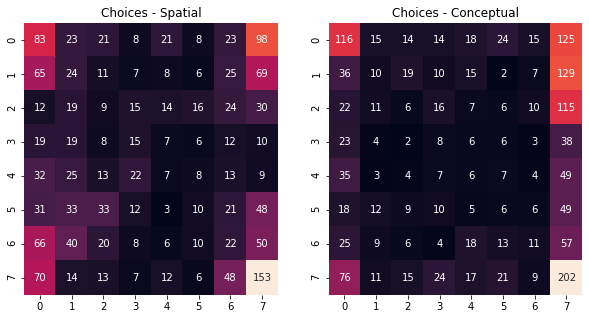

In [140]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))
chosen_spatial = np.zeros([8,8], dtype=np.integer)
for c in res[res["context"]=="Spatial"]["chosen"]:
    chosen_spatial[Xnew[c][0],Xnew[c][1]] = chosen_spatial[Xnew[c][0],Xnew[c][1]]+1
seaborn.heatmap(chosen_spatial, cbar=False, annot=True, fmt="d", ax=axes[0])

chosen_conceptual = np.zeros([8,8], dtype=np.integer)
for c in res[res["context"]=="Conceptual"]["chosen"]:
    chosen_conceptual[Xnew[c][0],Xnew[c][1]] = chosen_conceptual[Xnew[c][0],Xnew[c][1]]+1
seaborn.heatmap(chosen_conceptual, cbar=False, annot=True, fmt="d", ax=axes[1])

axes[0].set_title("Choices - Spatial")
axes[1].set_title("Choices - Conceptual")

In [104]:
res = pd.concat([res2, res])

[]

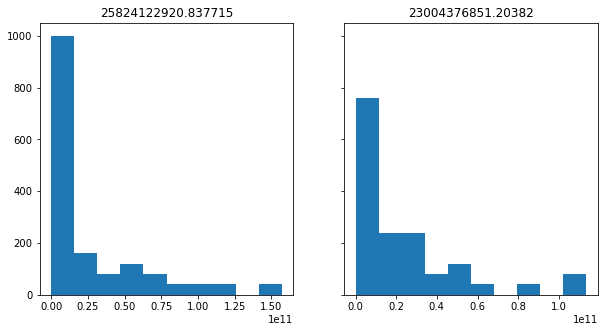

In [105]:
fig, axes = plt.subplots(1,2, figsize=(10, 5), sharey=True)
axes[0].hist([x for x in res.loc[(res["environment"]==1)]["nll"]])
axes[0].set_title(str(np.mean([x for x in res.loc[(res["environment"]==1)]["nll"]])))
axes[1].hist([x for x in res.loc[(res["environment"]==0)]["nll"]])
axes[1].set_title(str(np.mean([x for x in res.loc[(res["environment"]==0)]["nll"]])))
plt.plot()

In [67]:
def transformPars(pars, n):
    return np.array([[y for x in pars[z] for y in x] for z in range(n)])

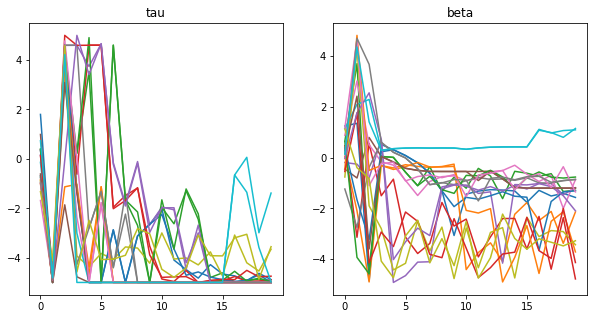

In [16]:
pars = [res[res["id"]==1]["beta"], res[res["id"]==1]["lambda"]]
logPars = pars
logPars = np.log(logPars)
plotLearningCurves(logPars)

Smooth: True


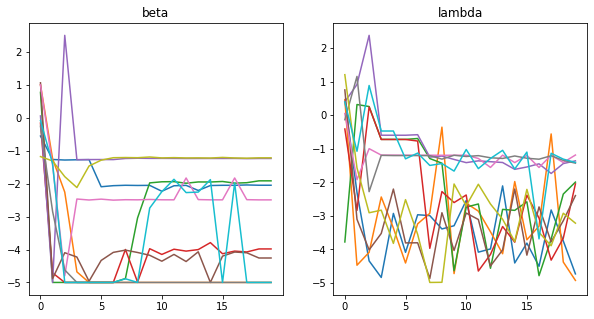

In [103]:
Id = 9

pars = transformPars(np.stack(res.loc[(res["context"]=="Conceptual") & (res["id"]==Id)]["parameters"], axis=1).tolist(), 2)
logPars = pars
logPars[pars <= 0] = 0.001
logPars = np.log(logPars)
plotLearningCurves(logPars, ["beta","lambda"])
print("Smooth: "+str(any(res.loc[(res["context"]=="Conceptual") & (res["id"]==Id)]["environment"]==1)))

[]

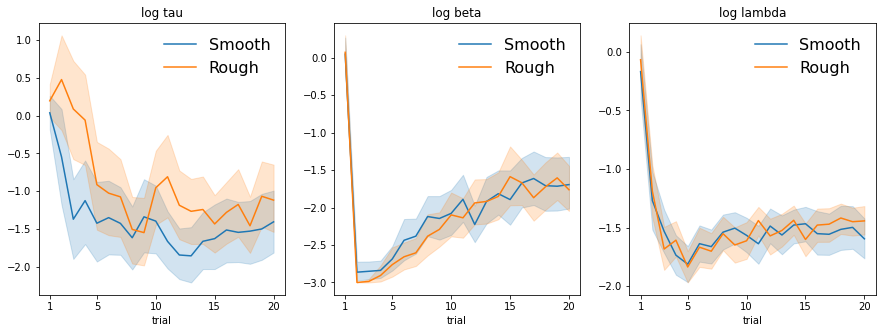

In [106]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))

# rough = 0, smooth = 1
parsS = [res.loc[(res["environment"]==1)]["tau"], res.loc[(res["environment"]==1)]["beta"], res.loc[(res["environment"]==1)]["lambda"]]
logParsS = np.log(parsS)

parsR = [res.loc[(res["environment"]==0)]["tau"], res.loc[(res["environment"]==0)]["beta"], res.loc[(res["environment"]==0)]["lambda"]]
logParsR = np.log(parsR)

seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsS[0])/20)) for x in range(20)],"y": logParsS[0]}, x="x", y="y", ax=axes[0], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsR[0])/20)) for x in range(20)],"y": logParsR[0]}, x="x", y="y", ax=axes[0], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsS[1])/20)) for x in range(20)],"y": logParsS[1]}, x="x", y="y", ax=axes[1], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsR[1])/20)) for x in range(20)],"y": logParsR[1]}, x="x", y="y", ax=axes[1], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsS[2])/20)) for x in range(20)],"y": logParsS[2]}, x="x", y="y", ax=axes[2], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsR[2])/20)) for x in range(20)],"y": logParsR[2]}, x="x", y="y", ax=axes[2], palette=['#159c73','#d95f05'])

axes[0].legend(["Smooth","Rough"], frameon=False, prop={'size': 16})
axes[1].legend(["Smooth","Rough"], frameon=False, prop={'size': 16})
axes[2].legend(["Smooth","Rough"], frameon=False, prop={'size': 16})

axes[0].set_xticks([1, 5,10,15,20])
axes[1].set_xticks([1, 5,10,15,20])
axes[2].set_xticks([1, 5,10,15,20])

axes[0].set_title("log tau")
axes[1].set_title("log beta")
axes[2].set_title("log lambda")

axes[0].set_xlabel("trial")
axes[1].set_xlabel("trial")
axes[2].set_xlabel("trial")

plt.plot()

[]

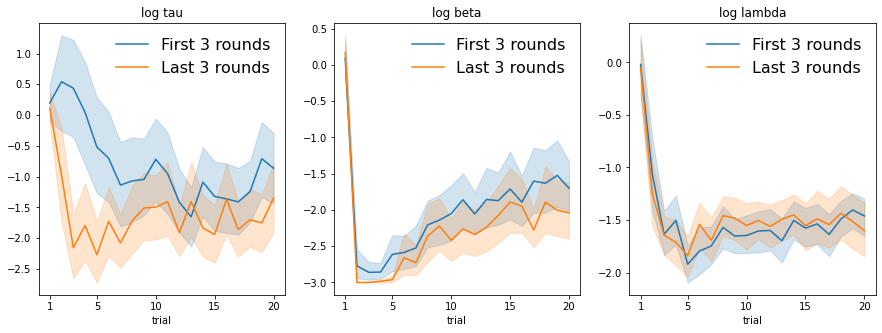

In [142]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))

# rough = 0, smooth = 1
parsS = [res.loc[(res["round"]<3)]["tau"], res.loc[(res["round"]<3)]["beta"], res.loc[(res["round"]<3)]["lambda"]]
logParsS = np.log(parsS)

parsR = [res.loc[(res["round"]>6)]["tau"], res.loc[(res["round"]>6)]["beta"], res.loc[(res["round"]>6)]["lambda"]]
logParsR = np.log(parsR)

seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsS[0])/20)) for x in range(20)],"y": logParsS[0]}, x="x", y="y", ax=axes[0], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsR[0])/20)) for x in range(20)],"y": logParsR[0]}, x="x", y="y", ax=axes[0], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsS[1])/20)) for x in range(20)],"y": logParsS[1]}, x="x", y="y", ax=axes[1], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsR[1])/20)) for x in range(20)],"y": logParsR[1]}, x="x", y="y", ax=axes[1], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsS[2])/20)) for x in range(20)],"y": logParsS[2]}, x="x", y="y", ax=axes[2], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsR[2])/20)) for x in range(20)],"y": logParsR[2]}, x="x", y="y", ax=axes[2], palette=['#159c73','#d95f05'])

axes[0].legend(["First 3 rounds","Last 3 rounds"], frameon=False, prop={'size': 16})
axes[1].legend(["First 3 rounds","Last 3 rounds"], frameon=False, prop={'size': 16})
axes[2].legend(["First 3 rounds","Last 3 rounds"], frameon=False, prop={'size': 16})

axes[0].set_xticks([1, 5,10,15,20])
axes[1].set_xticks([1, 5,10,15,20])
axes[2].set_xticks([1, 5,10,15,20])

axes[0].set_title("log tau")
axes[1].set_title("log beta")
axes[2].set_title("log lambda")

axes[0].set_xlabel("trial")
axes[1].set_xlabel("trial")
axes[2].set_xlabel("trial")

plt.plot()

[]

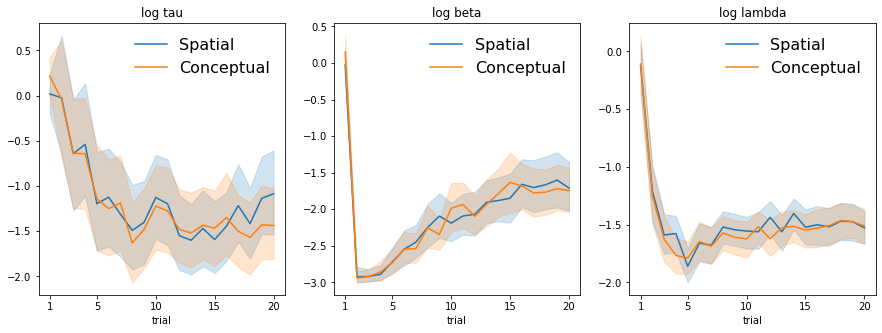

In [118]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))


parsS = [res.loc[(res["context"]=="Spatial")]["tau"], res.loc[(res["context"]=="Spatial")]["beta"], res.loc[(res["context"]=="Spatial")]["lambda"]]
logParsS = np.log(parsS)

parsR = [res.loc[(res["context"]=="Conceptual")]["tau"], res.loc[(res["context"]=="Conceptual")]["beta"], res.loc[(res["context"]=="Conceptual")]["lambda"]]
logParsR = np.log(parsR)

seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsS[0])/20)) for x in range(20)],"y": logParsS[0]}, x="x", y="y", ax=axes[0], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsR[0])/20)) for x in range(20)],"y": logParsR[0]}, x="x", y="y", ax=axes[0], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsS[1])/20)) for x in range(20)],"y": logParsS[1]}, x="x", y="y", ax=axes[1], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsR[1])/20)) for x in range(20)],"y": logParsR[1]}, x="x", y="y", ax=axes[1], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsS[2])/20)) for x in range(20)],"y": logParsS[2]}, x="x", y="y", ax=axes[2], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsR[2])/20)) for x in range(20)],"y": logParsR[2]}, x="x", y="y", ax=axes[2], palette=['#159c73','#d95f05'])

axes[0].legend(["Spatial","Conceptual"], frameon=False, prop={'size': 16})
axes[1].legend(["Spatial","Conceptual"], frameon=False, prop={'size': 16})
axes[2].legend(["Spatial","Conceptual"], frameon=False, prop={'size': 16})

axes[0].set_xticks([1, 5,10,15,20])
axes[1].set_xticks([1, 5,10,15,20])
axes[2].set_xticks([1, 5,10,15,20])

axes[0].set_title("log tau")
axes[1].set_title("log beta")
axes[2].set_title("log lambda")

axes[0].set_xlabel("trial")
axes[1].set_xlabel("trial")
axes[2].set_xlabel("trial")

plt.plot()

[]

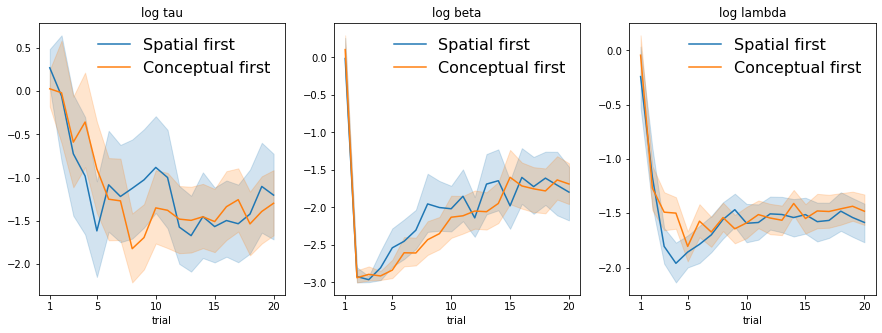

In [125]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))


parsS = [res.loc[(res["contextOrder"]==0)]["tau"], res.loc[(res["contextOrder"]==0)]["beta"], res.loc[(res["contextOrder"]==0)]["lambda"]]
logParsS = np.log(parsS)

parsR = [res.loc[(res["contextOrder"]==1)]["tau"], res.loc[(res["contextOrder"]==1)]["beta"], res.loc[(res["contextOrder"]==1)]["lambda"]]
logParsR = np.log(parsR)

seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsS[0])/20)) for x in range(20)],"y": logParsS[0]}, x="x", y="y", ax=axes[0], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsR[0])/20)) for x in range(20)],"y": logParsR[0]}, x="x", y="y", ax=axes[0], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsS[1])/20)) for x in range(20)],"y": logParsS[1]}, x="x", y="y", ax=axes[1], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsR[1])/20)) for x in range(20)],"y": logParsR[1]}, x="x", y="y", ax=axes[1], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsS[2])/20)) for x in range(20)],"y": logParsS[2]}, x="x", y="y", ax=axes[2], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsR[2])/20)) for x in range(20)],"y": logParsR[2]}, x="x", y="y", ax=axes[2], palette=['#159c73','#d95f05'])

axes[0].legend(["Spatial first","Conceptual first"], frameon=False, prop={'size': 16})
axes[1].legend(["Spatial first","Conceptual first"], frameon=False, prop={'size': 16})
axes[2].legend(["Spatial first","Conceptual first"], frameon=False, prop={'size': 16})

axes[0].set_xticks([1, 5,10,15,20])
axes[1].set_xticks([1, 5,10,15,20])
axes[2].set_xticks([1, 5,10,15,20])

axes[0].set_title("log tau")
axes[1].set_title("log beta")
axes[2].set_title("log lambda")

axes[0].set_xlabel("trial")
axes[1].set_xlabel("trial")
axes[2].set_xlabel("trial")

plt.plot()

[]

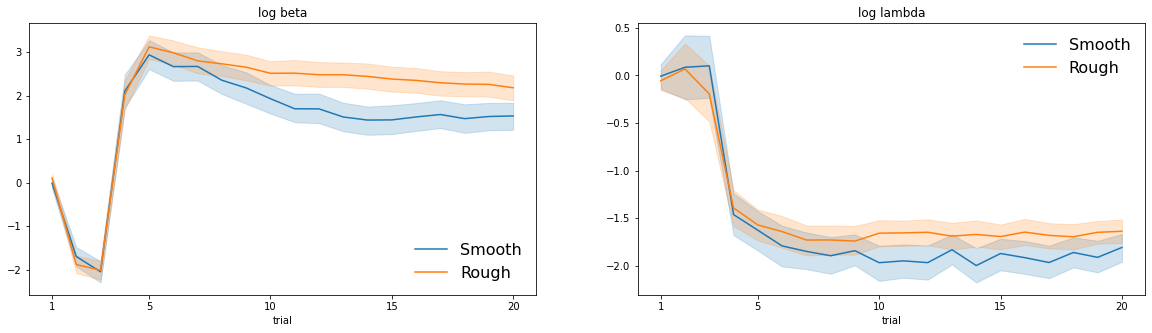

In [28]:
fig, axes = plt.subplots(1,2, figsize=(20, 5))

parsS = [res.loc[(res["environment"]==1)]["beta"], res.loc[(res["environment"]==1)]["lambda"]]
logParsS = np.log(parsS)

parsR = [res.loc[(res["environment"]==0)]["beta"], res.loc[(res["environment"]==0)]["lambda"]]
logParsR = np.log(parsR)

seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsS[0])/20)) for x in range(20)],"y": logParsS[0]}, x="x", y="y", ax=axes[0], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsR[0])/20)) for x in range(20)],"y": logParsR[0]}, x="x", y="y", ax=axes[0], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsS[1])/20)) for x in range(20)],"y": logParsS[1]}, x="x", y="y", ax=axes[1], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsR[1])/20)) for x in range(20)],"y": logParsR[1]}, x="x", y="y", ax=axes[1], palette=['#159c73','#d95f05'])

axes[0].legend(["Smooth","Rough"], frameon=False, prop={'size': 16})
axes[1].legend(["Smooth","Rough"], frameon=False, prop={'size': 16})

axes[0].set_xticks([1, 5,10,15,20])
axes[1].set_xticks([1, 5,10,15,20])

axes[0].set_title("log beta")
axes[1].set_title("log lambda")

axes[0].set_xlabel("trial")
axes[1].set_xlabel("trial")

plt.plot()

[]

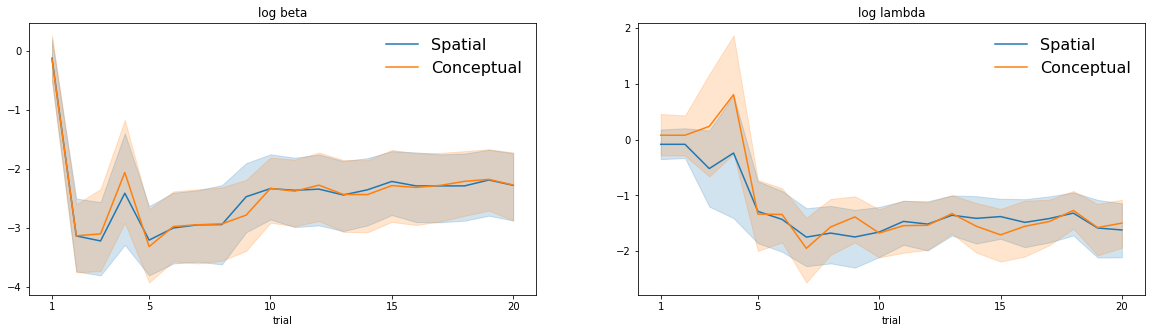

In [154]:
fig, axes = plt.subplots(1,2, figsize=(20, 5))

parsS = [res.loc[(res["context"]=="Spatial")]["beta"], res.loc[(res["context"]=="Spatial")]["lambda"]]
logParsS = np.log(parsS)

parsR = [res.loc[(res["context"]=="Conceptual")]["beta"], res.loc[(res["context"]=="Conceptual")]["lambda"]]
logParsR = np.log(parsR)

seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsS[0])/20)) for x in range(20)],"y": logParsS[0]}, x="x", y="y", ax=axes[0], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsR[0])/20)) for x in range(20)],"y": logParsR[0]}, x="x", y="y", ax=axes[0], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsS[1])/20)) for x in range(20)],"y": logParsS[1]}, x="x", y="y", ax=axes[1], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsR[1])/20)) for x in range(20)],"y": logParsR[1]}, x="x", y="y", ax=axes[1], palette=['#159c73','#d95f05'])

axes[0].legend(["Spatial","Conceptual"], frameon=False, prop={'size': 16})
axes[1].legend(["Spatial","Conceptual"], frameon=False, prop={'size': 16})

axes[0].set_xticks([1, 5,10,15,20])
axes[1].set_xticks([1, 5,10,15,20])

axes[0].set_title("log beta")
axes[1].set_title("log lambda")

axes[0].set_xlabel("trial")
axes[1].set_xlabel("trial")

plt.plot()

[]

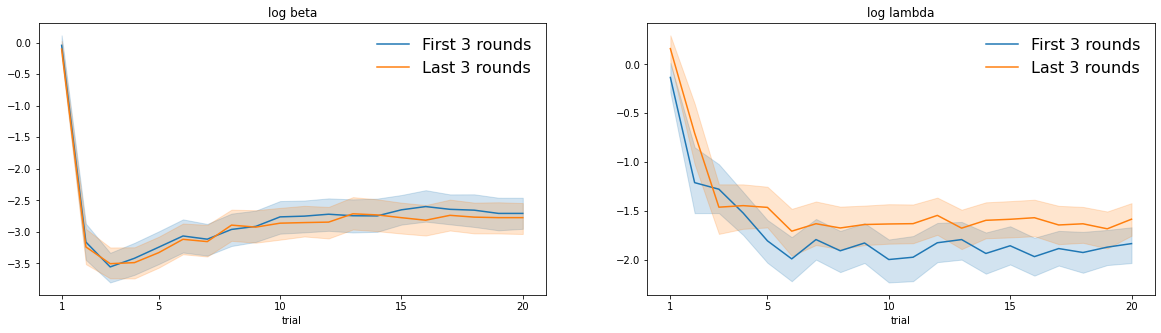

In [98]:
fig, axes = plt.subplots(1,2, figsize=(20, 5))

# rough = 0, smooth = 1
parsS = transformPars(np.stack(res.loc[(res["round"]<3)]["parameters"], axis=1).tolist(), 2)
logParsS = parsS
logParsS[parsS <= 0] = 0.001
logParsS = np.log(logParsS)

parsR = transformPars(np.stack(res.loc[(res["round"]>6)]["parameters"], axis=1).tolist(), 2)
logParsR = parsR
logParsR[parsR <= 0] = 0.001
logParsR = np.log(logParsR)

seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsS[0])/20)) for x in range(20)],"y": logParsS[0]}, x="x", y="y", ax=axes[0], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsR[0])/20)) for x in range(20)],"y": logParsR[0]}, x="x", y="y", ax=axes[0], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsS[1])/20)) for x in range(20)],"y": logParsS[1]}, x="x", y="y", ax=axes[1], palette=['#159c73','#d95f05'])
seaborn.lineplot(data={"x": [x+1 for y in range(int(len(logParsR[1])/20)) for x in range(20)],"y": logParsR[1]}, x="x", y="y", ax=axes[1], palette=['#159c73','#d95f05'])

axes[0].legend(["First 3 rounds","Last 3 rounds"], frameon=False, prop={'size': 16})
axes[1].legend(["First 3 rounds","Last 3 rounds"], frameon=False, prop={'size': 16})

axes[0].set_xticks([1, 5,10,15,20])
axes[1].set_xticks([1, 5,10,15,20])

axes[0].set_title("log beta")
axes[1].set_title("log lambda")

axes[0].set_xlabel("trial")
axes[1].set_xlabel("trial")

plt.plot()

In [49]:
[[logPars[0][x*20+y].tolist() for x in range(10)] for y in range(20)]

20

[]

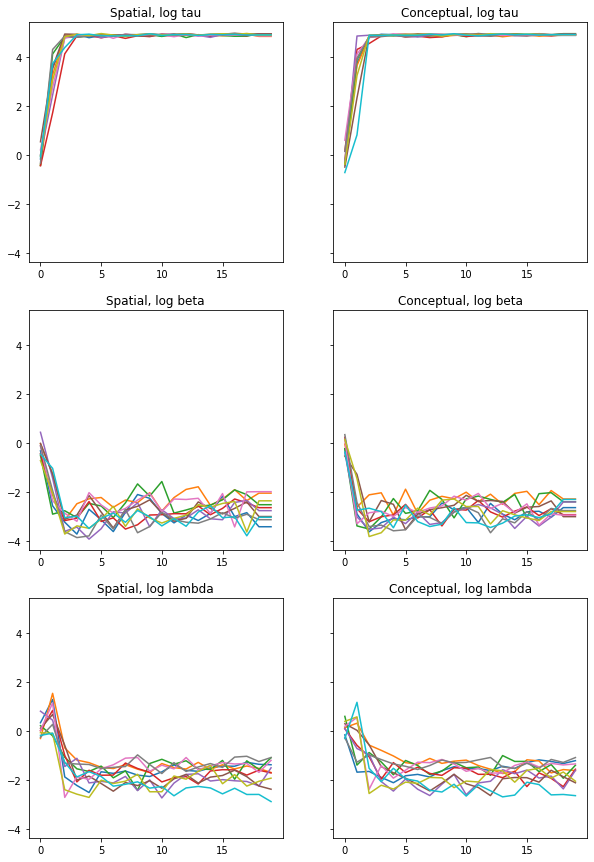

In [61]:
getAvgParam = lambda i, parameters: [sum(parameters[i,x*20 + y] for x in range(int(len(parameters[i,:])/20)))/(len(parameters[i,:])/20) for y in range(20)]
fig, axes = plt.subplots(3, 2, figsize=(10, 15), sharey=True)
# tau, beta, lambda
#axes[0].plot(np.log(getAvgParam(0)))
#axes[1].plot(np.log(getAvgParam(1)))
#axes[2].plot(np.log(getAvgParam(2)))
for i in range(10):
    parsS = transformPars(np.stack(res2.loc[(res2["context"]=="Spatial") & (res2["id"]==i)]["parameters"], axis=1).tolist(),3)
    logParsS = parsS
    logParsS[parsS <= 0] = 0.001
    logParsS = np.log(logParsS)
    parsC = transformPars(np.stack(res2.loc[(res2["context"]=="Conceptual") & (res2["id"]==i)]["parameters"], axis=1).tolist(),3)
    logParsC = parsC
    logParsC[parsC <= 0] = 0.001
    logParsC = np.log(logParsC)
    axes[0,0].plot(getAvgParam(0, logParsS))
    axes[0,1].plot(getAvgParam(0, logParsC))
    axes[1,0].plot(getAvgParam(1, logParsS))
    axes[1,1].plot(getAvgParam(1, logParsC))
    axes[2,0].plot(getAvgParam(2, logParsS))
    axes[2,1].plot(getAvgParam(2, logParsC))
    axes[0,0].set_title("Spatial, log tau")
    axes[0,1].set_title("Conceptual, log tau")
    axes[1,0].set_title("Spatial, log beta")
    axes[1,1].set_title("Conceptual, log beta")
    axes[2,0].set_title("Spatial, log lambda")
    axes[2,1].set_title("Conceptual, log lambda")
plt.plot()

[]

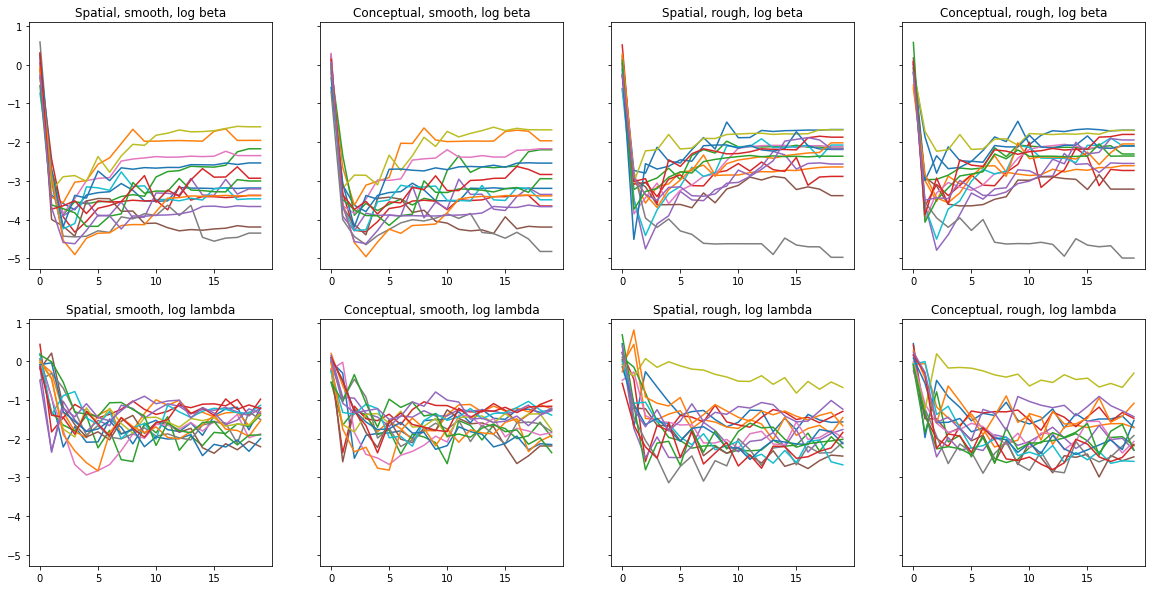

In [17]:
getAvgParam = lambda i, parameters: [sum(parameters[i,x*20 + y] for x in range(int(len(parameters[i,:])/20)))/(len(parameters[i,:])/20) for y in range(20)]
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey=True)
# tau, beta, lambda
#axes[0].plot(np.log(getAvgParam(0)))
#axes[1].plot(np.log(getAvgParam(1)))
#axes[2].plot(np.log(getAvgParam(2)))
for i in range(30):
    if any(res.loc[(res["context"]=="Spatial") & (res["id"]==i)]["environment"] == 0):
        parsS = transformPars(np.stack(res.loc[(res["context"]=="Spatial") & (res["id"]==i)]["parameters"], axis=1).tolist(),2)
        logParsS = parsS
        logParsS[parsS <= 0] = 0.001
        logParsS = np.log(logParsS)
        parsC = transformPars(np.stack(res.loc[(res["context"]=="Conceptual") & (res["id"]==i)]["parameters"], axis=1).tolist(),2)
        logParsC = parsC
        logParsC[parsC <= 0] = 0.001
        logParsC = np.log(logParsC)
    
        axes[0,0].plot(getAvgParam(0, logParsS))
        axes[0,1].plot(getAvgParam(0, logParsC))
        axes[1,0].plot(getAvgParam(1, logParsS))
        axes[1,1].plot(getAvgParam(1, logParsC))
    
    else:
        parsSR = transformPars(np.stack(res.loc[(res["context"]=="Spatial") & (res["id"]==i) & (res["environment"]==1)]["parameters"], axis=1).tolist(),2)
        logParsSR = parsSR
        logParsSR[parsSR <= 0] = 0.001
        logParsSR = np.log(logParsSR)
        parsCR = transformPars(np.stack(res.loc[(res["context"]=="Conceptual") & (res["id"]==i) & (res["environment"]==1)]["parameters"], axis=1).tolist(),2)
        logParsCR = parsCR
        logParsCR[parsCR <= 0] = 0.001
        logParsCR = np.log(logParsCR)

        axes[0,2].plot(getAvgParam(0, logParsSR))
        axes[0,3].plot(getAvgParam(0, logParsCR))
        axes[1,2].plot(getAvgParam(1, logParsSR))
        axes[1,3].plot(getAvgParam(1, logParsCR))
    
axes[0,0].set_title("Spatial, smooth, log beta")
axes[0,1].set_title("Conceptual, smooth, log beta")
axes[1,0].set_title("Spatial, smooth, log lambda")
axes[1,1].set_title("Conceptual, smooth, log lambda")

axes[0,2].set_title("Spatial, rough, log beta")
axes[0,3].set_title("Conceptual, rough, log beta")
axes[1,2].set_title("Spatial, rough, log lambda")
axes[1,3].set_title("Conceptual, rough, log lambda")
plt.plot()

In [31]:
res

nll     context  \
0    [15994.952590939485]     Spatial   
1    [16525.649679598217]     Spatial   
2    [14044.163730837488]     Spatial   
3    [14749.711524756558]     Spatial   
4     [15404.31913497438]     Spatial   
..                    ...         ...   
195  [25298.080694173408]  Conceptual   
196  [18269.166108032707]  Conceptual   
197  [19655.813857923396]  Conceptual   
198  [20098.213356905286]  Conceptual   
199  [14231.027219400214]  Conceptual   

                                            parameters  \
0    [[1.2509424117725527, 0.008600657131082217, 0....   
1    [[2.6921250762767186, 0.006982914000716306, 0....   
2    [[0.8301401509752346, 0.006737946999085467, 0....   
3    [[0.4118503226852994, 0.0071508128276245924, 0...   
4    [[1.3410156371936093, 0.008227248142765643, 0....   
..                                                 ...   
195  [[0.3693103122396039, 1.5428848438736393, 0.01...   
196  [[4.62706000899831, 0.28793131198243, 0.007218...   
197  [[5.599852867384647, 0.019460189826561974, 0.0...   
198  [[1.3752820686293243, 0.25983518857887783, 0.1...   
199  [[1.1189962896159085, 0.006849414861364248, 0....   

                                                     p id round  \
0    [[0.016943675662712643, 0.016943675693526103, ...  0     0   
1    [[0.009068222760176574, 0.012395218729271294, ...  0     1   
2    [[0.02217391260537036, 0.02200257034573324, 0....  0     2   
3    [[0.013359241201130528, 0.013090748590572604, ...  0     3   
4    [[0.0169848227330906, 0.016984822657056725, 0....  0     4   
..                                                 ... ..   ...   
195  [[0.015624999999999997, 0.015624999999999997, ...  9     5   
196  [[0.01736518719143654, 0.01736518719143654, 0....  9     6   
197  [[0.015873015873015872, 0.015873015873015872, ...  9     7   
198  [[0.01932487946461481, 0.01933521135677145, 0....  9     8   
199  [[0.016721065374229037, 0.016721066797064938, ...  9     9   

                                                chosen contextOrder  
0    [46, 20, 32, 45, 7, 14, 6, 15, 23, 22, 13, 33,...            0  
1    [16, 56, 7, 63, 31, 29, 30, 39, 60, 4, 32, 28,...            0  
2    [49, 9, 8, 0, 1, 10, 11, 16, 17, 18, 19, 24, 2...            0  
3    [17, 14, 5, 30, 30, 22, 21, 23, 23, 23, 23, 23...            0  
4    [59, 47, 2, 1, 4, 4, 6, 12, 5, 4, 4, 5, 4, 4, ...            0  
..                                                 ...          ...  
195  [3, 58, 56, 56, 56, 56, 56, 56, 58, 56, 56, 56...            1  
196  [63, 2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...            1  
197  [19, 63, 63, 8, 32, 0, 0, 0, 0, 0, 0, 1, 0, 0,...            1  
198  [59, 23, 56, 56, 56, 56, 40, 56, 56, 56, 56, 5...            1  
199  [19, 63, 56, 56, 56, 61, 39, 3, 56, 56, 56, 48...            1  

[200 rows x 8 columns]

Fit finished in 37.85s
1


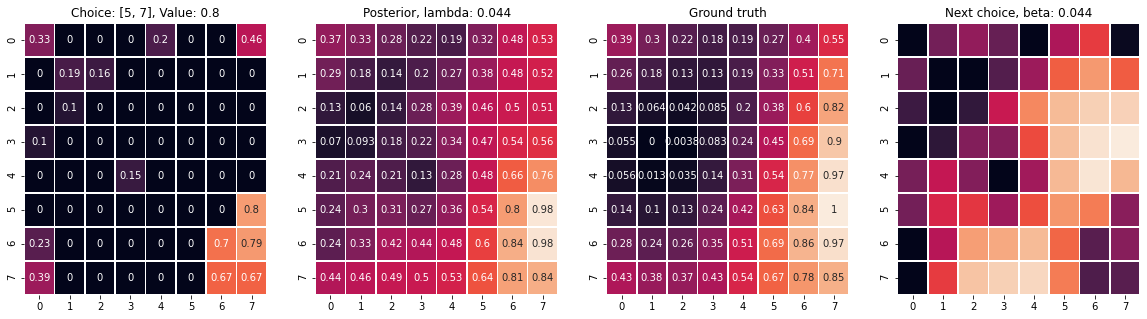

In [67]:
# Test
participant = 3
rnd = 1

nll, parameters, out, p = modelFit(df.iloc[participant], [rnd])
choices = getChoices(df, participant, rnd)
environment = getEnvironment(df, roughEnvironments, smoothEnvironments, participant, rnd)
print(df.iloc[participant]["environment"][rnd*20])
plotTrial(19, choices, environment, out, parameters, p)

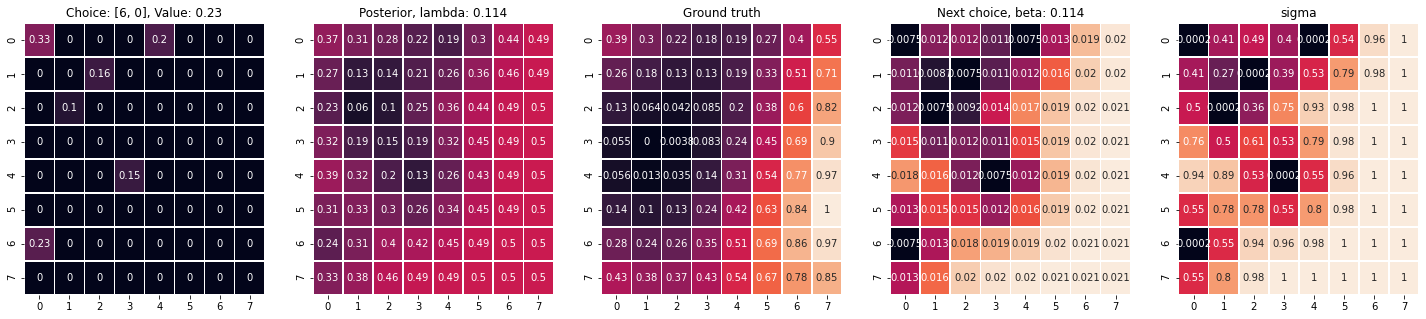

In [89]:
plotTrial(5, choices, environment, out, parameters, p)

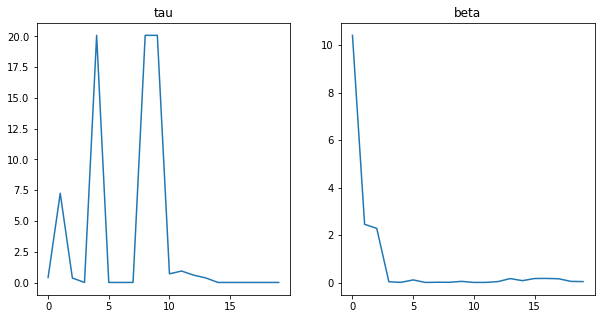

In [68]:
plotLearningCurves(parameters)

Fit finished in 55.01s


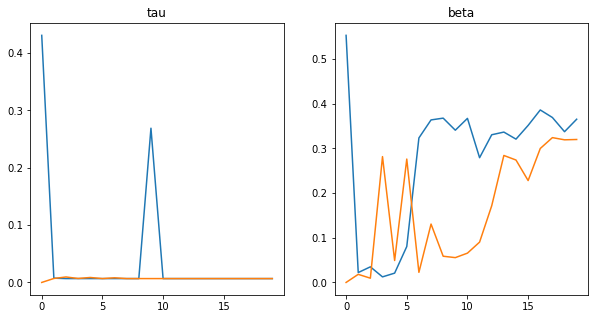

In [122]:
participant = 0
rnd = range(2)

nll, parameters, out, p = modelFit(df.iloc[participant], rnd)
plotLearningCurves(parameters)

In [123]:
parameters

array([[0.43084796, 0.00742286, 0.00673795, 0.00673795, 0.00673795,
        0.00673795, 0.00673795, 0.00673795, 0.00673795, 0.26893706,
        0.00673795, 0.00673795, 0.00673795, 0.00673795, 0.00673795,
        0.00673795, 0.00673795, 0.00673795, 0.00673795, 0.00673795,
        0.        , 0.00690574, 0.00955838, 0.0069368 , 0.0086549 ,
        0.00673795, 0.00810721, 0.00673795, 0.00673795, 0.00673795,
        0.00673795, 0.00673795, 0.00673795, 0.00673795, 0.00673795,
        0.00673795, 0.00673795, 0.00673795, 0.00673795, 0.00673795],
       [0.55286887, 0.02212445, 0.03493705, 0.01245959, 0.02084781,
        0.08038216, 0.32331846, 0.36366097, 0.36763166, 0.34065396,
        0.36710812, 0.27911189, 0.33045982, 0.33644179, 0.32066921,
        0.35138053, 0.38594887, 0.36908045, 0.33730322, 0.36521564,
        0.        , 0.0181285 , 0.00952999, 0.28156862, 0.04908704,
        0.27607067, 0.0226045 , 0.13064843, 0.05866934, 0.05552934,
        0.06556752, 0.0902454 , 0.17162863, 0.2

[]

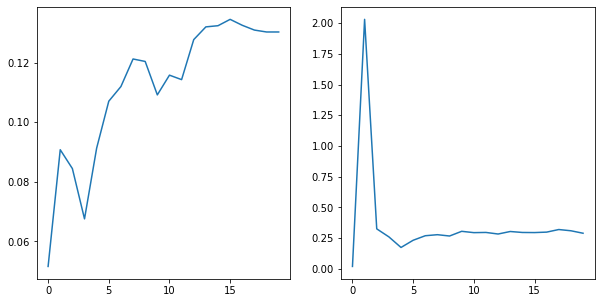

In [52]:
getAvgParam = lambda i, parameters: [sum(parameters[i,x*20 + y] for x in range(int(len(parameters[i,:])/20)))/(len(parameters[i,:])/20) for y in range(20)]
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# tau, beta, lambda
#axes[0].plot(np.log(getAvgParam(0)))
#axes[1].plot(np.log(getAvgParam(1)))
#axes[2].plot(np.log(getAvgParam(2)))

axes[0].plot(getAvgParam(0))
axes[1].plot(getAvgParam(1))
plt.plot()

In [52]:
df.iloc[0]

id                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
age                   [42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42....
gender                [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
environment           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
contextOrder          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
context               [Spatial, Spatial, Spatial, Spatial, Spatial, ...
round                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
trial                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
x                     [6, 4, 0, 5, 7, 6, 6, 7, 7, 6, 5, 1, 0, 2, 0, ...
y                     [5, 2, 4, 5, 0, 1, 0, 1, 2, 2, 1, 4, 0, 0, 2, ...
chosen                [46, 20, 32, 45, 7, 14, 6, 15, 23, 22, 13, 33,...
initx                 [7, 2, 2, 5, 1, 5, 5, 1, 0, 7, 5, 0, 5, 7, 4, ...
inity                 [5, 2, 1, 5, 0, 0, 0, 0, 4, 2, 0, 2, 6, 3, 6, ...
trajectories          [[37], [39, 39], [38, 38, 38, 37, 37], [38

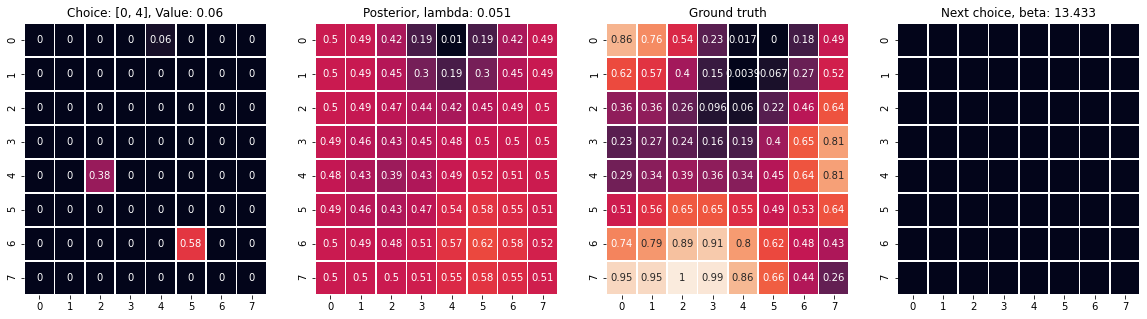

In [39]:
plotTrial(2, choices, environment, out, parameters, p)

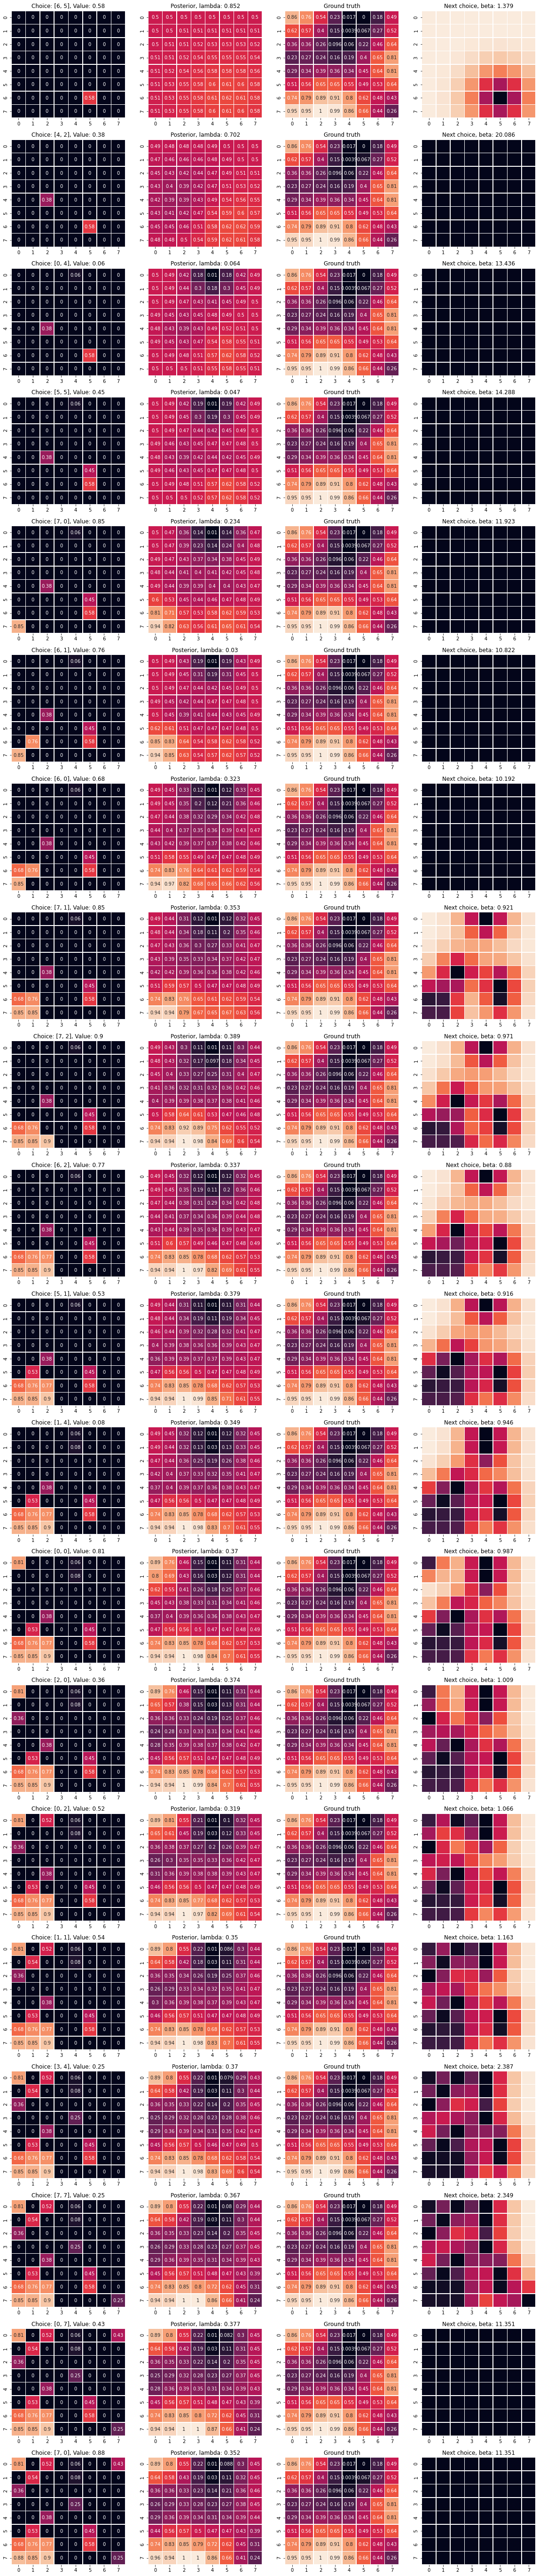

In [46]:
# Plots one round but takes a while because it will make 80 plots
choices = getChoices(df, 0, 0)
environment = getEnvironment(df, roughEnvironments, smoothEnvironments, 0, 0)
plotResults(choices, environment, out, parameters, p)

[0.07336737 0.00673795 0.34304136]


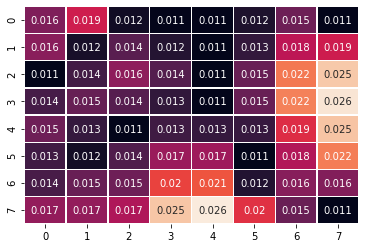

In [48]:
# Acquisition function
n = 19
print(parameters[0:3,n])
plotHeatmap(createArrayGP(p[n].tolist()), False)

[0.07336737 0.00673795 0.34304136]


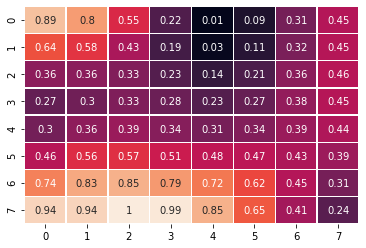

In [51]:
# Posterior
n = 19
print(parameters[0:3,n])
plotHeatmap(createArrayGP(out[n]["mu"])+0.5, False)

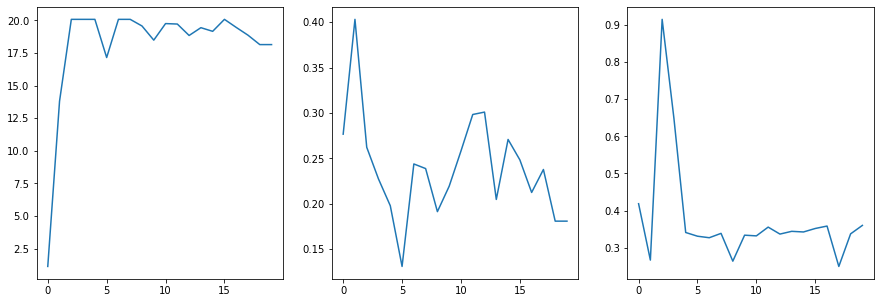

In [65]:
plotLearningCurves(parameters)

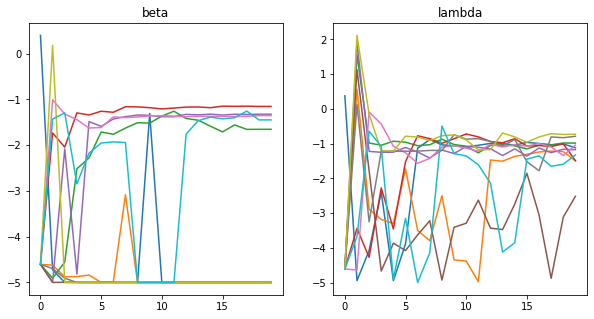

In [58]:
logPars = parameters
logPars[parameters <= 0] = 0.01
logPars = np.log(logPars)
plotLearningCurves(np.log(parameters), ["beta", "lambda"])

In [14]:
getAvgParam = lambda i: [sum(parameters[i,x*20 + y] for x in range(int(len(parameters[i,:])/20)))/(len(parameters[i,:])/20) for y in range(20)]

[]

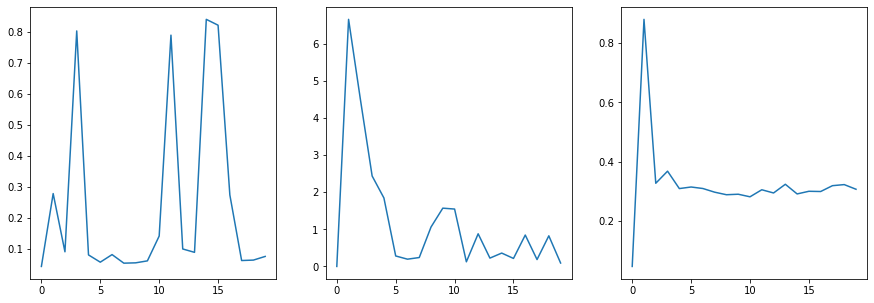

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# tau, beta, lambda
#axes[0].plot(np.log(getAvgParam(0)))
#axes[1].plot(np.log(getAvgParam(1)))
#axes[2].plot(np.log(getAvgParam(2)))

axes[0].plot(getAvgParam(0))
axes[1].plot(getAvgParam(1))
axes[2].plot(getAvgParam(2))
plt.plot()

In [2]:
def modelFit2(par, subjD, rounds, returnPredictions=False):
    tau = np.exp(float(par[0]))
    beta = np.exp(float(par[1]))
    lam = np.exp(float(par[2]))
    parVec = [lam, lam, 1, 0.0001]
    
    Xnew = [[x, y] for y in range(8) for x in range(8)]
    nLL = [0]*len(rounds)
    utilities = None
    for r in rounds:
        roundD = np.array(subjD["round"]) == r
        chosen = np.array(subjD["chosen"])[roundD]
        chosen = chosen[1:20]
        y = np.array(subjD["z"])[roundD]
        y = y[0:20]
        x1 = np.array(subjD["x"])[roundD]
        x1 = x1[0:20]
        x2 = np.array(subjD["y"])[roundD]
        x2 = x2[0:20]
        X = np.column_stack((x1,x2))

        utilities = None
        for i in range(19):
            X1 = np.matrix(X[0:i+1,:])
            y1 = np.matrix(y[0:i+1])
            out = gpr(Xnew, parVec, X1, y1, rbf)
            utilityVec = ucb(out, [beta])
            utilityVec = utilityVec - np.max(utilityVec)
            if i==0:
                utilities = utilityVec
            else:
                utilities = np.row_stack((utilities, utilityVec))
        p = np.exp(utilities / tau)
        p = p / np.sum(p, 1)
        p[p < 0.00001] = 0.00001
        p[p > 0.99999] = 0.99999
        a = [[x, chosen[x]] for x in range(19)]
        nLL[[x for x in range(len(rounds)) if rounds[x]==r][0]] = -np.sum(np.log([p[x[0], x[1]] for x in a]))
        #clear_output(wait=True)
        #print(str(r+1) + "/" + str(len(rounds)))
    if returnPredictions:
        return {"sumLogLoss": np.sum(nLL), "logLoss": nLL, "predictions": p, "chosen": chosen}
    else:
        return np.sum(nLL)
    
def modelFit(par, subjD, rounds, returnPredictions=False):
    tau = float(par["tau"])
    lam = float(par["lambda"])
    beta = float(par["beta"])
    return modelFit2([tau, beta, lam], subjD, rounds, returnPredictions)

In [5]:
# Test
modelFit2([0.953290334560277,0.14184440300399,0.0706500217485385], df.iloc[0], [x for x in range(10)], True)

{'sumLogLoss': 799.150157848398,
 'logLoss': [77.94201238620916,
  77.90895614419912,
  79.12634294743856,
  81.49228283699493,
  80.95498328569745,
  80.27099590754462,
  81.41172648118604,
  80.8629105337758,
  80.7651523736277,
  78.4147949517245],
 'predictions': matrix([[0.0158205 , 0.01576797, 0.0158205 , ..., 0.01584554, 0.01584554,
          0.01584554],
         [0.01585035, 0.01579773, 0.01585072, ..., 0.01587548, 0.01587549,
          0.01587548],
         [0.01596103, 0.01590803, 0.01596125, ..., 0.01598632, 0.01598634,
          0.01598634],
         ...,
         [0.01223846, 0.01663206, 0.01766317, ..., 0.01391364, 0.01389875,
          0.0139521 ],
         [0.01223773, 0.01663106, 0.01766211, ..., 0.01391282, 0.01391298,
          0.01395127],
         [0.01223902, 0.01663285, 0.01766402, ..., 0.01397269, 0.01391446,
          0.01395273]]),
 'chosen': array([22, 23, 12,  7, 29, 31, 33, 50,  0, 61, 60, 53, 62, 63, 44, 61, 62,
        61, 61])}

In [15]:
import scipy as scp

def rbf2(x1,x2,theta):
    N = np.shape(x1)[0]
    d = np.shape(x1)[1]
    sigma = np.matrix((np.subtract.outer(x1,x2)/theta[0])**2).T
    return theta[d]*np.exp(-0.5 * sigma) + theta[d+1]*np.identity(N)

def gpr_first(X_test, theta, X, Y, k):
    Xstar = np.matrix(X_test)
    K = k(X, X, theta)
    KK_inv = np.linalg.cholesky(K)
    Ky = KK_inv.dot(Y.T)
    mus = [0]*np.shape(Xstar)[0]
    sigs = [0]*np.shape(Xstar)[0]
    
    
    for i in range(np.shape(Xstar)[0]):
        XX = Xstar[i]
        Kstar = k(X, XX, theta)
        Kstarstar = k(XX,XX,theta)
        mu = Kstar.T.dot(Ky)
        cv = Kstarstar - (Kstar.T.dot(KK_inv).dot(Kstar))
        if cv < 0:
            cv = abs(cv)
        mus[i] = float(mu)
        sigs[i] = float(cv)
    return pd.DataFrame({"mu": mus, "sig": sigs}), K, KK_inv

def gpr_sequential(X_test, theta, X, Y, k, old_K, old_KK_inv):
    Xstar = np.matrix(X_test)
    K = k(X, X, theta)
    KK_inv = np.zeros([len(old_K[:,0])+1,len(old_K[:,0])+1])
    KK_inv[:-1,:-1] = old_KK_inv
    X1 = K[-1,:-1]
    X2 = K[-1,-1]
    a = scp.linalg.solve_triangular(old_KK_inv, X1.T)
    KK_inv[-1,:-1] = a.T
    print(a.T)
    print(X1.dot(np.linalg.inv(old_KK_inv).T))
    print(a.T.dot(a))
    print(isPositiveDefinite(X2 - a.T.dot(a)))
    KK_inv[-1,-1] = np.linalg.cholesky(X2 - a.T.dot(a))
    Ky = KK_inv.dot(Y.T)
    mus = [0]*np.shape(Xstar)[0]
    sigs = [0]*np.shape(Xstar)[0]
    
    
    for i in range(np.shape(Xstar)[0]):
        XX = Xstar[i]
        Kstar = k(X, XX, theta)
        Kstarstar = k(XX,XX,theta)
        mu = Kstar.T.dot(Ky)
        cv = Kstarstar - (Kstar.T.dot(KK_inv).dot(Kstar))
        if cv < 0:
            cv = abs(cv)
        mus[i] = float(mu)
        sigs[i] = float(cv)
    return pd.DataFrame({"mu": mus, "sig": sigs}), K, KK_inv

In [104]:
modelFit3([0.953290334560277,0.14184440300399,0.0706500217485385], df.iloc[0], [x for x in range(10)], False)

[[0.00354032]]
[[0.00354032]]
[[1.25338953e-05]]
True
[[1.05740044e-07 1.69555306e-04]]
[[1.05740044e-07 1.69554932e-04]]
[[2.87490131e-08]]
True
[[6.47805760e-01 1.30210557e-02 1.25345222e-05]]
[[6.47805760e-01 1.07277136e-02 1.06471768e-05]]
[[0.41982185]]
True
[[1.25345220e-05 3.54034637e-03 5.56290984e-13 4.47415411e-06]]
[[ 1.25345220e-05  3.54030200e-03 -6.00247756e-07 -6.67010251e-05]]
[[1.25342296e-05]]
True
[[9.62592755e-04 1.14107345e-01 3.28073871e-09 8.18677232e-04
  4.19675915e-01]]
[[ 9.62592755e-04  1.14103938e-01 -1.93427822e-05 -1.95034042e-03
   4.19271962e-01]]
[[0.18914996]]
True
[[1.93482308e-05 3.10250978e-02 1.57122100e-10 1.64555114e-05
  6.47809820e-01 7.19398401e-01]]
[[ 1.93482308e-05  3.10250293e-02 -5.26004034e-06 -5.30321055e-04
   6.47699987e-01  4.13617836e-01]]
[[0.93815418]]
True
[[6.23604309e-04 1.30210557e-02 1.16154593e-11 2.22593393e-04
  6.47809820e-01 7.19398401e-01 1.68626968e+00]]
[[ 6.23604309e-04  1.30188480e-02 -2.20735876e-06 -5.30260071e-0

LinAlgError: Matrix is not positive definite

In [22]:
gpr([[x2, x1] for x1 in range(8) for x2 in range(8)], [0.945098951166948, 0.945098951166948, 1, 0.0001], np.matrix([4,1]), np.matrix([-0.1577524891006599]), rbf)

mu       sig
0  -1.161695e-05  1.000100
1  -5.845881e-04  1.000086
2  -9.602656e-03  0.996394
3  -5.148921e-02  0.893557
4  -9.012069e-02  0.673708
..           ...       ...
59 -1.595609e-10  1.000100
60 -2.792767e-10  1.000100
61 -1.595609e-10  1.000100
62 -2.975785e-11  1.000100
63 -1.811591e-12  1.000100

[64 rows x 2 columns]

In [23]:
gpr([[x2, x1] for x1 in range(8) for x2 in range(8)], [0.945098951166948, 0.945098951166948, 1, 0.0001], np.column_stack(([4,1], [5,1])), np.matrix([-0.1577524891006599,-0.1577524891006599]), rbf)

mu       sig
0  -0.051489  0.893557
1  -0.090121  0.673708
2  -0.051489  0.893557
3  -0.009603  0.996394
4  -0.000585  1.000086
..       ...       ...
59 -0.009603  0.996394
60 -0.016807  0.988748
61 -0.009603  0.996394
62 -0.001791  0.999971
63 -0.000109  1.000100

[64 rows x 2 columns]

In [38]:
gpr2([[x2, x1] for x1 in range(8) for x2 in range(8)], [0.945098951166948, 0.945098951166948, 1, 0.0001], np.column_stack(([4,1], [5,1])), np.matrix([-0.1577524891006599,-0.1577524891006599]), rbf, np.matrix([[1.0001]]), np.matrix([[0.99990001]]))

(              mu       sig
 0  -5.149693e-02  0.893541
 1  -9.013421e-02  0.673659
 2  -5.149693e-02  0.893541
 3  -9.604097e-03  0.996394
 4  -5.846758e-04  1.000086
 ..           ...       ...
 59 -2.976231e-11  1.000100
 60 -1.811863e-12  1.000100
 61 -3.600537e-14  1.000100
 62 -2.335569e-16  1.000100
 63 -4.945403e-19  1.000100
 
 [64 rows x 2 columns],
 matrix([[1.00010000e+00, 8.36166886e-07],
         [8.36166886e-07, 1.00010000e+00]]),
 array([[0.     , 0.     ],
        [0.     , 1.00005]]))

In [24]:
from timeit import default_timer as timer
start = timer()
for i in range(20):
    gpr([[x2, x1] for x1 in range(8) for x2 in range(8)], [0.945098951166948, 0.945098951166948, 1, 0.0001], np.column_stack(([4,1], [5,1])), np.matrix([-0.1577524891006599,-0.1577524891006599]), rbf)
end = timer()
print(end-start)

0.49409485700016376


In [16]:
gpr([[x2, x1] for x1 in range(8) for x2 in range(8)], [0.945098951166948, 0.945098951166948, 1, 0.0001], np.column_stack(([4,1], [5,1])), np.matrix([-0.1577524891006599,-0.1577524891006599]), rbf)

mu       sig
0  -0.051489  0.893557
1  -0.090121  0.673708
2  -0.051489  0.893557
3  -0.009603  0.996394
4  -0.000585  1.000086
..       ...       ...
59 -0.009603  0.996394
60 -0.016807  0.988748
61 -0.009603  0.996394
62 -0.001791  0.999971
63 -0.000109  1.000100

[64 rows x 2 columns]

In [50]:
ucb(gpr([[x2, x1] for x1 in range(8) for x2 in range(8)], [0.945098951166948, 0.945098951166948, 1, 0.0001], np.column_stack(([4,1], [5,1])), np.matrix([-0.1577524891006599,-0.1577524891006599]), rbf), [0.5])

matrix([[4.21151648e-01, 3.20277855e-01, 4.21151634e-01, 4.89495030e-01,
         4.99436847e-01, 5.00013306e-01, 5.00024910e-01, 5.00024998e-01,
         3.20277853e-01, 1.00000000e-04, 3.20275689e-01, 4.80359954e-01,
         4.98970951e-01, 4.99993044e-01, 5.00022701e-01, 5.00024867e-01,
         4.21151516e-01, 3.20271218e-01, 4.21042497e-01, 4.88907078e-01,
         4.98403267e-01, 4.99425360e-01, 4.99915780e-01, 5.00018362e-01,
         4.89492939e-01, 4.80262427e-01, 4.87671945e-01, 4.87671945e-01,
         4.80262427e-01, 4.89492939e-01, 4.98201884e-01, 4.99915855e-01,
         4.99425360e-01, 4.98403267e-01, 4.88907078e-01, 4.21042497e-01,
         3.20271218e-01, 4.21151516e-01, 4.89495104e-01, 4.99436978e-01,
         4.99993044e-01, 4.98970951e-01, 4.80359954e-01, 3.20275689e-01,
         1.00000000e-04, 3.20277853e-01, 4.80371572e-01, 4.98991288e-01,
         5.00013306e-01, 4.99436847e-01, 4.89495030e-01, 4.21151634e-01,
         3.20277855e-01, 4.21151648e-01, 4.89495105

In [51]:
f = open("experiment/roughEnvironment.json")
roughEnvironments = json.load(f)
f.close()
f = open("experiment/smoothEnvironment.json")
smoothEnvironments = json.load(f)
f.close()

gpPars = pd.read_csv("rationalModels/parameters/gpucb.csv", sep=",")

In [58]:
def modelFit3(par, subjD, rounds, returnPredictions=False):
    tau = np.exp(float(par[0]))
    beta = np.exp(float(par[1]))
    lam = np.exp(float(par[2]))
    parVec = [lam, lam, 1, 0.0001]
    
    Xnew = [[x, y] for y in range(8) for x in range(8)]
    nLL = [0]*len(rounds)
    utilities = None
    for r in rounds:
        roundD = np.array(subjD["round"]) == r
        chosen = np.array(subjD["chosen"])[roundD]
        chosen = chosen[1:20]
        y = np.array(subjD["z"])[roundD]
        y = y[0:20]
        x1 = np.array(subjD["x"])[roundD]
        x1 = x1[0:20]
        x2 = np.array(subjD["y"])[roundD]
        x2 = x2[0:20]
        X = np.column_stack((x1,x2))

        X1 = np.matrix(X[0:1,:])
        y1 = np.matrix(y[0:1])
        out, old_K, old_KK_inv = gpr_first(Xnew, parVec, X1, y1, rbf)
        utilityVec = ucb(out, [beta])
        utilityVec = utilityVec - np.max(utilityVec)
        utilities = utilityVec
        for i in range(18):
            X1 = np.matrix(X[0:i+2,:])
            y1 = np.matrix(y[0:i+2])
            out, old_K, old_KK_inv = gpr_sequential(Xnew, parVec, X1, y1, rbf, old_K, old_KK_inv)
            utilityVec = ucb(out, [beta])
            utilityVec = utilityVec - np.max(utilityVec)
            utilities = np.row_stack((utilities, utilityVec))
        p = np.exp(utilities / tau)
        p = p / np.sum(p, 1)
        p[p < 0.00001] = 0.00001
        p[p > 0.99999] = 0.99999
        a = [[x, chosen[x]] for x in range(19)]
        nLL[[x for x in range(len(rounds)) if rounds[x]==r][0]] = -np.sum(np.log([p[x[0], x[1]] for x in a]))
        #clear_output(wait=True)
        #print(str(r+1) + "/" + str(len(rounds)))
    if returnPredictions:
        return {"sumLogLoss": np.sum(nLL), "predictions": p, "chosen": chosen}
    else:
        return np.sum(nLL)

In [56]:
# Test
modelFit2([0.953290334560277,0.14184440300399,0.0706500217485385], df.iloc[0], [x for x in range(10)], False)

799.150157848398

In [86]:
modelFit3([0.953290334560277,0.14184440300399,0.0706500217485385], df.iloc[0], [x for x in range(10)], False)

1.0001
[[0.00354032]]
1.0001
[[1.05740044e-07]
 [1.69555306e-04]]
1.0001
[[6.47805760e-01]
 [1.30210557e-02]
 [1.25345222e-05]]
1.0001
[[1.25345220e-05]
 [3.54034637e-03]
 [5.56290984e-13]
 [4.47415411e-06]]
1.0001
[[9.62592755e-04]
 [1.14107345e-01]
 [3.28073871e-09]
 [8.18677232e-04]
 [4.19675915e-01]]
1.0001
[[1.93482308e-05]
 [3.10250978e-02]
 [1.57122100e-10]
 [1.64555114e-05]
 [6.47809820e-01]
 [7.19398401e-01]]
1.0001
[[6.23604309e-04]
 [1.30210557e-02]
 [1.16154593e-11]
 [2.22593393e-04]
 [6.47809820e-01]
 [7.19398401e-01]
 [1.68626968e+00]]


LinAlgError: Matrix is not positive definite

In [24]:
start = timer()
print(modelFit2([1,  0.5, 1], df.iloc[0], range(10), False))
end = timer()
print(end - start)

791.7647075470223
7.741365010999999


In [25]:
import scipy.optimize as sco

def cvfunc(data, task, selector, leaveoutindex):
    d1 = [data.iloc[x] for x in range(len(data)) if data.iloc[x]["id"][0] == selector][0].copy()
    b = [d1["context"][x]==task for x in range(len(d1["context"]))]
    for i in range(len(d1)):
        d1[i] = [d1[i][x] for x in range(len(d1[i])) if b[x]]
        
    rounds = [x for x in range(9)]
    trainingSet = [rounds[x] for x in range(len(rounds)) if x != leaveoutindex]
    testSet = rounds[leaveoutindex]
    bounds = [(-5,5),(-5,5),(-5,5)]
    fit = sco.differential_evolution(modelFit2, bounds, (d1, trainingSet, False), disp=True, maxiter=20)
    paramEstimates = fit.x
    print(fit)
    
    
    predict = modelFit2(paramEstimates, d1, [testSet], True)
    cvresults = {"loo": leaveoutindex, "nLL": predict["sumLogLoss"], "tau": paramEstimates[0], "lambda": paramEstimates[1], "beta": paramEstimates[2]}
    return [cvresults, predict["predictions"], predict["chosen"]]

In [26]:
# For testing purposes
def modelFit3(data, pars, task, selector, leaveoutindex):
    d1 = [data.iloc[x] for x in range(len(data)) if data.iloc[x]["id"][0] == selector][0].copy()
    b = [d1["context"][x]==task for x in range(len(d1["context"]))]
    for i in range(len(d1)):
        d1[i] = [d1[i][x] for x in range(len(d1[i])) if b[x]]
    
    rounds = [x for x in range(9)]
    trainingSet = [rounds[x] for x in range(len(rounds)) if x != leaveoutindex]
    print(modelFit2(pars, d1, trainingSet, False))

In [27]:
modelFit3(df, [1.02320515632445,0.110314130468726,0.0676485720434532], "Spatial", 1, 0)

641.2145678759513


In [36]:
import cma

def cvfunc2(data, task, selector, leaveoutindex):
    d1 = [data.iloc[x] for x in range(len(data)) if data.iloc[x]["id"][0] == selector][0].copy()
    b = [d1["context"][x]==task for x in range(len(d1["context"]))]
    for i in range(len(d1)):
        d1[i] = [d1[i][x] for x in range(len(d1[i])) if b[x]]
        
    rounds = [x for x in range(9)]
    trainingSet = [rounds[x] for x in range(len(rounds)) if x != leaveoutindex]
    testSet = rounds[leaveoutindex]
    #bounds = [(-5,5),(-5,5),(-5,5)]
    opts = cma.CMAOptions()
    opts.set('tolfun', 1e-3)
    es = cma.CMAEvolutionStrategy(3 * [0], 2.5, opts)
    es.optimize(lambda pars: modelFit2(pars, d1, trainingSet, False))
    es.result_pretty()
    
    #paramEstimates = fit.x
    
    
    #predict = modelFit2(paramEstimates, d1, [testSet], True)
    #cvresults = {"loo": leaveoutindex, "nLL": predict["sumLogLoss"], "tau": paramEstimates[0], "lambda": paramEstimates[1], "beta": paramEstimates[2]}
    #return [cvresults, predict["predictions"], predict["chosen"]]

In [ ]:
start = timer()
cv = cvfunc2(df, "Spatial", 1, 0)
end = timer()
print(end - start)

(3_w,7)-aCMA-ES (mu_w=2.3,w_1=58%) in dimension 3 (seed=168175, Tue Nov 16 08:21:31 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      7 5.900832292311934e+02 1.0e+00 2.72e+00  3e+00  3e+00 0:26.5
    2     14 4.759448511338443e+02 1.7e+00 2.42e+00  2e+00  3e+00 0:52.1
    3     21 5.543772920460609e+02 1.7e+00 2.44e+00  2e+00  3e+00 1:20.2
    4     28 5.141549414573842e+02 1.8e+00 2.75e+00  2e+00  4e+00 1:48.2
    5     35 4.756576874456733e+02 2.2e+00 2.62e+00  1e+00  4e+00 2:15.9
    6     42 4.871415283084703e+02 2.9e+00 2.64e+00  1e+00  4e+00 2:43.1
    7     49 4.752017388009087e+02 3.2e+00 2.84e+00  1e+00  4e+00 3:11.9
    8     56 4.060568422934689e+02 3.7e+00 2.68e+00  1e+00  4e+00 3:39.8
    9     63 4.098057393024183e+02 4.0e+00 2.45e+00  8e-01  3e+00 4:06.3
   10     70 3.977212806429038e+02 5.0e+00 2.63e+00  7e-01  3e+00 4:33.1
   11     77 4.727463904854616e+02 5.2e+00 2.27e+00  6e-01  3e+00 5:00.9
   12     84 4.543398300698667e+02 

In [34]:
start = timer()
cv = cvfunc(df, "Spatial", 1, 0)
end = timer()
print(end - start)

differential_evolution step 1: f(x)= 422.388
differential_evolution step 2: f(x)= 401.834
differential_evolution step 3: f(x)= 401.834
differential_evolution step 4: f(x)= 401.834
differential_evolution step 5: f(x)= 386.899
differential_evolution step 6: f(x)= 384.805
differential_evolution step 7: f(x)= 384.805
differential_evolution step 8: f(x)= 380.769
differential_evolution step 9: f(x)= 380.769
differential_evolution step 10: f(x)= 380.769
differential_evolution step 11: f(x)= 380.769
differential_evolution step 12: f(x)= 380.769
differential_evolution step 13: f(x)= 380.769
     fun: 380.741058209749
     jac: array([0.11732482, 0.04566232, 0.19019808])
 message: 'Optimization terminated successfully.'
    nfev: 762
     nit: 13
 success: True
       x: array([-2.6929985 , -2.20447288,  0.02291427])
2967.131356516


In [35]:
# Same result as in the original paper
np.exp([-2.6929985 , -2.20447288,  0.02291427])

array([0.0676777 , 0.11030866, 1.02317882])

In [65]:
# Cross validation
start = timer()

crossvalidation = [0]*9
modelPrediction = [np.zeros((19,64)) for x in range(9)]
chosenMatrix = np.zeros((9,19))

print("0/9")
for loo in range(9):
    cv = cvfunc(data=df, task="Conceptual", selector = 1, leaveoutindex=loo)
    crossvalidation[loo] = cv[0]
    modelPrediction[loo] = cv[1]
    chosenMatrix[loo,:] = cv[2]
    clear_output(wait=True)
    print(str(loo+1) + "/9")
end = timer()
print(end - start)

9/9
14024.757741057998


In [66]:
print(crossvalidation)

[{'loo': 0, 'nLL': 64.69578615321979, 'tau': -1.7359799346259148, 'lambda': 1.2526199792066952, 'beta': 2.816470433741199}, {'loo': 1, 'nLL': 53.25192536013484, 'tau': -1.514800608581477, 'lambda': 1.0510893139426847, 'beta': -1.5199827375408197}, {'loo': 2, 'nLL': 53.63567414607466, 'tau': -1.4809955471101384, 'lambda': 1.0289185606200715, 'beta': 0.3203988646542033}, {'loo': 3, 'nLL': 54.106591870775375, 'tau': -1.4681311857985988, 'lambda': 1.0472333021121056, 'beta': 0.11875721084958935}, {'loo': 4, 'nLL': 51.62553544067555, 'tau': -1.4442281513708581, 'lambda': 0.9718984196096366, 'beta': 2.490497801174365}, {'loo': 5, 'nLL': 55.648868256320476, 'tau': -1.508485452508975, 'lambda': 1.044129880935834, 'beta': -1.393809405923524}, {'loo': 6, 'nLL': 52.444721066050434, 'tau': -1.462763140519846, 'lambda': 1.0472344877805342, 'beta': -2.464177746122756}, {'loo': 7, 'nLL': 50.860244403557935, 'tau': -1.4286421661134918, 'lambda': 1.047241242497942, 'beta': -3.3774076254259127}, {'loo':